In [1]:
#!/usr/bin/env python

#import pyfits, os, re, glob, sys
import  os, re, glob, sys
from scipy.optimize import leastsq
from numpy import *
from pylab import *
from scipy import *
from scipy import optimize
import numpy as N
import pylab as P

import numpy as np
from scipy.optimize import curve_fit

𝑦=𝑀(1−𝑒**−𝑎𝑥)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit
from numpy import math
import pandas as pd

/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


As a quick and dirty alternative to the perhaps more principled approach, here is something you could try. Ultimately, it could be merged with an direct estimation approach.
If you assume your responses are governed by two exponential processes characterizing the rise and decay of your calcium signal,
you could see a solution of this form:

2:20
y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))
If you plot this out, you'll see that the first term gives you a simple asymptotic rise to a plateau at K1 (according to time constant tau1), and the second term can account for a slow decay according to tau2.
2:22
Here is some simple characteristics of model:
If your muscle rises to a steady plateau, K2 is likely to be zero, the exception being if the rise time is not well fir by a single exponential, in which case you might have a situation where K1>K2.
If your muscle rises and then decays back to zero and steady state, then K1=K2.

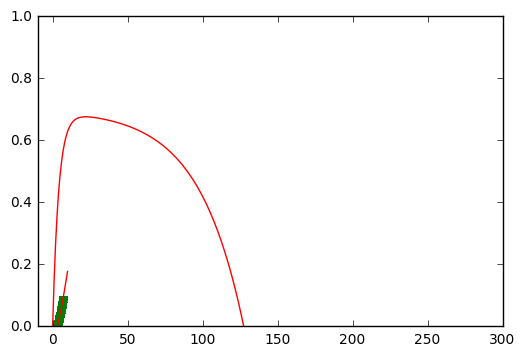

In [315]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.01
tau1 = 4.
tau2 = 30.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2)) ##wrong
plt.plot(t, y)

plt.xlim(-10., 300.)
plt.ylim(0., 1.0)

plt.show()

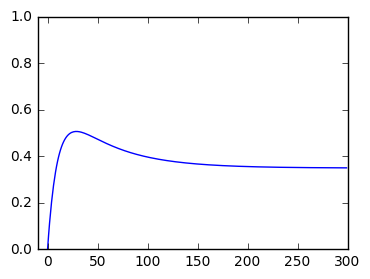

In [316]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.35
tau1 = 10.
tau2 = 50.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
plt.plot(t, y)

plt.xlim(-10., 300.)
plt.ylim(0., 1.0)

plt.show()

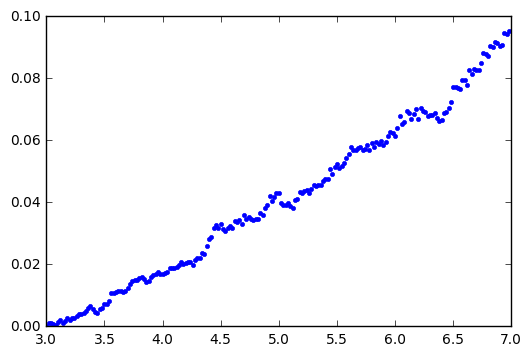

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [586]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


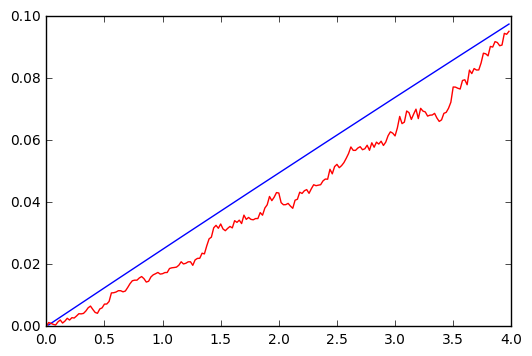

In [320]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]
y_data =yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])
K1 = 2.5
K2 = 0
tau1 = 100
tau2 = 0
y= K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2))

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
plt.ylim(0, 0.1)

plt.show()

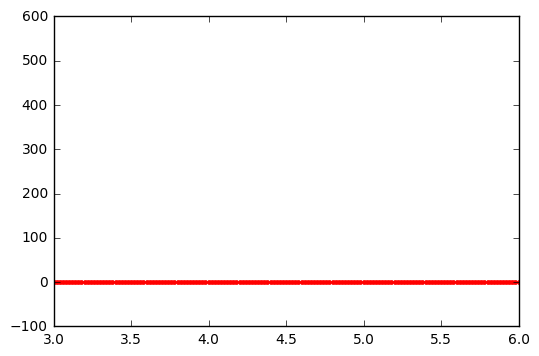

('K1 =', 1549.4172312620942, '+/-', inf)
('k2 =', 1549.6195780566723, '+/-', inf)
('tau_1 =', 0.11500700302183028, '+/-', inf)
('tau_2 =', 0.3433366439304027, '+/-', inf)


(0.0, 0.4)

In [327]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_l'][150:350]-(yaw_left_df['iii3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

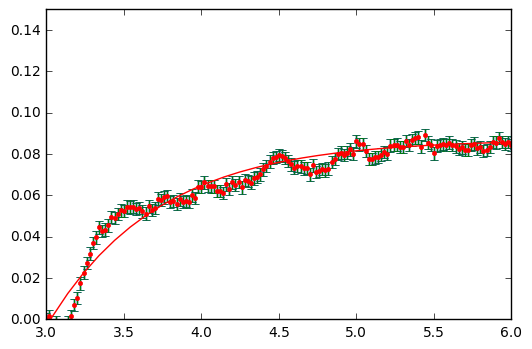

('K1 =', -5.9385583780335605, '+/-', inf)
('k2 =', -6.02567546025284, '+/-', inf)
('tau_1 =', 0.088965151982786789, '+/-', inf)
('tau_2 =', 0.71455194260491861, '+/-', inf)


(0.0, 0.15)

In [329]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_r'][150:350]-(yaw_left_df['iii3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.15)

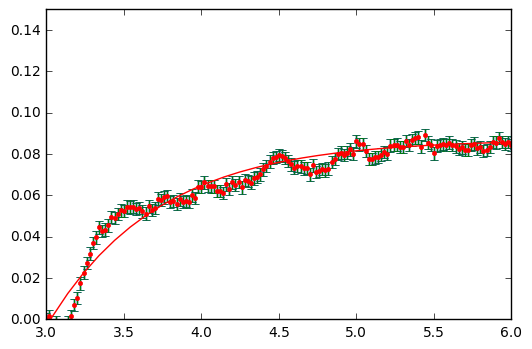

('K1 =', -5.9385583780335605, '+/-', inf)
('k2 =', -6.02567546025284, '+/-', inf)
('tau_1 =', 0.088965151982786789, '+/-', inf)
('tau_2 =', 0.71455194260491861, '+/-', inf)


(0.0, 0.15)

In [331]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_r'][150:350]-(yaw_left_df['iii3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.15)

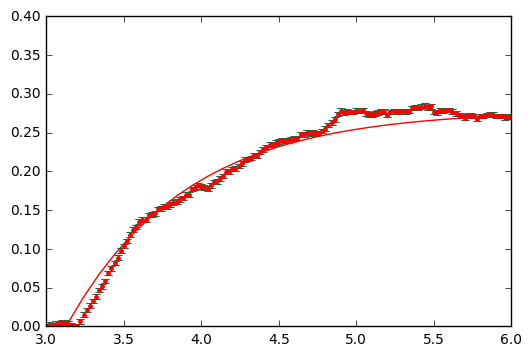

('K1 =', 16.156402205041044, '+/-', inf)
('k2 =', 15.877415214011057, '+/-', inf)
('tau_1 =', 0.77063431136236493, '+/-', inf)
('tau_2 =', 0.11722612477661246, '+/-', inf)


(0.0, 0.4)

In [20]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['i1_l'][150:350]-(yaw_left_df['i1_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

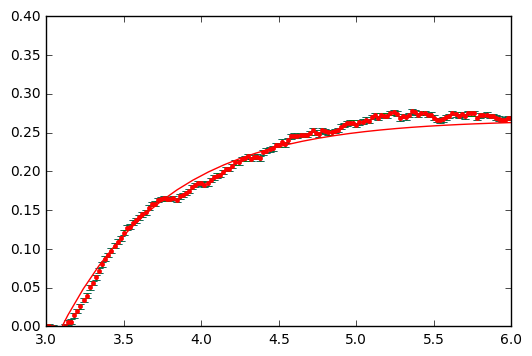

('K1 =', 24.084263766088341, '+/-', inf)
('k2 =', 23.817253849465285, '+/-', inf)
('tau_1 =', 0.68868648949133149, '+/-', inf)
('tau_2 =', 0.12339765490617498, '+/-', inf)


(0.0, 0.4)

In [22]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['i2_l'][150:350]-(yaw_left_df['i2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

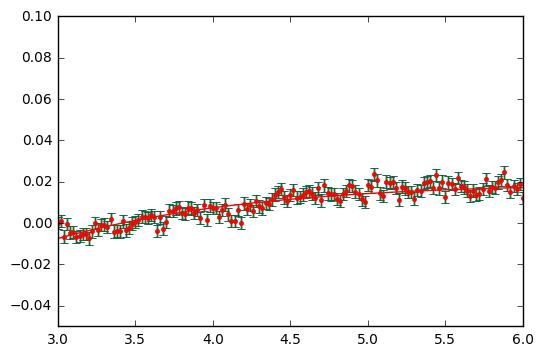

('K1 =', 16.884909936529276, '+/-', nan)
('k2 =', 16.865690467312593, '+/-', nan)
('tau_1 =', 0.91948758374133122, '+/-', nan)
('tau_2 =', 0.90807880576545319, '+/-', nan)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


(-0.05, 0.1)

In [335]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b1_l'][150:350]-(yaw_left_df['b1_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.05, 0.1)

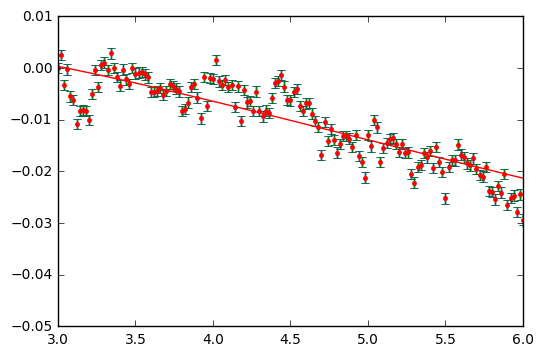

('K1 =', 4.000841847250606, '+/-', nan)
('k2 =', 4.0675972486510084, '+/-', nan)
('tau_1 =', 3.5197871478451921, '+/-', nan)
('tau_2 =', 3.6131774781846873, '+/-', nan)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


(-0.05, 0.01)

In [346]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b1_r'][150:350] -(yaw_left_df['b1_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.001, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.05, 0.010)

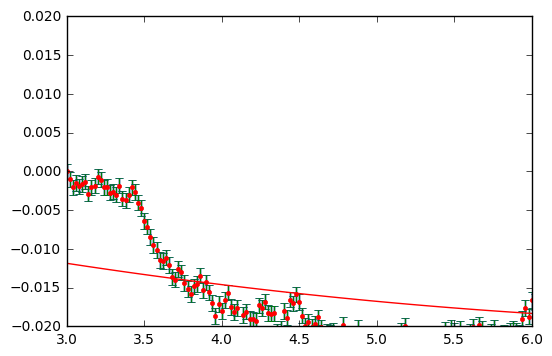

('K1 =', 683.63312852345018, '+/-', 285500.79983508086)
('k2 =', 208.35879501425296, '+/-', 151448.32173473749)
('tau_1 =', 1635.4576117802926, '+/-', 285500.79983508086)
('tau_2 =', 492.7379795055457, '+/-', 151448.32173473749)


(-0.02, 0.02)

In [363]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_l'][150:350]-(yaw_left_df['b2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.001, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.02)

('K1 =', 4.7422945033763462, '+/-', 28441.402009803784)
('k2 =', 4.761506574312957, '+/-', 28441.402021325095)
('tau_1 =', 0.26605662468142194, '+/-', 28441.402009803784)
('tau_2 =', 0.2675991283258945, '+/-', 28441.402021325095)
('Parameters', array([-6.54690563, -7.06954683,  8.16637392,  9.05811593]))
('RMSE:', 0.0017408456064120037)
('R-squared:', 0.92272948265522325)
()


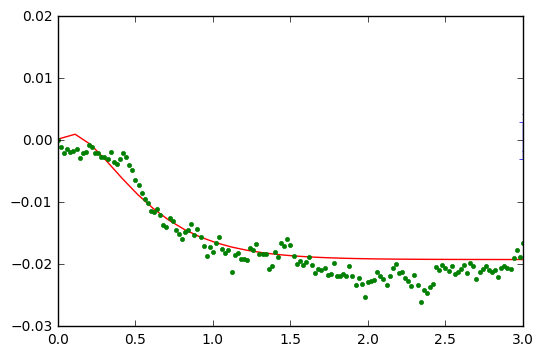

In [587]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['b2_l'][150:350]-(yaw_left_df['b2_l'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
plt.ylim(-0.03, 0.02)
plt.show()

In [ ]:
## put together table 


('K1 =', 12.058620700947371, '+/-', 42602.234212750533)
('k2 =', 14.046573660322943, '+/-', 42472.687369726998)
('tau_1 =', 10.633175404306469, '+/-', 42602.234212750533)
('tau_2 =', 12.875587124228447, '+/-', 42472.687369726998)
('Parameters', array([-16.56637171, -14.58338607,  12.65904679,  10.78837872]))
('RMSE:', 0.0058809254352554284)
('R-squared:', 0.86492888450060335)
()


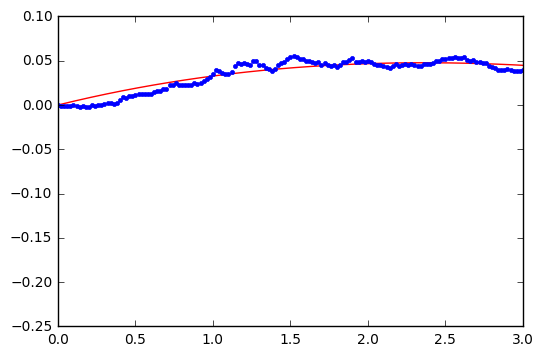

In [3]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
#plt.ylim(-0.05, 0.075)
plt.show()

('K1 =', -0.046574995320444942, '+/-', 50937.808315331138)
('k2 =', 0.15670939077524934, '+/-', 50937.808394676016)
('tau_1 =', 0.41406620619780771, '+/-', 50937.808315331138)
('tau_2 =', 0.41406272534080657, '+/-', 50937.808394676016)
('Parameters', array([ 0.2189997 ,  0.27955676,  6.77247862,  0.63240212]))
('RMSE:', 0.0126776134173756)
('R-squared:', 0.93673418066985792)
()


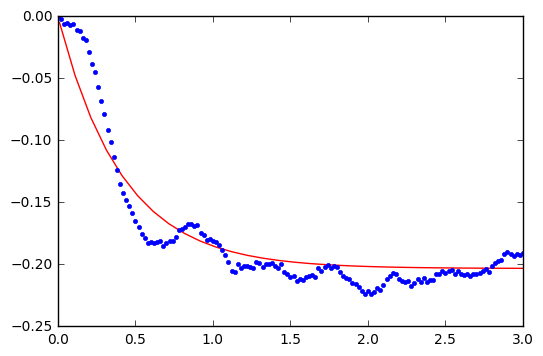

In [414]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['iii3_l'][150:350]-(yaw_left_df['iii3_l'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
#plt.ylim(-0.03, 0.02)
plt.show()

In [4]:
muscle_list = ('b1_l', 'b2_l', 'b3_l', 'i1_l', 'i2_l', 'iii1_l', 'iii3_l', 'hg1_l', 'hg2_l', 'hg3_l', 'hg4_l', 'b1_r', 'b2_r', 'b3_r', 'i1_r', 'i2_r', 'iii1_r', 'iii3_r', 'hg1_r', 'hg2_r', 'hg3_r', 'hg4_r')

In [5]:
stimuli_list = (yaw_left_df, yaw_right_df, pitch_up_df, pitch_down_df, roll_cw_df, roll_ccw_df)

In [6]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

In [17]:
### with delay term 

def exponential_f(t, K1, K2, tau1, tau2, theta):
    return K1*(1-math.e**(-(t-theta)/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-(t-theta)/tau1)) - K2*(1-math.e**(-(t-theta)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2
    parameterBounds.append([-10, 10]) # seach bounds for theta

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x





In [9]:
df_exponential_constants = pd.DataFrame()

In [12]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},

###with theta

#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_left_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('yaw_left_constants_theta.csv') 

In [14]:
df_1 = pd.DataFrame()

('K1 =', 8.402280781383384, '+/-', 14460.067535994725)
('k2 =', 8.413471094159453, '+/-', 14460.066879742082)
('tau_1 =', 0.75582434250068442, '+/-', 14460.067535994725)
('tau_2 =', 0.76216415423796591, '+/-', 14460.066879742082)
('theta =', -0.015581917452876425, '+/-', 14460.066879742082)
muscle
b1_l


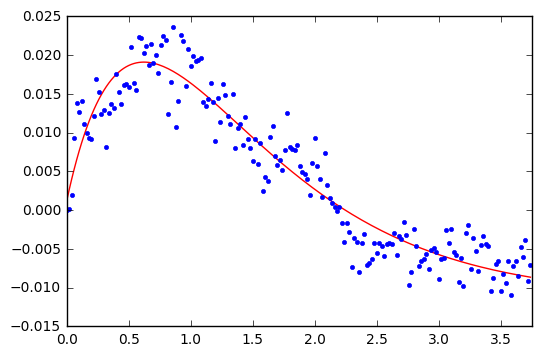

('K1 =', 5.4722743514555781, '+/-', 3455.8255713232707)
('k2 =', 6.0210185966191432, '+/-', 3450.3914236128689)
('tau_1 =', 4.3301377799808174, '+/-', 3455.8255713232707)
('tau_2 =', 5.1051661024589849, '+/-', 3450.3914236128689)
('theta =', 0.12677872692409575, '+/-', 3450.3914236128689)
muscle
b2_l


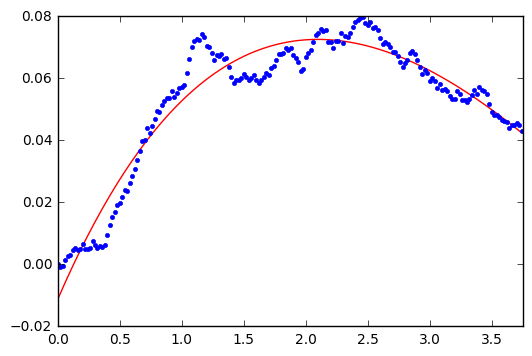

('K1 =', -0.14684859178545676, '+/-', 0.017376434127873968)
('k2 =', -0.12631763379905195, '+/-', 0.016952481778977891)
('tau_1 =', 0.18717962586106346, '+/-', 0.017376434127873968)
('tau_2 =', 0.62107802019735636, '+/-', 0.016952481778977891)
('theta =', 0.010027613589513621, '+/-', 0.016952481778977891)
muscle
b3_l


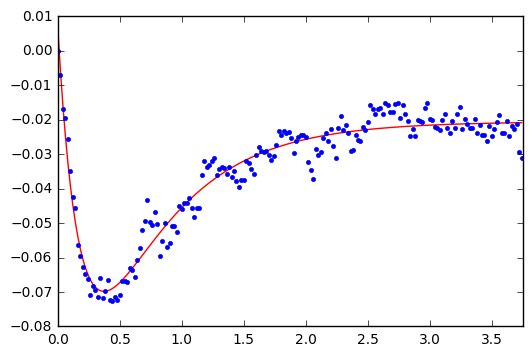

('K1 =', 4.9889521958851786, '+/-', 47824.73108353815)
('k2 =', 5.117484637444524, '+/-', 47822.835809153992)
('tau_1 =', 3.9178443844464734, '+/-', 47824.73108353815)
('tau_2 =', 4.1094789728827141, '+/-', 47822.835809153992)
('theta =', 0.52071903263256125, '+/-', 47822.835809153992)
muscle
i1_l


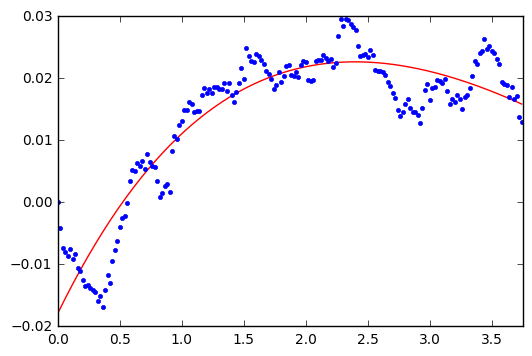

('K1 =', 0.21637741541461397, '+/-', 38.107905259595348)
('k2 =', 0.24704518150314672, '+/-', 38.098883998756499)
('tau_1 =', 1.0744468787542216, '+/-', 38.107905259595348)
('tau_2 =', 1.2267007498742499, '+/-', 38.098883998756499)
('theta =', 0.74171190694416289, '+/-', 38.098883998756499)
muscle
i2_l


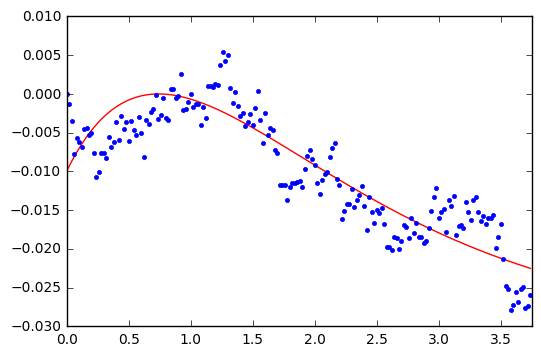

('K1 =', -17.482027437925083, '+/-', nan)
('k2 =', -17.632611709541784, '+/-', nan)
('tau_1 =', 0.44525836733526636, '+/-', nan)
('tau_2 =', 0.44814638797079615, '+/-', nan)
('theta =', -0.017461168926150725, '+/-', nan)
muscle
iii1_l


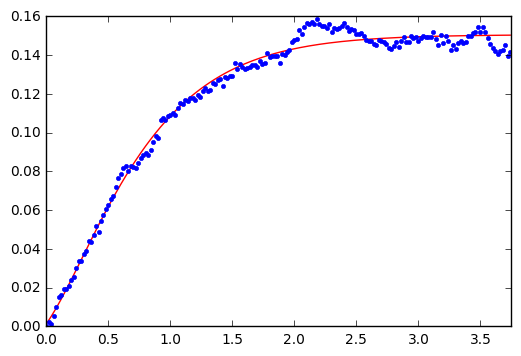

('K1 =', 0.065264602238040828, '+/-', 18652.838788175144)
('k2 =', -0.042446519534102514, '+/-', 18652.838718982795)
('tau_1 =', 0.59343450911569251, '+/-', 18652.838788175144)
('tau_2 =', 0.59342564123105479, '+/-', 18652.838718982795)
('theta =', -0.032145983570282005, '+/-', 18652.838718982795)
muscle
iii3_l


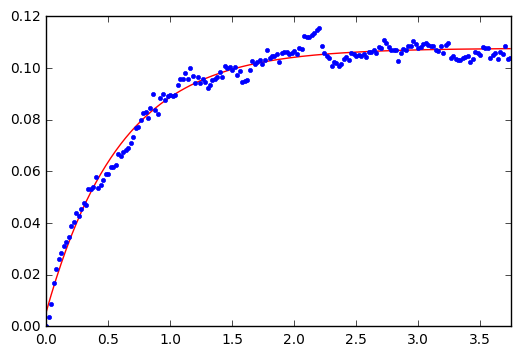

('K1 =', -0.011990240231831343, '+/-', 0.032555647892726136)
('k2 =', -0.032708430192544852, '+/-', 0.032369071270195511)
('tau_1 =', 0.21112770655112281, '+/-', 0.032555647892726136)
('tau_2 =', 0.40095599256200659, '+/-', 0.032369071270195511)
('theta =', 0.26348952723119251, '+/-', 0.032369071270195511)
muscle
hg1_l


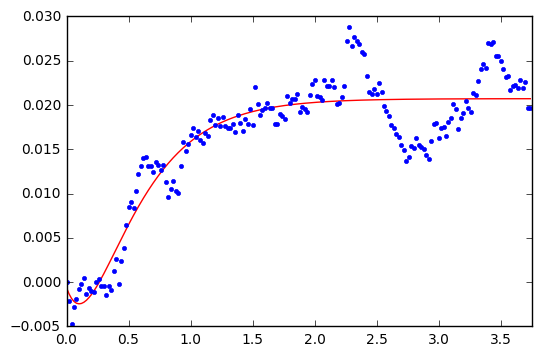

('K1 =', 0.018312697008960609, '+/-', 7520.7152438269404)
('k2 =', -0.052233138029880589, '+/-', 7520.7152146160943)
('tau_1 =', 0.71254491708249157, '+/-', 7520.7152438269404)
('tau_2 =', 0.71256313107755598, '+/-', 7520.7152146160943)
('theta =', 0.057257665576503837, '+/-', 7520.7152146160943)
muscle
hg2_l


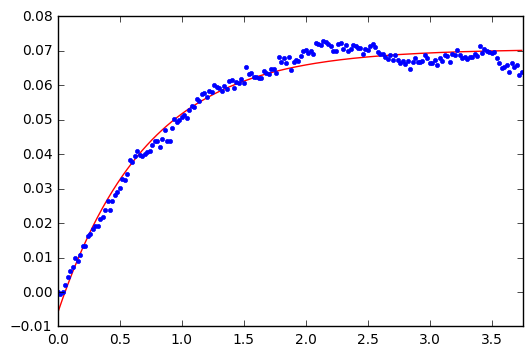

('K1 =', -0.008809296818453792, '+/-', 0.00087493171508360237)
('k2 =', -1.3048702019751251e-05, '+/-', 4.5082942736106322e-05)
('tau_1 =', 0.75751585233111596, '+/-', 0.00087493171508360237)
('tau_2 =', -0.67587653589555274, '+/-', 4.5082942736106322e-05)
('theta =', 0.014630852231870885, '+/-', 4.5082942736106322e-05)
muscle
hg3_l


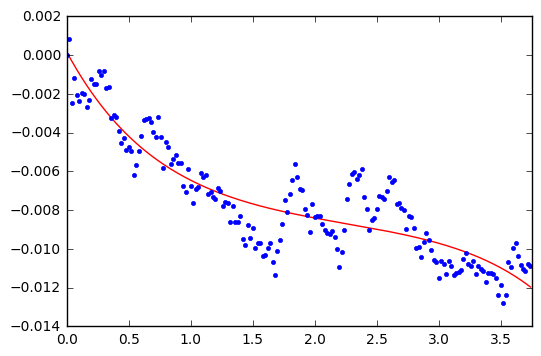

('K1 =', -0.012101253972498942, '+/-', 0.0011215849005799393)
('k2 =', 0.057950092661739859, '+/-', 0.012547947648282157)
('tau_1 =', 0.081376723831211931, '+/-', 0.0011215849005799393)
('tau_2 =', 5.0151318054889673, '+/-', 0.012547947648282157)
('theta =', 0.016606706458422424, '+/-', 0.012547947648282157)
muscle
hg4_l


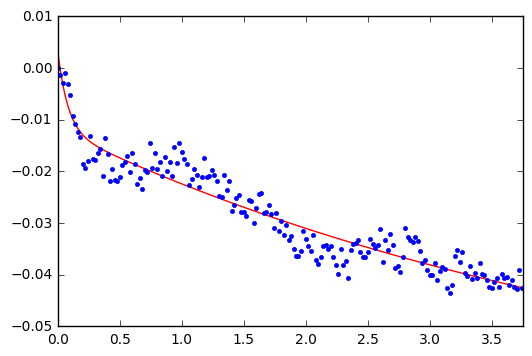

('K1 =', -5.592097864450646, '+/-', 35817.754588839591)
('k2 =', -5.615077131714699, '+/-', 35817.751395035324)
('tau_1 =', 0.78054981238372212, '+/-', 35817.754588839591)
('tau_2 =', 0.78877740596829804, '+/-', 35817.751395035324)
('theta =', 0.048843783406940157, '+/-', 35817.751395035324)
muscle
b1_r


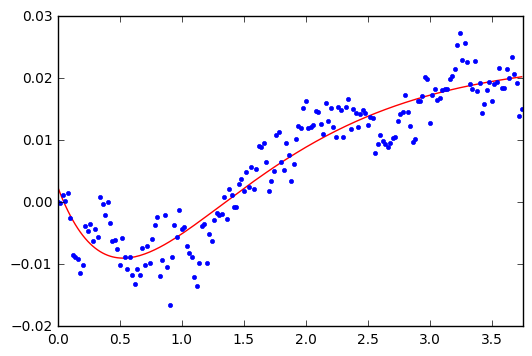

('K1 =', -0.29838053835812434, '+/-', 466.81005343708125)
('k2 =', -0.26472261328498453, '+/-', 466.80965239530508)
('tau_1 =', 0.55396912136317467, '+/-', 466.81005343708125)
('tau_2 =', 0.5699182045767186, '+/-', 466.80965239530508)
('theta =', 0.048429505866020829, '+/-', 466.80965239530508)
muscle
b2_r


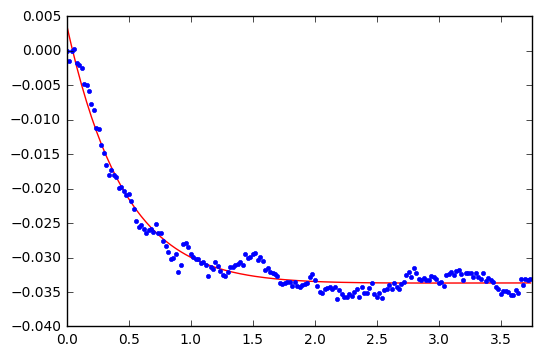

('K1 =', 0.10125634458532949, '+/-', 0.0087783276996663776)
('k2 =', 75.471638077823656, '+/-', 68209.255005763975)
('tau_1 =', 0.66683744297749881, '+/-', 0.0087783276996663776)
('tau_2 =', 6589.0845240359349, '+/-', 68209.255005763975)
('theta =', -0.020022550406326486, '+/-', 68209.255005763975)
muscle
b3_r


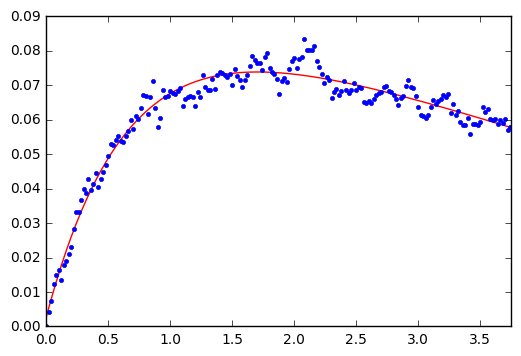

('K1 =', 0.055934334527748826, '+/-', 39382.546990010422)
('k2 =', -0.2344799754186615, '+/-', 39382.54712533296)
('tau_1 =', 0.39334841683070126, '+/-', 39382.546990010422)
('tau_2 =', 0.39334967074554511, '+/-', 39382.54712533296)
('theta =', 0.038742027267241533, '+/-', 39382.54712533296)
muscle
i1_r


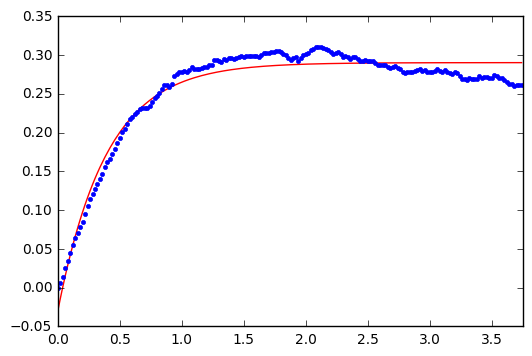

('K1 =', 33.899833786313479, '+/-', nan)
('k2 =', 33.641170192032689, '+/-', nan)
('tau_1 =', 0.62378583489683626, '+/-', nan)
('tau_2 =', 0.62735596366526847, '+/-', nan)
('theta =', 0.017383369047355313, '+/-', nan)
muscle
i2_r


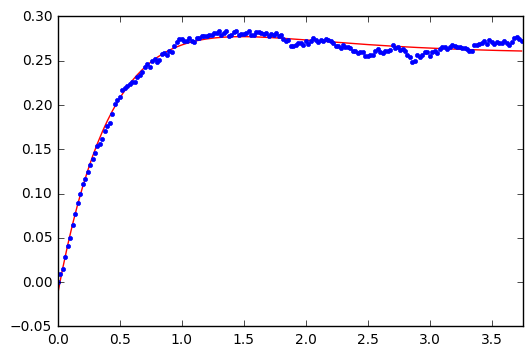

('K1 =', 13.655680415882173, '+/-', 37385.409734072178)
('k2 =', 13.649555255931634, '+/-', 37385.389909488134)
('tau_1 =', 1.6931178845051338, '+/-', 37385.409734072178)
('tau_2 =', 1.7171522214686794, '+/-', 37385.389909488134)
('theta =', 0.051769847095442585, '+/-', 37385.389909488134)
muscle
iii1_r


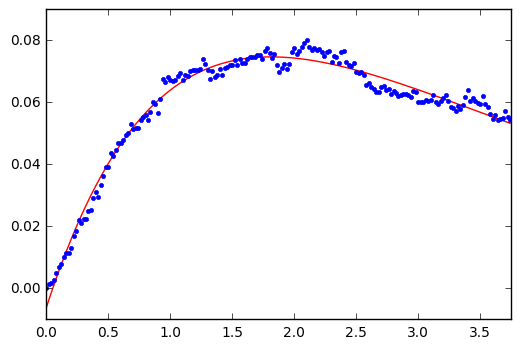

('K1 =', -16.986541814004511, '+/-', 78535.363906247861)
('k2 =', -16.797655637954264, '+/-', 78535.363802504318)
('tau_1 =', 0.12926477987283788, '+/-', 78535.363906247861)
('tau_2 =', 0.12826416055630266, '+/-', 78535.363802504318)
('theta =', -0.0034940456470873688, '+/-', 78535.363802504318)
muscle
iii3_r


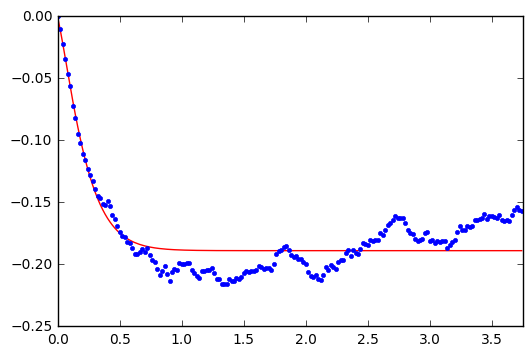

('K1 =', 0.090080100540010616, '+/-', 44913.6961696012)
('k2 =', -0.071844200212517098, '+/-', 44913.696216539793)
('tau_1 =', 0.42731499076516483, '+/-', 44913.6961696012)
('tau_2 =', 0.42731902444690906, '+/-', 44913.696216539793)
('theta =', 0.06383705291655184, '+/-', 44913.696216539793)
muscle
hg1_r


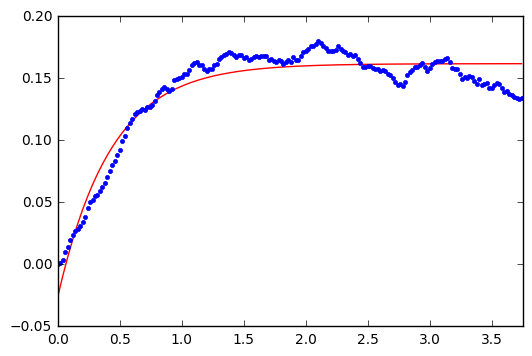

('K1 =', 72.241222410081292, '+/-', 96841.028876208366)
('k2 =', -0.14470552825116409, '+/-', 0.0035836694779772123)
('tau_1 =', 12585.817541330607, '+/-', 96841.028876208366)
('tau_2 =', 0.54395073529933913, '+/-', 0.0035836694779772123)
('theta =', 0.03695043002748933, '+/-', 0.0035836694779772123)
muscle
hg2_r


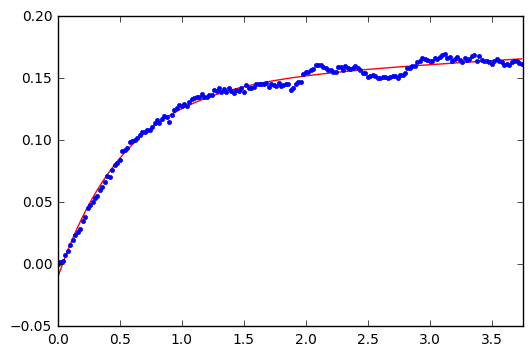

('K1 =', 2.7999003748685825, '+/-', nan)
('k2 =', 2.6739165111054661, '+/-', nan)
('tau_1 =', 2.1581567381550806, '+/-', nan)
('tau_2 =', 2.1101848420928033, '+/-', nan)
('theta =', -0.13234137112984068, '+/-', nan)
muscle
hg3_r


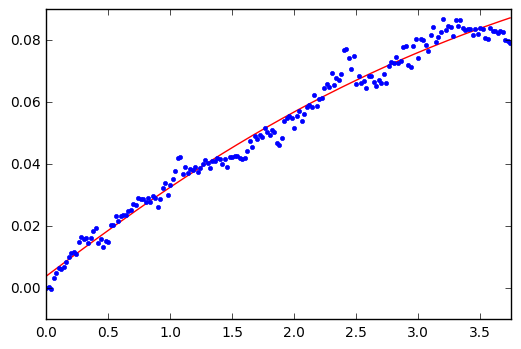

('K1 =', 0.11303011151938139, '+/-', 0.025962316029735071)
('k2 =', 0.14272604025101346, '+/-', 0.16513850732010354)
('tau_1 =', 0.52053951341347504, '+/-', 0.025962316029735071)
('tau_2 =', 6.6055212310853708, '+/-', 0.16513850732010354)
('theta =', -0.0068917281761485174, '+/-', 0.16513850732010354)
muscle
hg4_r


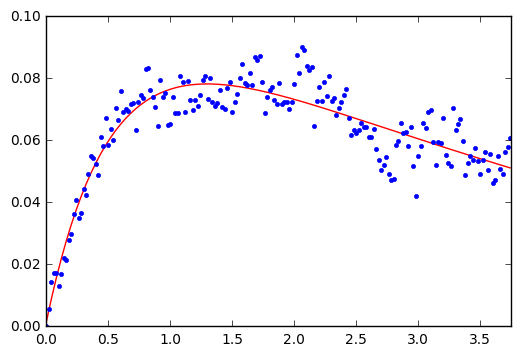

In [15]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[162:350]
        x1 = times[162:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[162:350]-muscle_choice[162]   #from 150
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)
        print("theta =", popt[4], "+/-", pcov[1,1]**0.5)
        print('muscle')
        print(muscle)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        #xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(x, exponential_f(x, popt[0], popt[1], popt[2], popt[3], popt[4]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3.75)
        plt.show()
        
stimulus_df.to_csv('yaw_right_constants_theta.csv') 

('K1 =', 12.065260615915756, '+/-', nan)
('k2 =', 12.077967047393177, '+/-', nan)
('tau_1 =', 0.89330193315189099, '+/-', nan)
('tau_2 =', 0.89942565168440503, '+/-', nan)
('theta =', 0.0006996494410905547, '+/-', nan)
muscle
b1_l


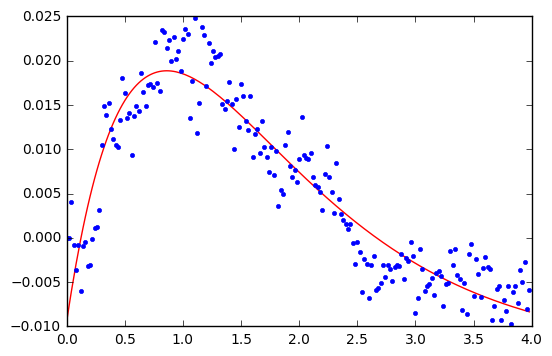

('K1 =', 90.573657080622752, '+/-', 58969.051718253657)
('k2 =', 280.1507223610397, '+/-', 12489.481253256883)
('tau_1 =', 45.185054342687657, '+/-', 58969.051718253657)
('tau_2 =', 145.07660145407448, '+/-', 12489.481253256883)
('theta =', 0.0060134252058193375, '+/-', 12489.481253256883)
muscle
b2_l


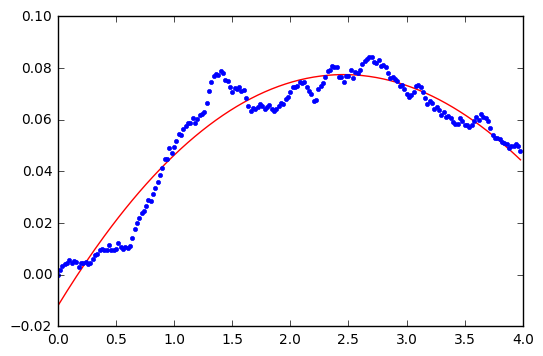

('K1 =', 32.553930579172324, '+/-', 46277.414239265941)
('k2 =', 32.583639566920347, '+/-', 46277.414656920824)
('tau_1 =', 0.5207956705229918, '+/-', 46277.414239265941)
('tau_2 =', 0.51816266715504278, '+/-', 46277.414656920824)
('theta =', -0.00054715831926324752, '+/-', 46277.414656920824)
muscle
b3_l


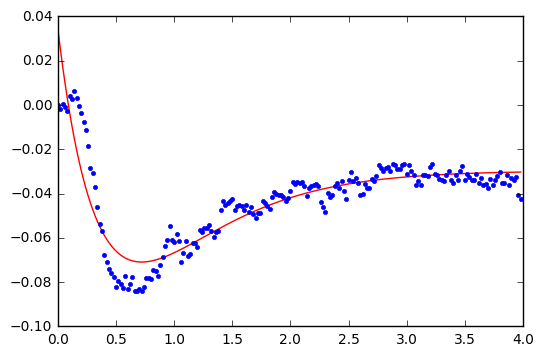

('K1 =', 18.42701427745633, '+/-', 22682.526799564133)
('k2 =', 18.414695217920631, '+/-', 22682.526883207687)
('tau_1 =', 0.38135131043396858, '+/-', 22682.526799564133)
('tau_2 =', 0.37954220807621192, '+/-', 22682.526883207687)
('theta =', -0.00029858913178072233, '+/-', 22682.526883207687)
muscle
i1_l


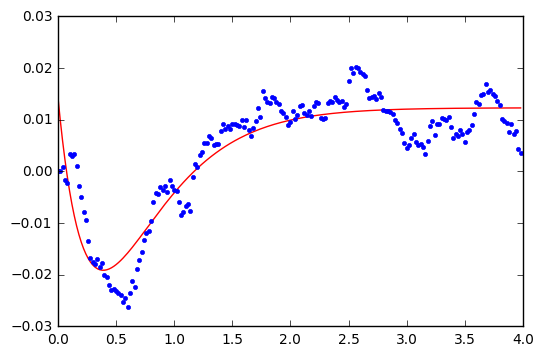

('K1 =', 1.320225157074651, '+/-', 10648.021487124995)
('k2 =', 1.4292035130827592, '+/-', 10645.826657486652)
('tau_1 =', 4.2223618192728374, '+/-', 10648.021487124995)
('tau_2 =', 4.6015906738764771, '+/-', 10645.826657486652)
('theta =', -0.0055162268779303135, '+/-', 10645.826657486652)
muscle
i2_l


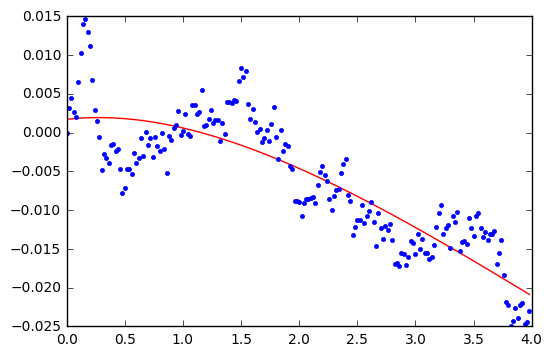

('K1 =', 0.046120923276168853, '+/-', 40460.548515814829)
('k2 =', -0.11139796987357525, '+/-', 40460.548628772769)
('tau_1 =', 0.99573267128618992, '+/-', 40460.548515814829)
('tau_2 =', 0.99576194010285424, '+/-', 40460.548628772769)
('theta =', 0.51425884132826427, '+/-', 40460.548628772769)
muscle
iii1_l


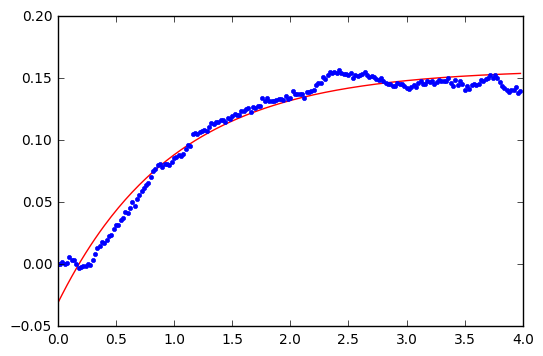

('K1 =', 0.055166911627102064, '+/-', 15426.176776043289)
('k2 =', -0.080915772732559621, '+/-', 15426.176712714434)
('tau_1 =', 0.61560666605077807, '+/-', 15426.176776043289)
('tau_2 =', 0.61569031473509539, '+/-', 15426.176712714434)
('theta =', 0.14231076372420293, '+/-', 15426.176712714434)
muscle
iii3_l


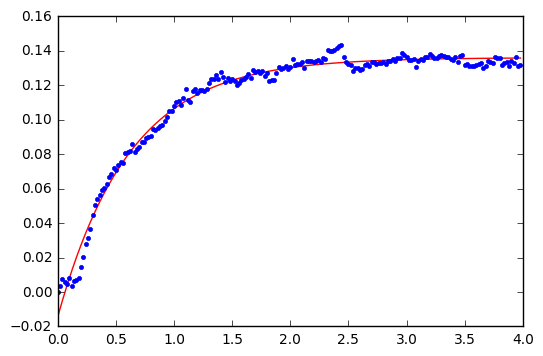

('K1 =', -5.6933796170829147, '+/-', 26356.286460681433)
('k2 =', -5.7094503481693151, '+/-', 26356.286278228672)
('tau_1 =', 0.35302409935478168, '+/-', 26356.286460681433)
('tau_2 =', 0.35605380950673554, '+/-', 26356.286278228672)
('theta =', 0.00022608029395564368, '+/-', 26356.286278228672)
muscle
hg1_l


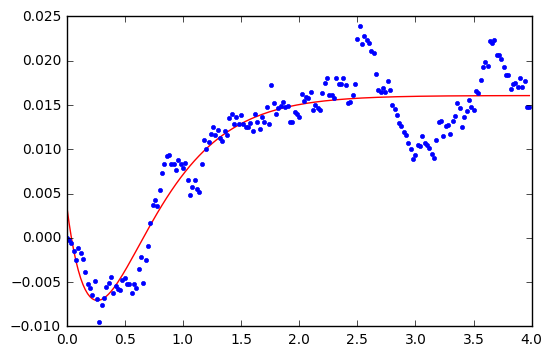

('K1 =', -10.389221160869482, '+/-', nan)
('k2 =', -10.465291078504988, '+/-', nan)
('tau_1 =', 0.42226047681166778, '+/-', nan)
('tau_2 =', 0.4256939094013994, '+/-', nan)
('theta =', 5.96252364399194e-05, '+/-', nan)
muscle
hg2_l


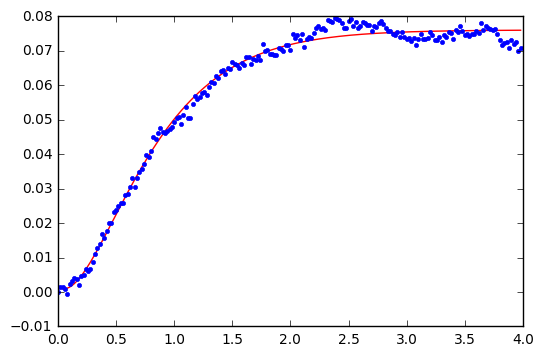

('K1 =', -0.0078316465115563227, '+/-', 0.0016769281169767023)
('k2 =', 15.036795462860407, '+/-', 30685.418504767676)
('tau_1 =', 0.69775109554863091, '+/-', 0.0016769281169767023)
('tau_2 =', 12245.826686156444, '+/-', 30685.418504767676)
('theta =', 0.031755652035503575, '+/-', 30685.418504767676)
muscle
hg3_l


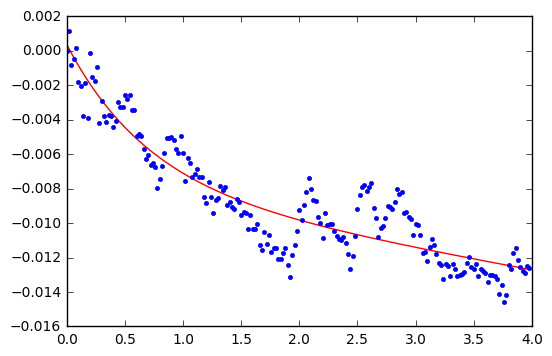

('K1 =', -0.022345142663259113, '+/-', 0.0025831867451649232)
('k2 =', 0.058842415958404115, '+/-', 0.014842145903398751)
('tau_1 =', 0.22115494556343873, '+/-', 0.0025831867451649232)
('tau_2 =', 4.8550401932273299, '+/-', 0.014842145903398751)
('theta =', 0.04907907889857132, '+/-', 0.014842145903398751)
muscle
hg4_l


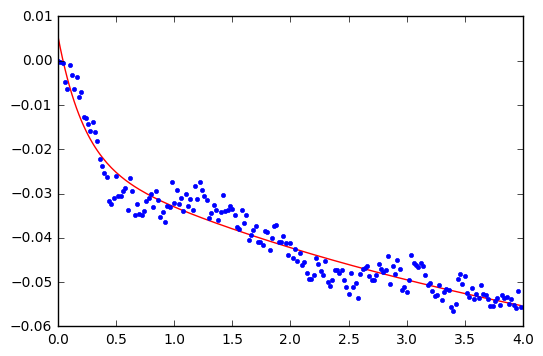

('K1 =', -8.0839903247503742, '+/-', nan)
('k2 =', -8.0951866019319034, '+/-', nan)
('tau_1 =', 0.8694228610021375, '+/-', nan)
('tau_2 =', 0.8776272918270398, '+/-', nan)
('theta =', -0.00012089255470909929, '+/-', nan)
muscle
b1_r


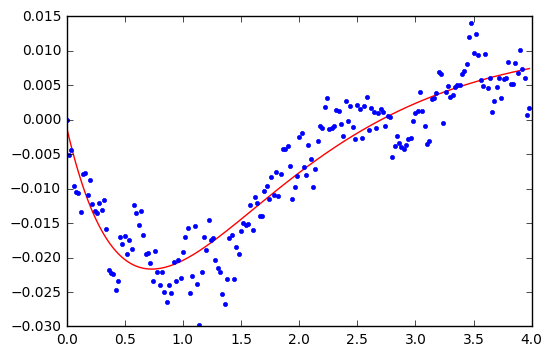

('K1 =', -0.018274829131407287, '+/-', 11609.794400477609)
('k2 =', 0.014230797058324725, '+/-', 11609.794294812849)
('tau_1 =', 0.672188826477085, '+/-', 11609.794400477609)
('tau_2 =', 0.67216658555551267, '+/-', 11609.794294812849)
('theta =', 0.28198693608293174, '+/-', 11609.794294812849)
muscle
b2_r


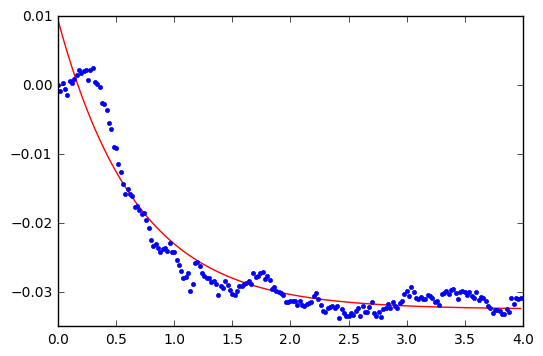

('K1 =', -7.9823546752576391, '+/-', 16413.845645226455)
('k2 =', -8.0254034246269299, '+/-', 16413.865675827721)
('tau_1 =', 1.4890128648499807, '+/-', 16413.845645226455)
('tau_2 =', 1.4590197157944074, '+/-', 16413.865675827721)
('theta =', -0.0023821948635044657, '+/-', 16413.865675827721)
muscle
b3_r


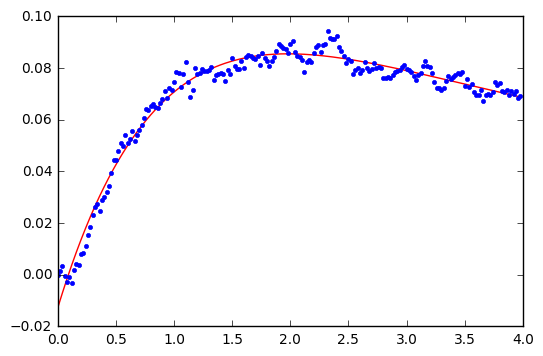

('K1 =', 0.11185749580545443, '+/-', 109679.88486008967)
('k2 =', -0.18735560930156864, '+/-', 109679.88485580975)
('tau_1 =', 0.56039164469584757, '+/-', 109679.88486008967)
('tau_2 =', 0.56038767310716997, '+/-', 109679.88485580975)
('theta =', 0.30894266279300248, '+/-', 109679.88485580975)
muscle
i1_r


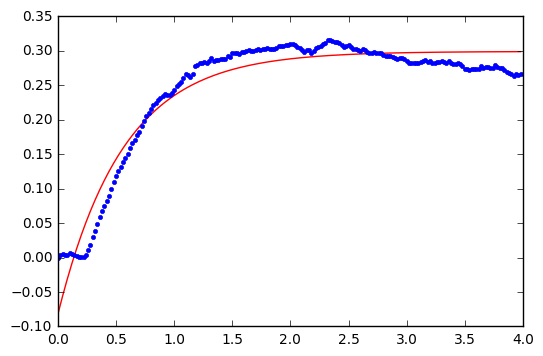

('K1 =', 54.759196217573141, '+/-', nan)
('k2 =', 54.488656202044467, '+/-', nan)
('tau_1 =', 0.94918362211540497, '+/-', nan)
('tau_2 =', 0.95465363065405218, '+/-', nan)
('theta =', 0.0011562087216455666, '+/-', nan)
muscle
i2_r


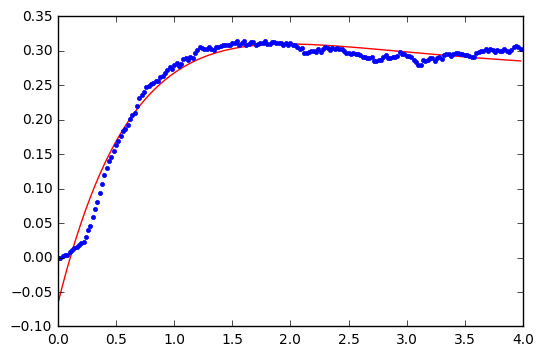

('K1 =', 19.882004995808852, '+/-', 46089.665001881505)
('k2 =', 20.09359557708747, '+/-', 46089.418309166504)
('tau_1 =', 3.5034607148951116, '+/-', 46089.665001881505)
('tau_2 =', 3.5966947643881797, '+/-', 46089.418309166504)
('theta =', 0.0032685162941261878, '+/-', 46089.418309166504)
muscle
iii1_r


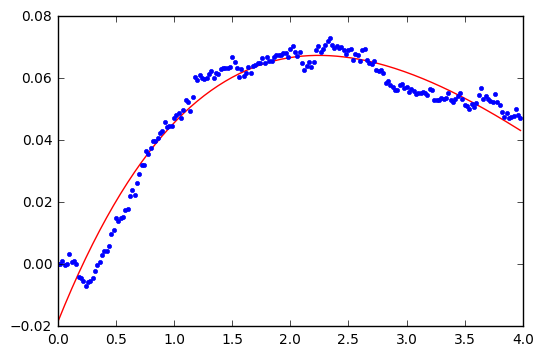

('K1 =', 37.240706410572308, '+/-', nan)
('k2 =', 37.387689531184456, '+/-', nan)
('tau_1 =', 1.0225909825734349, '+/-', nan)
('tau_2 =', 1.0127459628033462, '+/-', nan)
('theta =', -0.0015171586643152541, '+/-', nan)
muscle
iii3_r


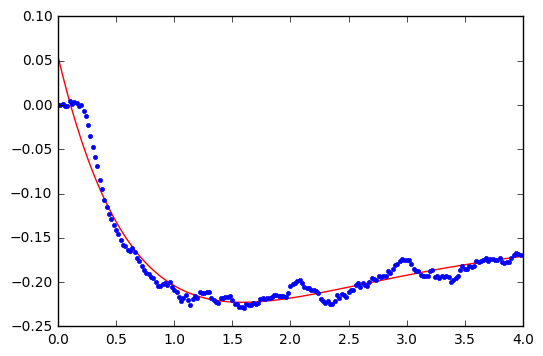

('K1 =', 30.944294374351919, '+/-', 251488.80107149199)
('k2 =', 31.007586832593521, '+/-', 251488.36481922699)
('tau_1 =', 2.3403168243873069, '+/-', 251488.80107149199)
('tau_2 =', 2.3867822329355293, '+/-', 251488.36481922699)
('theta =', 0.0029238978656108724, '+/-', 251488.36481922699)
muscle
hg1_r


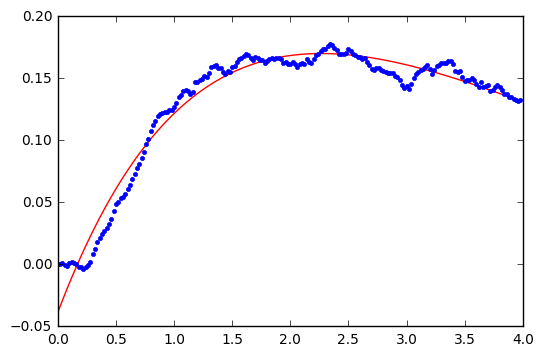

('K1 =', 0.077706344146537751, '+/-', 27833.649720787082)
('k2 =', -0.096505736358264579, '+/-', 27833.649536906021)
('tau_1 =', 0.82674978694196233, '+/-', 27833.649720787082)
('tau_2 =', 0.82676656788488379, '+/-', 27833.649536906021)
('theta =', 0.25930019338892435, '+/-', 27833.649536906021)
muscle
hg2_r


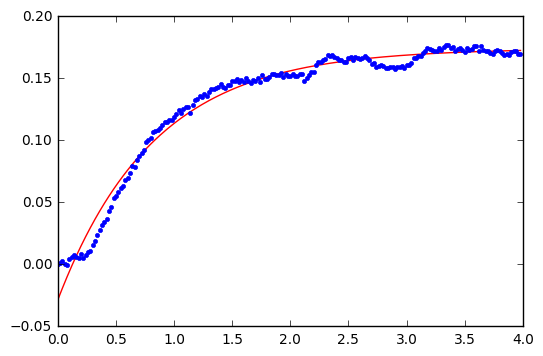

('K1 =', 2.0177740429191617, '+/-', 18675.275334304013)
('k2 =', 1.88440502911932, '+/-', 18675.380230329189)
('tau_1 =', 2.3498108285152495, '+/-', 18675.275334304013)
('tau_2 =', 2.2815727909687795, '+/-', 18675.380230329189)
('theta =', 0.00030853087686588578, '+/-', 18675.380230329189)
muscle
hg3_r


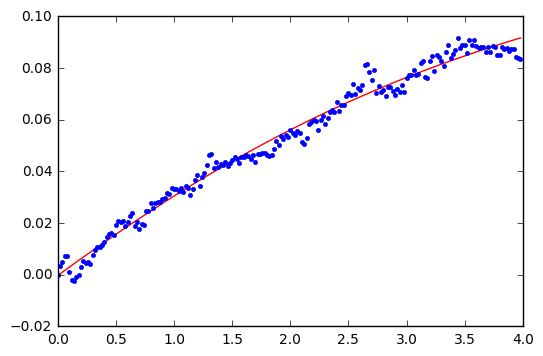

('K1 =', 0.054565592097457351, '+/-', 37090.624298050745)
('k2 =', -0.029086169700948926, '+/-', 37090.624568928186)
('tau_1 =', 0.35011137688575023, '+/-', 37090.624298050745)
('tau_2 =', 0.35010197781246255, '+/-', 37090.624568928186)
('theta =', 0.12082915349086421, '+/-', 37090.624568928186)
muscle
hg4_r


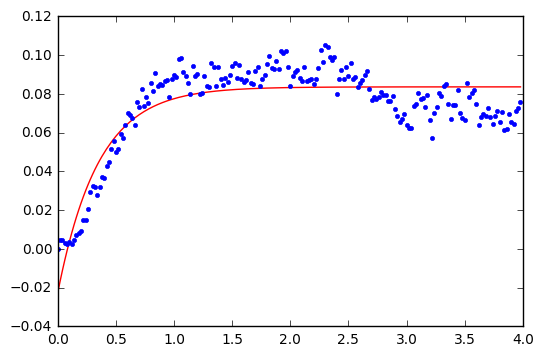

In [18]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]   #from 150
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9, 0.1]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)
        print("theta =", popt[4], "+/-", pcov[1,1]**0.5)
        print('muscle')
        print(muscle)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3], 'theta': popt[4]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        #xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(x, exponential_f(x, popt[0], popt[1], popt[2], popt[3], popt[4]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 4.0)
        plt.show()
        
stimulus_df.to_csv('yaw_right_constants_theta.csv') 

In [472]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_left_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('yaw_left_constants.csv') 

In [599]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_left_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[175:350]
        x1 = times[175:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[175:350]-muscle_choice[175]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('yaw_left_constants_minus_delay200.csv') 

In [595]:
stimulus_df

K1          K2          tau1        tau2
b1_l     -1.985592   -2.002658      0.419115    0.422615
b2_l     94.064111    0.034988  11998.690981    0.995744
b3_l      3.386401    3.416485      2.113523    2.170805
i1_l     31.829067   32.060347      2.965705    3.044294
i2_l     45.934457   47.445231      5.519493    5.813105
iii1_l    8.769530    8.707793      0.430701    0.428868
iii3_l   10.656146   10.356165      3.738748    3.552696
hg1_l    -2.078914   -2.175515      0.496254    0.510635
hg2_l     0.137669    0.001795      2.362053    0.055395
hg3_l   592.937763  174.894306    733.928934  221.877069
hg4_l     5.214555    5.229009      0.795169    0.802680
b1_r      2.695535    2.723976      0.924615    0.934538
b2_r      6.137801    6.138299      1.473859    1.498584
b3_r      0.095749   -0.005144      5.855549    0.087309
i1_r     -4.406391   -4.464268      0.641235    0.647446
i2_r      0.074384   -0.032746      1.126421    1.126428
iii1_r   17.728014   17.654390      0.461011    0.458829
iii3_r   -0.012973   -0.051103      0.252108    0.968439
hg1_r    -2.277109   -2.326996      0.747026    0.757257
hg2_r    17.559265   17.481480      0.467049    0.464750
hg3_r    -0.002483    0.008682      0.144856    1.975169
hg4_r     2.828682    2.906990      2.069079    2.119372

('K1 =', 8.6670991947050613, '+/-', 40987.06603851504)
('k2 =', 8.6780266048781254, '+/-', 40987.06482728642)
('tau_1 =', 0.74019264030236431, '+/-', 40987.06603851504)
('tau_2 =', 0.74620872451057341, '+/-', 40987.06482728642)
muscle
b1_l


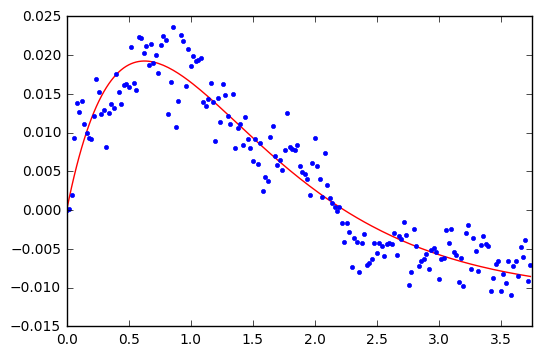

('K1 =', 17.957455122107504, '+/-', 15423.583008872598)
('k2 =', 37.132628100019204, '+/-', 10888.346756875149)
('tau_1 =', 17.531638376561794, '+/-', 15423.583008872598)
('tau_2 =', 38.832032701909775, '+/-', 10888.346756875149)
muscle
b2_l


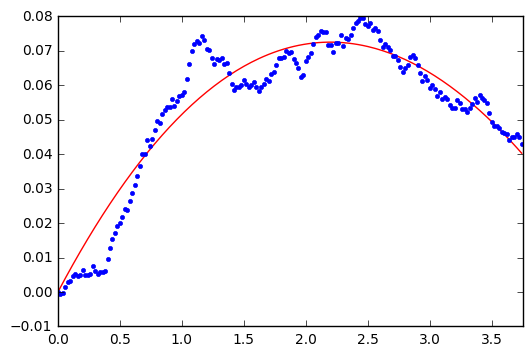

('K1 =', -0.16435466957483413, '+/-', 0.024696165966367985)
('k2 =', -0.14364447452490423, '+/-', 0.024268979711450447)
('tau_1 =', 0.209339034226489, '+/-', 0.024696165966367985)
('tau_2 =', 0.5893360409434959, '+/-', 0.024268979711450447)
muscle
b3_l


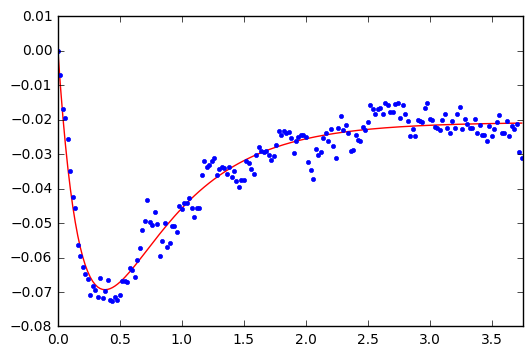

('K1 =', 390.32649710985038, '+/-', 98764.243699114479)
('k2 =', 1319.78307884522, '+/-', 175482.72082697347)
('tau_1 =', 224.28627305696486, '+/-', 98764.243699114479)
('tau_2 =', 765.04240903862546, '+/-', 175482.72082697347)
muscle
i1_l


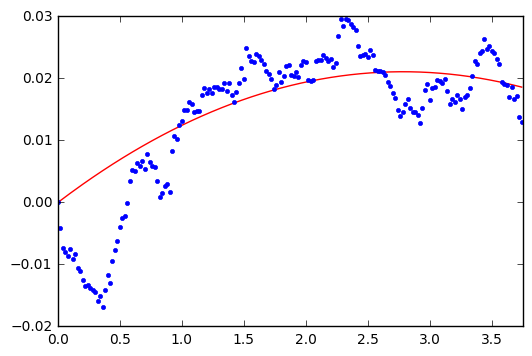

('K1 =', 0.97041445859738873, '+/-', 6817.4812338926977)
('k2 =', 1.0808139790946782, '+/-', 6814.8750368153751)
('tau_1 =', 4.3035871336738305, '+/-', 6817.4812338926977)
('tau_2 =', 4.7728844996005826, '+/-', 6814.8750368153751)
muscle
i2_l


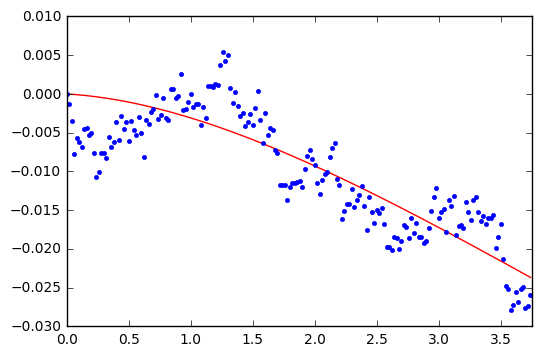

('K1 =', -18.164648750112132, '+/-', nan)
('k2 =', -18.315300076380176, '+/-', nan)
('tau_1 =', 0.45008984135720814, '+/-', nan)
('tau_2 =', 0.45270633598834936, '+/-', nan)
muscle
iii1_l


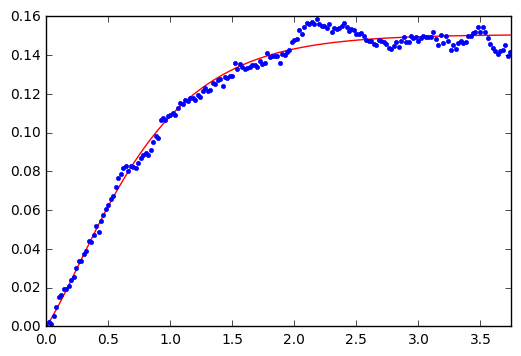

('K1 =', 0.008254231818922474, '+/-', 0.0019331826006043122)
('k2 =', -0.099662045353616113, '+/-', 0.0018074208328135936)
('tau_1 =', 0.035483187084265212, '+/-', 0.0019331826006043122)
('tau_2 =', 0.61150586586145816, '+/-', 0.0018074208328135936)
muscle
iii3_l


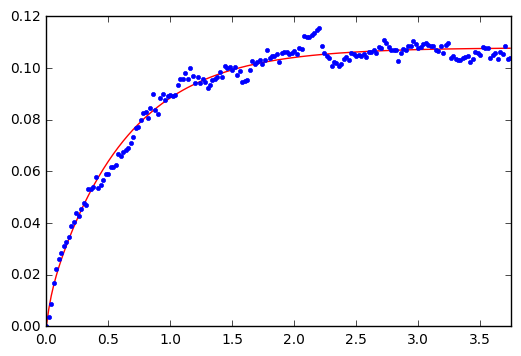

('K1 =', -0.035691542455480792, '+/-', 0.041269223995771466)
('k2 =', -0.05642096126133242, '+/-', 0.041082399966750886)
('tau_1 =', 0.19208310898572445, '+/-', 0.041269223995771466)
('tau_2 =', 0.41404392189674999, '+/-', 0.041082399966750886)
muscle
hg1_l


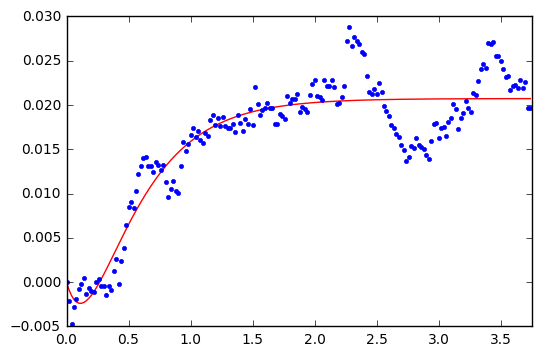

('K1 =', -8.4772765435922857, '+/-', 19551.641017048747)
('k2 =', -8.5465884395922789, '+/-', 19551.641017996561)
('tau_1 =', 0.41890490270059294, '+/-', 19551.641017048747)
('tau_2 =', 0.42131988484960853, '+/-', 19551.641017996561)
muscle
hg2_l


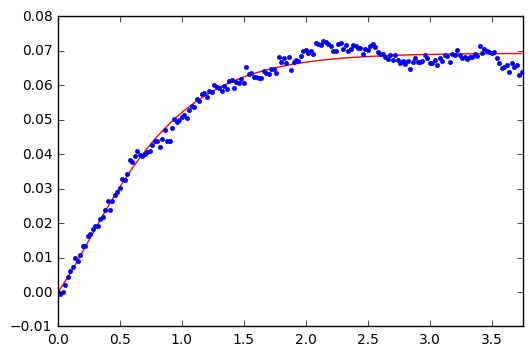

('K1 =', -0.0060849470928928994, '+/-', 0.00085379897008941864)
('k2 =', 35.120060181571233, '+/-', 31570.593524766013)
('tau_1 =', 0.58320542761190075, '+/-', 0.00085379897008941864)
('tau_2 =', 26916.34435389522, '+/-', 31570.593524766013)
muscle
hg3_l


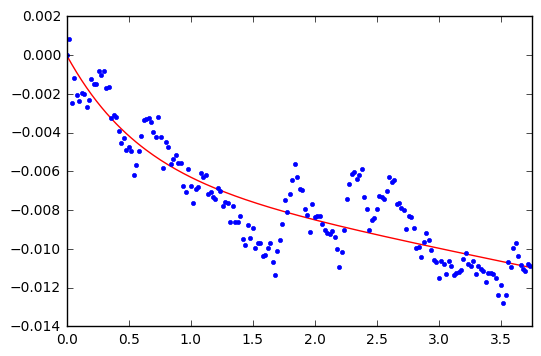

('K1 =', -0.011805718556422078, '+/-', 0.0011931247107898706)
('k2 =', 0.057313499812913123, '+/-', 0.012085663685617943)
('tau_1 =', 0.091170330872518343, '+/-', 0.0011931247107898706)
('tau_2 =', 4.8895082591874219, '+/-', 0.012085663685617943)
muscle
hg4_l


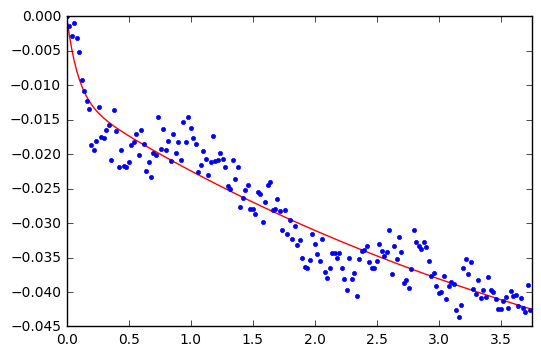

('K1 =', -5.9169340718975416, '+/-', 27613.122487059682)
('k2 =', -5.9405590379276179, '+/-', 27613.120527282477)
('tau_1 =', 0.82279264288921061, '+/-', 27613.122487059682)
('tau_2 =', 0.83105177279701281, '+/-', 27613.120527282477)
muscle
b1_r


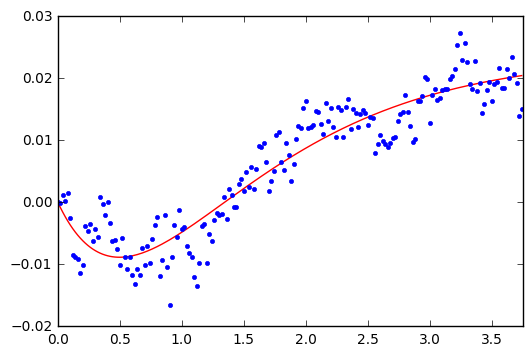

('K1 =', -1.1431871743633015, '+/-', 4153.8636980589654)
('k2 =', -1.1101616706060584, '+/-', 4153.8628009440154)
('tau_1 =', 0.77702258477946295, '+/-', 4153.8636980589654)
('tau_2 =', 0.7884190803398845, '+/-', 4153.8628009440154)
muscle
b2_r


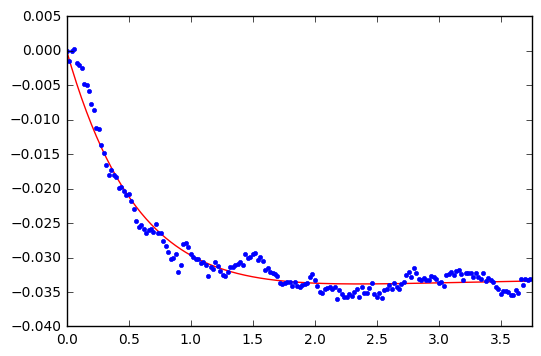

('K1 =', 0.098264041610098704, '+/-', 0.004507016024140653)
('k2 =', 99.474257038805362, '+/-', 76079.972711279159)
('tau_1 =', 0.62062420848219157, '+/-', 0.004507016024140653)
('tau_2 =', 9334.104177030853, '+/-', 76079.972711279159)
muscle
b3_r


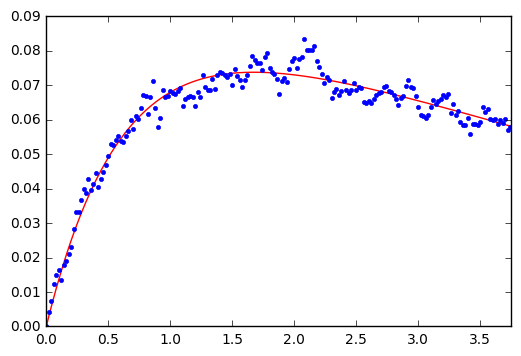

('K1 =', 31.50994089638489, '+/-', 33917.281073564416)
('k2 =', 31.285158979162816, '+/-', 33917.273873490543)
('tau_1 =', 1.1153785923696098, '+/-', 33917.281073564416)
('tau_2 =', 1.1290825279919388, '+/-', 33917.273873490543)
muscle
i1_r


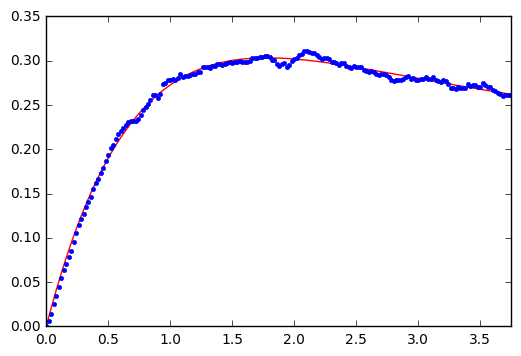

('K1 =', 37.456511723318243, '+/-', nan)
('k2 =', 37.199373482333229, '+/-', nan)
('tau_1 =', 0.66341919216215095, '+/-', nan)
('tau_2 =', 0.66698289830304125, '+/-', nan)
muscle
i2_r


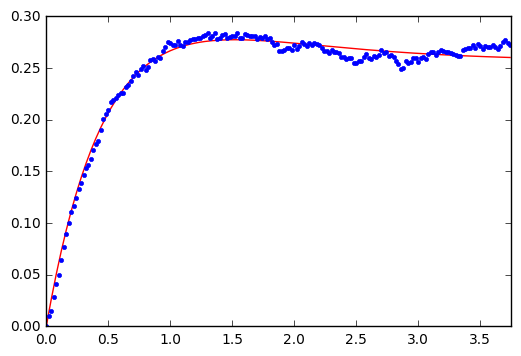

('K1 =', 14.853050444934727, '+/-', nan)
('k2 =', 14.873827227630011, '+/-', nan)
('tau_1 =', 2.0319992769386732, '+/-', nan)
('tau_2 =', 2.0647332259648161, '+/-', nan)
muscle
iii1_r


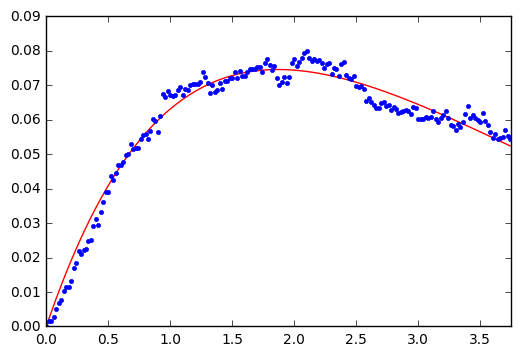

('K1 =', 536.21923649491089, '+/-', 158465.59904184609)
('k2 =', 0.24159673913690244, '+/-', 0.0024011439863453805)
('tau_1 =', 24179.8869101366, '+/-', 158465.59904184609)
('tau_2 =', 0.34121101200364973, '+/-', 0.0024011439863453805)
muscle
iii3_r


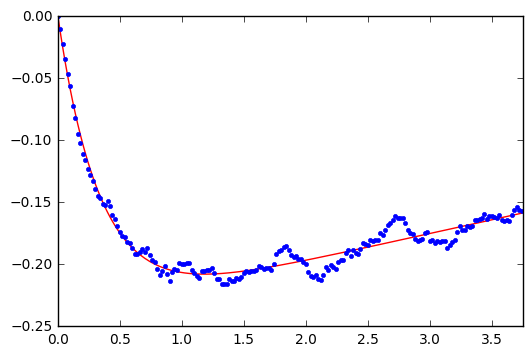

('K1 =', 0.13099061515381533, '+/-', 34335.198850399851)
('k2 =', -0.031599102163786801, '+/-', 34335.199123335784)
('tau_1 =', 0.48848516005122039, '+/-', 34335.198850399851)
('tau_2 =', 0.48847819403738324, '+/-', 34335.199123335784)
muscle
hg1_r


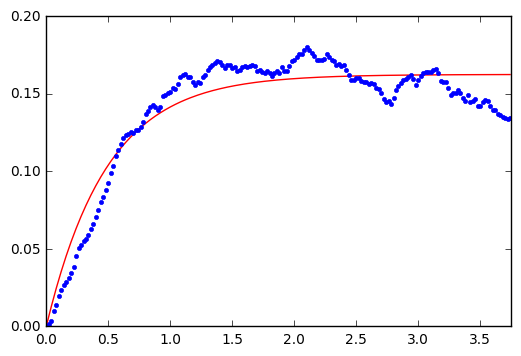

('K1 =', 71.882551586395351, '+/-', 112796.50717279984)
('k2 =', -0.15124510992396964, '+/-', 0.0033708689269251703)
('tau_1 =', 19131.499298998762, '+/-', 112796.50717279984)
('tau_2 =', 0.62517794187165832, '+/-', 0.0033708689269251703)
muscle
hg2_r


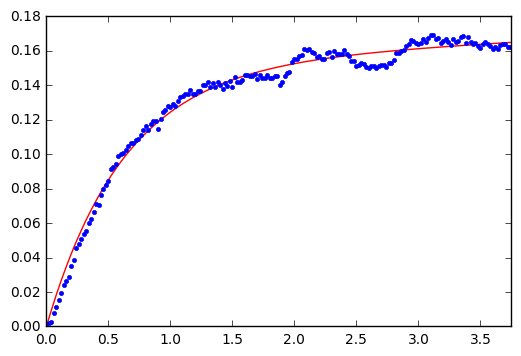

('K1 =', 0.16028996430993964, '+/-', 0.014627606974451)
('k2 =', -0.00447324941690535, '+/-', 0.0013121533228416867)
('tau_1 =', 5.079492928771919, '+/-', 0.014627606974451)
('tau_2 =', 0.088443817716773537, '+/-', 0.0013121533228416867)
muscle
hg3_r


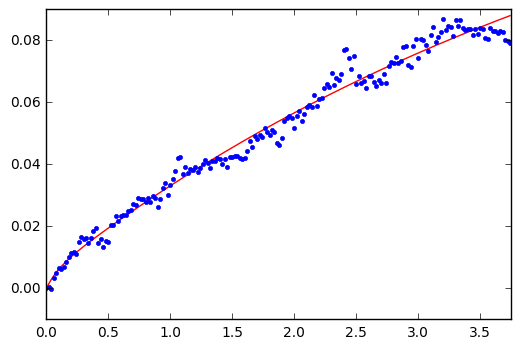

('K1 =', 0.10812277081410243, '+/-', 0.017772553306535394)
('k2 =', 0.18643521264245932, '+/-', 0.37091021428605908)
('tau_1 =', 0.4933681854207555, '+/-', 0.017772553306535394)
('tau_2 =', 10.245980329062624, '+/-', 0.37091021428605908)
muscle
hg4_r


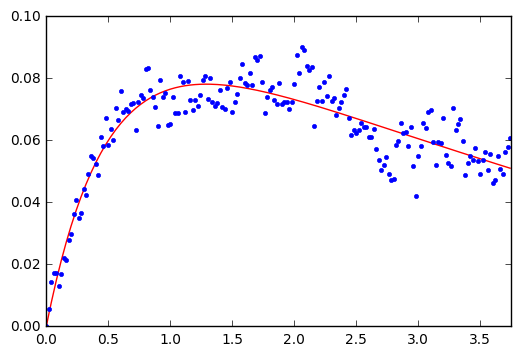

In [632]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = yaw_right_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[162:350]
        x1 = times[162:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[162:350]-muscle_choice[162]   #from 150
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)
        print('muscle')
        print(muscle)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        #xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(x, exponential_f(x, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3.75)
        plt.show()
        
stimulus_df.to_csv('yaw_right_constants.csv') 

In [575]:
stimulus_df

K1           K2        tau1          tau2
b1_l       9.343229     9.359295    1.065784      1.074239
b2_l    2394.611320  8043.843883  261.775049    885.227566
b3_l      24.327530    24.355404    0.617035      0.613712
i1_l      17.050845    17.038317    0.421732      0.420021
i2_l       1.529263     1.596258    2.865755      3.021808
iii1_l -4952.365291 -1529.090130  578.349441    176.471239
iii3_l     0.068808    -0.068485    0.694531      0.694517
hg1_l     -5.923888    -5.940048    0.372940      0.375674
hg2_l    -14.064042   -14.140168    0.428402      0.430888
hg3_l     -0.008040    45.802124    0.757757  38944.821625
hg4_l     -0.022371     0.057147    0.267586      4.662302
b1_r       8.498220     8.487343    0.860089      0.852308
b2_r       6.428124     6.459532    0.287496      0.289832
b3_r     -11.476774   -11.483592    2.057913      2.018657
i1_r       0.118238    -0.184438    0.705607      0.705616
i2_r      46.453228    46.213274    1.299950      1.310361
iii1_r    25.727243    48.339702   22.867973     45.267517
iii3_r    43.485729    43.590991    1.396947      1.383926
hg1_r      0.954365  -624.320671    3.182769  -4479.975559
hg2_r      0.042612    -0.136546    1.026839      1.026817
hg3_r      1.973358     1.841445    2.273903      2.203785
hg4_r      0.060758    -0.023016    0.416601      0.416601

In [609]:
yaw_left_df_c = pd.read_csv('yaw_left_constants.csv')
yaw_right_df_c = pd.read_csv('yaw_right_constants.csv')
pitch_up_df_c = pd.read_csv('pitch_up_constants.csv')
pitch_down_df_c = pd.read_csv('pitch_down_constants.csv')
roll_cw_df_c = pd.read_csv('roll_cw_constants.csv')
roll_ccw_df_c = pd.read_csv('roll_ccw_constants.csv')

In [612]:
yaw_left_df_c .ix[2]

Unnamed: 0         b3_l
K1            0.0517189
K2              61.9298
tau1           0.607986
tau2            9085.66
Name: 2, dtype: object

In [613]:
muscle_list = ('b1_l', 'b2_l', 'b3_l', 'i1_l', 'i2_l', 'iii1_l', 'iii3_l', 'hg1_l', 'hg2_l', 'hg3_l', 'hg4_l', 'b1_r', 'b2_r', 'b3_r', 'i1_r', 'i2_r', 'iii1_r', 'iii3_r', 'hg1_r', 'hg2_r', 'hg3_r', 'hg4_r')

In [619]:
muscle_assign = ('R', 'B', 'R', 'B', 'R', 'B', 'R', 'B', 'R', 'R', 'R', 'R', 'B', 'R', 'B', 'R', 'B', 'R', 'B', 'R', 'R', 'R')

In [620]:
yaw_left_df_c .ix[2]['K1']

0.051718873994800005

In [614]:
len (muscle_list)

22

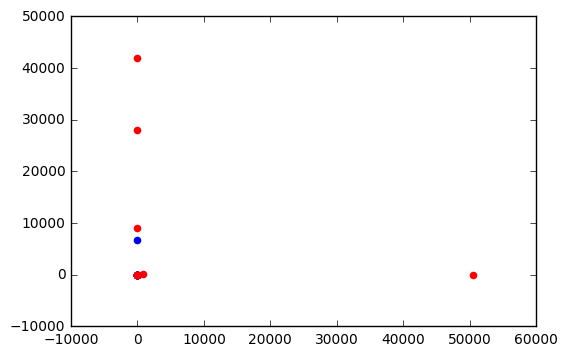

In [625]:
counter = 0
fig = plt.figure()

for muscle in muscle_list:
    x = yaw_left_df_c.ix[counter]['tau1']
    y = yaw_left_df_c.ix[counter]['tau2']
    plt.scatter(x, y, color = muscle_assign[counter])
    counter = counter + 1
    
plt.show()
 

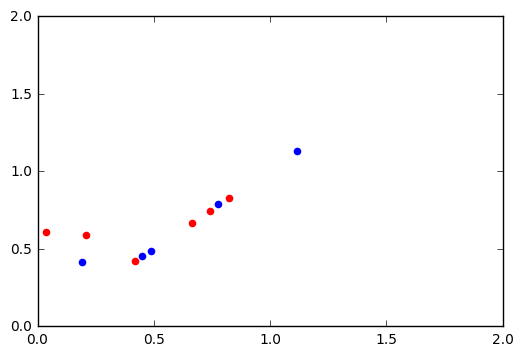

In [634]:
counter = 0
fig = plt.figure()

for muscle in muscle_list:
    x = yaw_right_df_c.ix[counter]['tau1']
    y = yaw_right_df_c.ix[counter]['tau2']
    plt.scatter(x, y, color = muscle_assign[counter])
    counter = counter + 1

plt.xlim(0, 2)    
plt.ylim(0, 2)  
plt.show()
 

Add the delay parameter
Use time to peak 
piecemeal approach to modeling --  constant plus delay to tanught  -- 2 more free parameters

tanguht as inflection point to double exponential 

maybe bound arbitrary k terms, to further normalize tau values 
multidimentional cluster of tau1, tau2, and tnaught 

facile 

In [491]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = pitch_up_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('pitch_up_constants.csv') 

In [492]:
stimulus_df

K1           K2           tau1        tau2
b1_l        0.205235     0.185215       0.327820    0.361908
b2_l       46.700512    28.162824      33.071208   19.747714
b3_l        9.361362     9.401952       0.198410    0.199852
i1_l       12.656147    12.590547       1.132028    1.112830
i2_l       46.550533    46.430883       0.614470    0.611863
iii1_l    258.586391     0.052470   18732.329418    1.377377
iii3_l      2.413915     2.396302       0.115434    0.114352
hg1_l     599.261508     0.046442   40022.609971    0.433032
hg2_l       0.114192     0.015395       3.018998    0.277060
hg3_l       0.026808     0.009287       2.834748    0.152392
hg4_l       0.130938     0.156967       0.508622    0.542073
b1_r        5.537353     5.569230       0.405612    0.413082
b2_r    13733.050516  4106.582843    1077.414014  321.295096
b3_r        5.964202     6.006126       0.390304    0.396494
i1_r       11.411565    11.281895       1.392464    1.372115
i2_r        0.254066    -0.054302       2.370111    2.370168
iii1_r      7.116516     7.151103       0.479716    0.482058
iii3_r      4.220902     4.246641       0.194852    0.197182
hg1_r    2392.456229     0.013606  283301.050661    0.114967
hg2_r       0.173496     0.055499       1.401349    0.325258
hg3_r    1499.711006   453.393343     896.487797  270.238337
hg4_r       0.353934     0.358700       0.259487    0.271048

In [485]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = pitch_down_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('pitch_down_constants.csv') 

In [486]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = roll_cw_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('roll_cw_constants.csv') 

In [488]:
stimulus_df

K1         K2         tau1          tau2
b1_l     0.025318   0.007358     0.568736      0.064545
b2_l     0.894813   0.976394     4.418486      5.149921
b3_l     0.008012   0.065276     0.053992      1.516629
i1_l     0.687177   0.731370     0.666405      0.639275
i2_l     0.106482   0.140602     0.119202      0.223458
iii1_l  -0.023645  -0.038926     0.541919      2.594354
iii3_l  -0.006539 -21.920181     0.592670  10591.506433
hg1_l   -4.310735  -4.298330     0.770281      0.777466
hg2_l    0.110436   0.013462     4.485289      0.442811
hg3_l    0.210948   0.006153     5.675533      0.077954
hg4_l    0.699404   0.699114     0.970751      0.986910
b1_r    -0.003520   0.020721     0.057773      1.942007
b2_r     1.149583   1.171221     0.910279      0.930708
b3_r     0.051336   0.031061     1.187968      1.188026
i1_r    16.767956  16.662967     0.884113      0.875806
i2_r    11.115100  10.848045     1.394011      1.364366
iii1_r  -1.038588  -1.039728     0.763869      0.777715
iii3_r   0.024844   0.067755     0.156473      1.011395
hg1_r    0.074622   0.039488     1.700097      0.549116
hg2_r    7.122956   7.053288     1.008049      0.998035
hg3_r   13.754606   0.010539  6720.399771      0.738724
hg4_r   -0.016141   0.011340     0.443216      4.799182

In [489]:
#stimulus_df = pd.DataFrame({'K1':0,'K2': 0, 'tau1': 0, 'tau2': 0},
#                  index=[0])
stimulus_df = pd.DataFrame()
stimulus = roll_ccw_df

for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.1,0.1,0.25,0.9]), maxfev=200000)
        
        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        stimulus_df = stimulus_df.append(df)
        '''
        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        '''
stimulus_df.to_csv('roll_ccw_constants.csv') 

In [490]:
stimulus_df

K1          K2         tau1          tau2
b1_l     0.012009    0.023367     0.183740      0.183723
b2_l     2.677458    2.678640     0.678072      0.681881
b3_l    -0.669515   -0.686639     0.396503      0.402516
i1_l     0.109209   -0.055562     8.084913      8.087457
i2_l     0.115459    0.013369     3.025123      0.219073
iii1_l   0.643082    0.645505     0.202292      0.198750
iii3_l   9.451668    9.516070     0.745320      0.751404
hg1_l    2.960754    2.947005     0.903509      0.886478
hg2_l    0.027460    0.010930     0.573293      0.098697
hg3_l   -0.003980    4.137972     0.835042  17606.683234
hg4_l    0.032559    0.027608     3.799788      0.504694
b1_r     0.885449    0.891943     1.439338      1.461950
b2_r     0.019337  123.775084     0.651609  30278.669290
b3_r     3.313772    3.356582     0.970204      0.979395
i1_r     0.145763    0.189875     0.388865      0.417320
i2_r    39.284265    0.111484  2594.600481      2.184764
iii1_r  32.571746    0.546337   801.299080     11.628174
iii3_r -18.814979   -0.016982  9396.100137      1.129358
hg1_r   -0.013106    0.008292     0.161625      0.485847
hg2_r   -0.011140   -0.043406     0.102007      1.503181
hg3_r    0.739091    0.002230   118.496311      0.029635
hg4_r    1.894614    1.982269     3.090846      3.233543

('K1 =', 562.21322257154168, '+/-', 19784097.590519726)
('k2 =', -608.28125837615016, '+/-', 18882888.306884415)
('tau_1 =', 56506.299055044408, '+/-', 19784097.590519726)
('tau_2 =', 53937.179906925347, '+/-', 18882888.306884415)


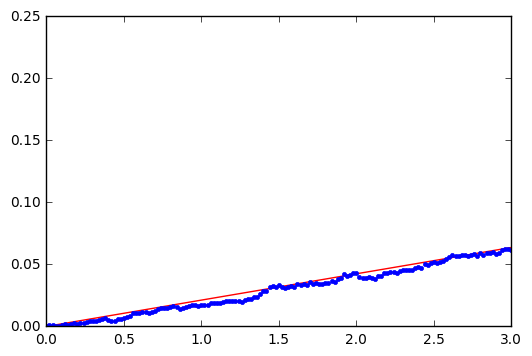

In [566]:
        stimulus = yaw_left_df
        muscle = 'hg3_l'
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.01,0.07,0.25,0.9]), maxfev=20000)

        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 200)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 3)
        plt.show()
        

('K1 =', -2.0884803059732375, '+/-', 4571.1348826070325)
('k2 =', -2.1060915849784458, '+/-', 4571.1343981490572)
('tau_1 =', 0.47090291669793893, '+/-', 4571.1348826070325)
('tau_2 =', 0.47850083957449618, '+/-', 4571.1343981490572)


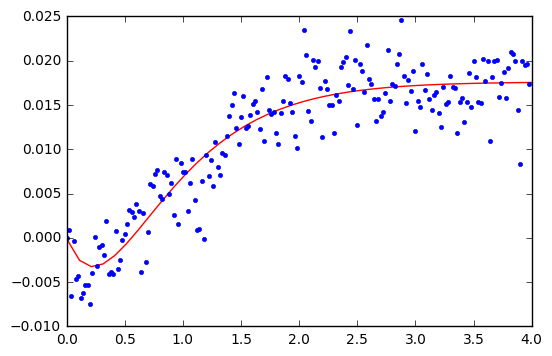

('K1 =', 4.7422945033763462, '+/-', 28441.402009803784)
('k2 =', 4.761506574312957, '+/-', 28441.402021325095)
('tau_1 =', 0.26605662468142194, '+/-', 28441.402009803784)
('tau_2 =', 0.2675991283258945, '+/-', 28441.402021325095)


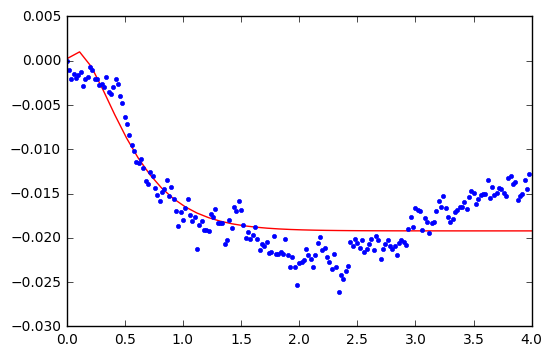

('K1 =', 1.9425371798016373, '+/-', 1178.1747001588933)
('k2 =', 1.9077845072447752, '+/-', 1178.1596486724063)
('tau_1 =', 1.2567976765843552, '+/-', 1178.1747001588933)
('tau_2 =', 1.3161113536279012, '+/-', 1178.1596486724063)


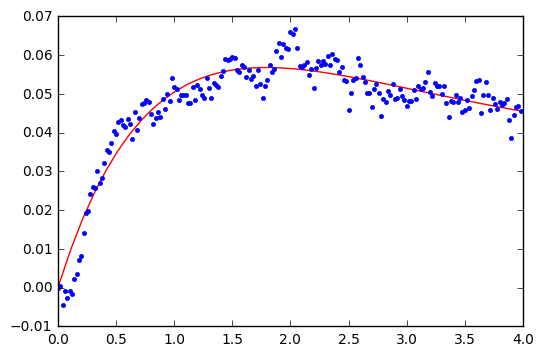

('K1 =', 0.11304516550240218, '+/-', 72048.241829587467)
('k2 =', -0.1720443186303747, '+/-', 72048.241018808825)
('tau_1 =', 0.94780780987615931, '+/-', 72048.241829587467)
('tau_2 =', 0.94783296966942965, '+/-', 72048.241018808825)


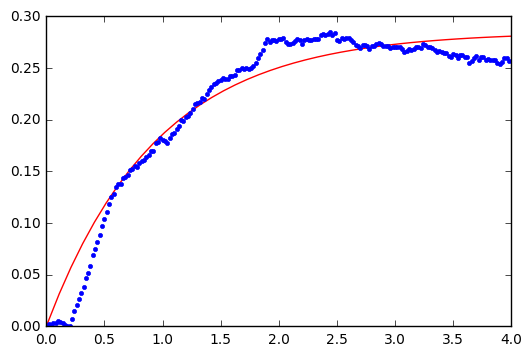

('K1 =', 0.10706706587117773, '+/-', 57302.365761419496)
('k2 =', -0.1638539784335554, '+/-', 57302.365743051938)
('tau_1 =', 0.81775376413823864, '+/-', 57302.365761419496)
('tau_2 =', 0.81777687388114495, '+/-', 57302.365743051938)


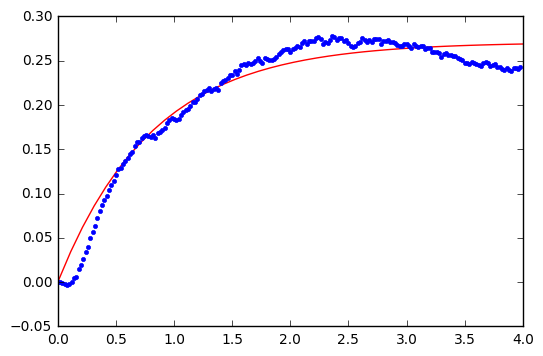

('K1 =', 15.087853521913068, '+/-', nan)
('k2 =', 15.002787151069469, '+/-', nan)
('tau_1 =', 0.44763801961829042, '+/-', nan)
('tau_2 =', 0.44472956092790561, '+/-', nan)


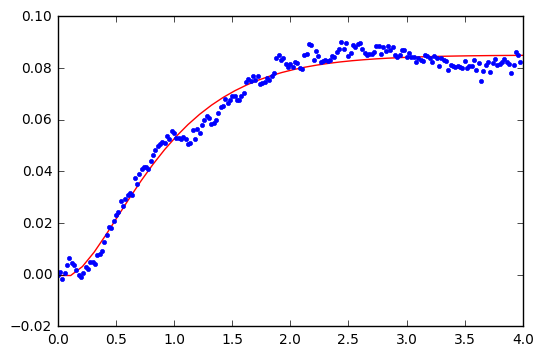

('K1 =', -0.046574995320444942, '+/-', 50937.808315331138)
('k2 =', 0.15670939077524934, '+/-', 50937.808394676016)
('tau_1 =', 0.41406620619780771, '+/-', 50937.808315331138)
('tau_2 =', 0.41406272534080657, '+/-', 50937.808394676016)


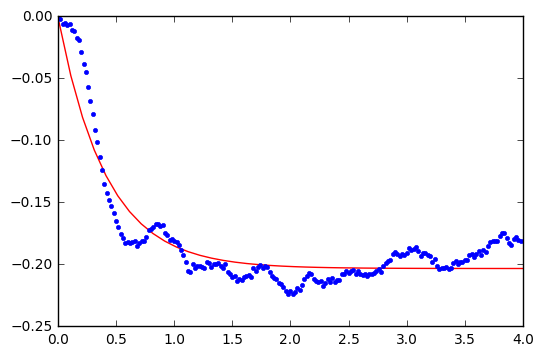

('K1 =', -0.13365955347288216, '+/-', 0.047901428484445299)
('k2 =', -0.2604585203418151, '+/-', 0.047307890277697252)
('tau_1 =', 0.32557209380238533, '+/-', 0.047901428484445299)
('tau_2 =', 0.71445490489815622, '+/-', 0.047307890277697252)


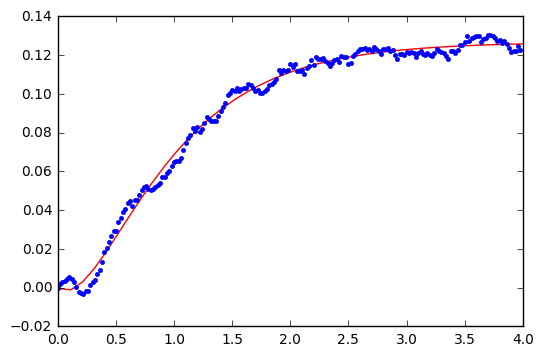

('K1 =', 0.16972912073174407, '+/-', 0.0014005059134754006)
('k2 =', 0.0097942833849975017, '+/-', 0.001103674988082828)
('tau_1 =', 2.3089366361395074, '+/-', 0.0014005059134754006)
('tau_2 =', 0.095801044374574609, '+/-', 0.001103674988082828)


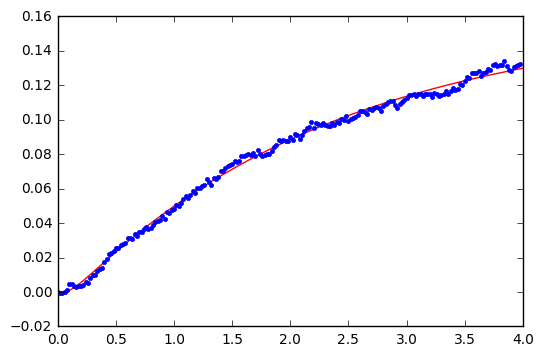

('K1 =', 610.29330791058192, '+/-', 31142.078806200498)
('k2 =', 180.86101064665661, '+/-', 26028.336446555702)
('tau_1 =', 649.68978404565792, '+/-', 31142.078806200498)
('tau_2 =', 195.95243497080685, '+/-', 26028.336446555702)


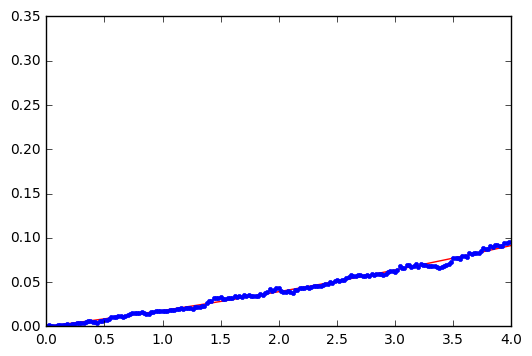

('K1 =', 7.3105617837913783, '+/-', 58777.490906318802)
('k2 =', 7.3144471374804381, '+/-', 58777.485026192095)
('tau_1 =', 1.1316190064357912, '+/-', 58777.490906318802)
('tau_2 =', 1.1429546211204586, '+/-', 58777.485026192095)


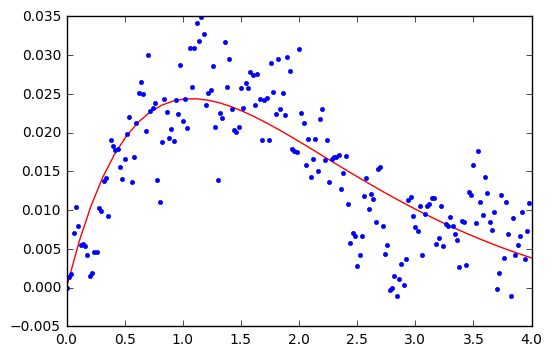

('K1 =', 2.7030353644012277, '+/-', 24514.324646930301)
('k2 =', 2.7377582078030396, '+/-', 24514.316476610617)
('tau_1 =', 1.3612516600375459, '+/-', 24514.324646930301)
('tau_2 =', 1.3796149485995635, '+/-', 24514.316476610617)


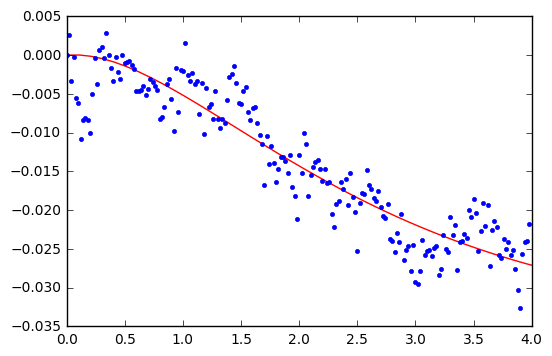

('K1 =', 12.058620700947371, '+/-', 42602.234212750533)
('k2 =', 14.046573660322943, '+/-', 42472.687369726998)
('tau_1 =', 10.633175404306469, '+/-', 42602.234212750533)
('tau_2 =', 12.875587124228447, '+/-', 42472.687369726998)


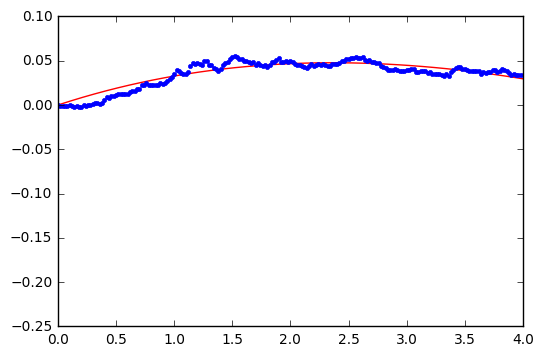

('K1 =', -0.12402819594941326, '+/-', 0.040934379112085015)
('k2 =', -0.11338735839332306, '+/-', 0.036891802753859823)
('tau_1 =', 0.44321225442710904, '+/-', 0.040934379112085015)
('tau_2 =', 1.3712036613602121, '+/-', 0.036891802753859823)


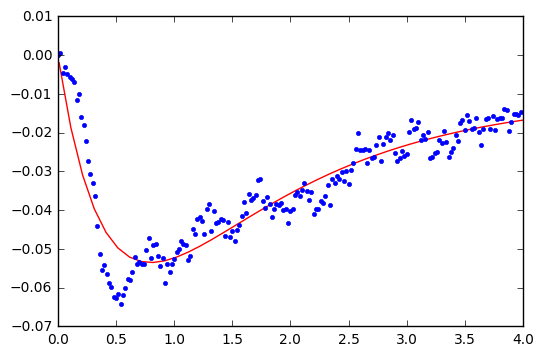

('K1 =', 15.467064359434023, '+/-', nan)
('k2 =', 15.430258705767708, '+/-', nan)
('tau_1 =', 0.64547503943036155, '+/-', nan)
('tau_2 =', 0.64107866170123429, '+/-', nan)


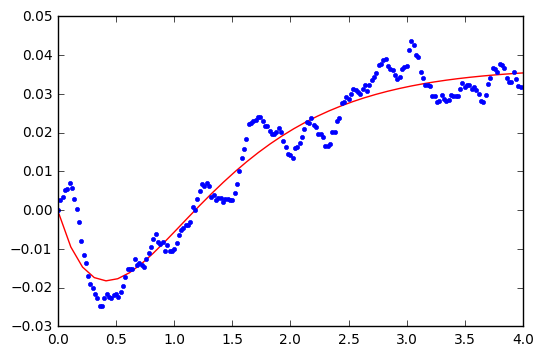

('K1 =', 22.741072125481594, '+/-', 48988.219408196273)
('k2 =', 22.627108170110077, '+/-', 48988.220131367794)
('tau_1 =', 0.63145278789780857, '+/-', 48988.219408196273)
('tau_2 =', 0.62773645019163848, '+/-', 48988.220131367794)


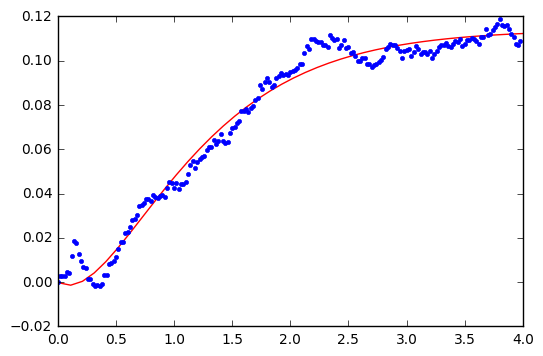

('K1 =', 2538.1612056206563, '+/-', 166792.37491822883)
('k2 =', 8637.6383198214517, '+/-', 313461.05816755944)
('tau_1 =', 336.72036514147476, '+/-', 166792.37491822883)
('tau_2 =', 1154.2929082759911, '+/-', 313461.05816755944)


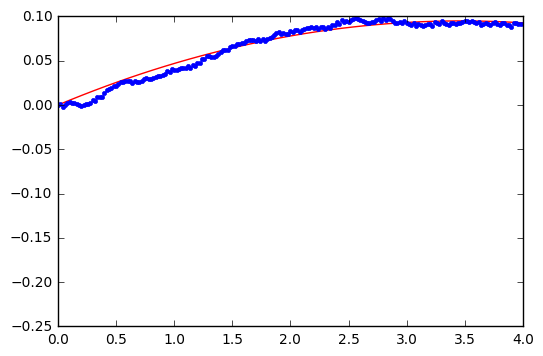

('K1 =', 0.11509738221327241, '+/-', 31455.730926445904)
('k2 =', 0.02746744945058081, '+/-', 31455.730628013589)
('tau_1 =', 0.75682131140544329, '+/-', 31455.730926445904)
('tau_2 =', 0.75680980363432127, '+/-', 31455.730628013589)


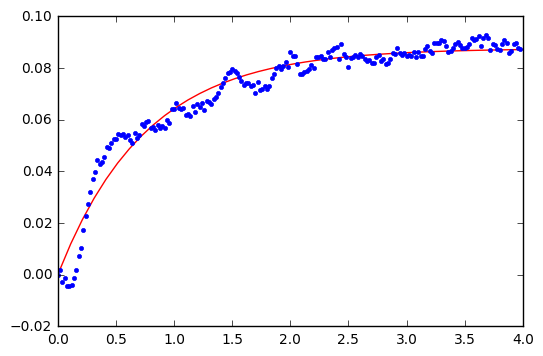

('K1 =', -5.8977387932626328, '+/-', 10164.631589639563)
('k2 =', -5.9434463527327601, '+/-', 10164.630581246518)
('tau_1 =', 0.7031727369176114, '+/-', 10164.631589639563)
('tau_2 =', 0.71190128730106816, '+/-', 10164.630581246518)


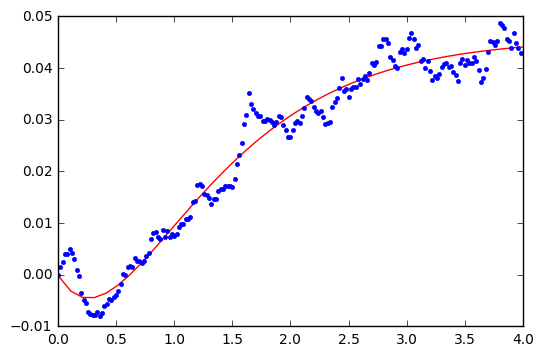

('K1 =', 21.657951995047217, '+/-', nan)
('k2 =', 21.559833587924484, '+/-', nan)
('tau_1 =', 0.63676602845609875, '+/-', nan)
('tau_2 =', 0.63344634771403885, '+/-', nan)


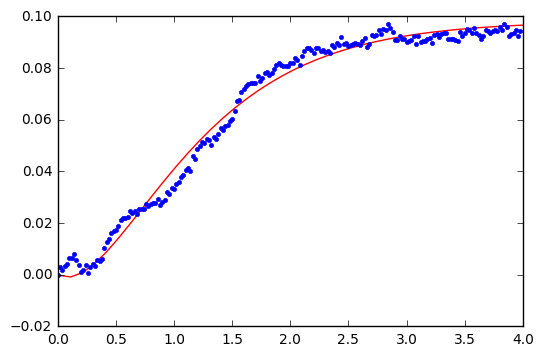

('K1 =', -0.0088257219165376061, '+/-', 0.013335295048555018)
('k2 =', 0.0066387216132515409, '+/-', 0.016959232963294244)
('tau_1 =', 2.0619241565090363, '+/-', 0.013335295048555018)
('tau_2 =', 0.63314026617740271, '+/-', 0.016959232963294244)


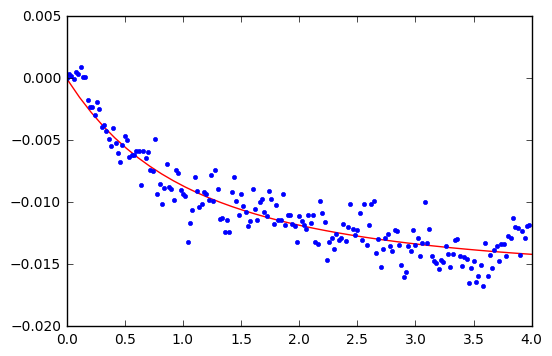

('K1 =', -0.024966782692623261, '+/-', 0.0010252811229309884)
('k2 =', 250.05979364098346, '+/-', 78188.822727168299)
('tau_1 =', 0.29868607730786334, '+/-', 0.0010252811229309884)
('tau_2 =', 20268.667559700469, '+/-', 78188.822727168299)


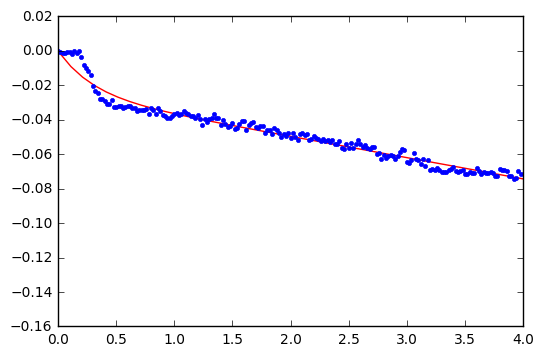

TypeError: Could not compare [None] with block values

In [600]:
for stimulus in stimuli_list:
    df_1 = pd.DataFrame()
    for muscle in muscle_list: 
        
        times = np.arange(350)*0.02
        colors = times[150:350]
        x1 = times[150:350]
        x=x1-x1[0]
        muscle_choice = stimulus[muscle]
        y = muscle_choice[150:350]-muscle_choice[150]
        
        popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

        print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
        print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
        print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
        print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

        df =pd.DataFrame({'K1': popt[0],'K2': popt[1], 'tau1': popt[2], 'tau2': popt[3]},
                  index=[muscle])
        #df =pd.DataFrame
    
        df_1.append(df)
        #plt.errorbar(x, y, yerr=e, fmt="none")
        xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
        plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
        plt.plot(x, y, '.')
        plt.xlim(0, 4)
        plt.show()
    df_1.to_csv('constants' + '%s' + '.csv')  %(stimulus)

K1          K2      tau1         tau2
hg4_r -0.024967  250.059794  0.298686  20268.66756

('K1 =', 4.7422945033763462, '+/-', 28441.402009803784)
('k2 =', 4.761506574312957, '+/-', 28441.402021325095)
('tau_1 =', 0.26605662468142194, '+/-', 28441.402009803784)
('tau_2 =', 0.2675991283258945, '+/-', 28441.402021325095)
('Parameters', array([-6.54690563, -7.06954683,  8.16637392,  9.05811593]))
('RMSE:', 0.0017408456064120037)
('R-squared:', 0.92272948265522325)
()


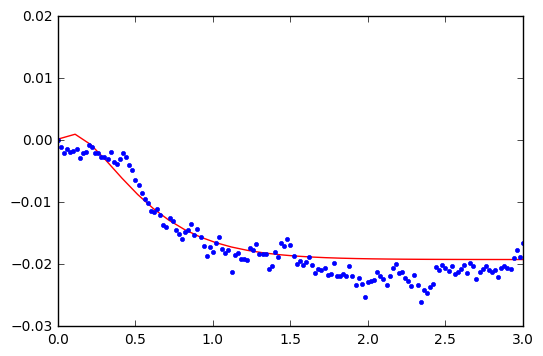

In [415]:
#### edit this method and incorportate into massive figure 

import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

muscle_choice = yaw_left_df['b2_l']

y = muscle_choice[150:350]-muscle_choice[150]


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
plt.ylim(-0.03, 0.02)
plt.show()

In [513]:
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#from thllib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import networkx as nx


import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [495]:
#yaw_right_data_avgs = 


yr_b1l = np.median(yaw_right_df['b1_l'][150:350])
yr_b2l =  np.median(yaw_right_df['b2_l'][150:350])
yr_b3l =  np.median(yaw_right_df['b3_l'][150:350])
yr_i1l =  np.median(yaw_right_df['i1_l'][150:350])
yr_i2l =  np.median(yaw_right_df['i2_l'][150:350])
yr_iii1l =  np.median(yaw_right_df['iii1_l'][150:350])
yr_iii3l =  np.median(yaw_right_df['iii3_l'][150:350])
yr_hg1l =  np.median(yaw_right_df['hg1_l'][150:350])
yr_hg2l =  np.median(yaw_right_df['hg2_l'][150:350])
yr_hg3l =  np.median(yaw_right_df['hg3_l'][150:350])
yr_hg4l =  np.median(yaw_right_df['hg4_l'][150:350])
yr_b1r =  np.median(yaw_right_df['b1_r'][150:350])
yr_b2r =  np.median(yaw_right_df['b2_r'][150:350])
yr_b3r =  np.median(yaw_right_df['b3_r'][150:350])
yr_i1r =  np.median(yaw_right_df['i1_r'][150:350])
yr_i2r =  np.median(yaw_right_df['i2_r'][150:350])
yr_iii1r =  np.median(yaw_right_df['iii1_r'][150:350])
yr_iii3r =  np.median(yaw_right_df['iii3_r'][150:350])
yr_hg1r =  np.median(yaw_right_df['hg1_r'][150:350])
yr_hg2r =  np.median(yaw_right_df['hg2_r'][150:350])
yr_hg3r =  np.median(yaw_right_df['hg3_r'][150:350])
yr_hg4r =  np.median(yaw_right_df['hg4_r'][150:350])


yl_b1l = np.median(yaw_left_df['b1_l'][150:350])
yl_b2l =  np.median(yaw_left_df['b2_l'][150:350])
yl_b3l =  np.median(yaw_left_df['b3_l'][150:350])
yl_i1l =  np.median(yaw_left_df['i1_l'][150:350])
yl_i2l =  np.median(yaw_left_df['i2_l'][150:350])
yl_iii1l =  np.median(yaw_left_df['iii1_l'][150:350])
yl_iii3l =  np.median(yaw_left_df['iii3_l'][150:350])
yl_hg1l =  np.median(yaw_left_df['hg1_l'][150:350])
yl_hg2l =  np.median(yaw_left_df['hg2_l'][150:350])
yl_hg3l =  np.median(yaw_left_df['hg3_l'][150:350])
yl_hg4l =  np.median(yaw_left_df['hg4_l'][150:350])
yl_b1r =  np.median(yaw_left_df['b1_r'][150:350])
yl_b2r =  np.median(yaw_left_df['b2_r'][150:350])
yl_b3r =  np.median(yaw_left_df['b3_r'][150:350])
yl_i1r =  np.median(yaw_left_df['i1_r'][150:350])
yl_i2r =  np.median(yaw_left_df['i2_r'][150:350])
yl_iii1r =  np.median(yaw_left_df['iii1_r'][150:350])
yl_iii3r =  np.median(yaw_left_df['iii3_r'][150:350])
yl_hg1r =  np.median(yaw_left_df['hg1_r'][150:350])
yl_hg2r =  np.median(yaw_left_df['hg2_r'][150:350])
yl_hg3r =  np.median(yaw_left_df['hg3_r'][150:350])
yl_hg4r =  np.median(yaw_left_df['hg4_r'][150:350])



pu_b1l = np.median(pitch_up_df['b1_l'][150:350])
pu_b2l =  np.median(pitch_up_df['b2_l'][150:350])
pu_b3l =  np.median(pitch_up_df['b3_l'][150:350])
pu_i1l =  np.median(pitch_up_df['i1_l'][150:350])
pu_i2l =  np.median(pitch_up_df['i2_l'][150:350])
pu_iii1l =  np.median(pitch_up_df['iii1_l'][150:350])
pu_iii3l =  np.median(pitch_up_df['iii3_l'][150:350])
pu_hg1l =  np.median(pitch_up_df['hg1_l'][150:350])
pu_hg2l =  np.median(pitch_up_df['hg2_l'][150:350])
pu_hg3l =  np.median(pitch_up_df['hg3_l'][150:350])
pu_hg4l =  np.median(pitch_up_df['hg4_l'][150:350])
pu_b1r =  np.median(pitch_up_df['b1_r'][150:350])
pu_b2r =  np.median(pitch_up_df['b2_r'][150:350])
pu_b3r =  np.median(pitch_up_df['b3_r'][150:350])
pu_i1r =  np.median(pitch_up_df['i1_r'][150:350])
pu_i2r =  np.median(pitch_up_df['i2_r'][150:350])
pu_iii1r =  np.median(pitch_up_df['iii1_r'][150:350])
pu_iii3r =  np.median(pitch_up_df['iii3_r'][150:350])
pu_hg1r =  np.median(pitch_up_df['hg1_r'][150:350])
pu_hg2r =  np.median(pitch_up_df['hg2_r'][150:350])
pu_hg3r =  np.median(pitch_up_df['hg3_r'][150:350])
pu_hg4r =  np.median(pitch_up_df['hg4_r'][150:350])



pd_b1l = np.median(pitch_down_df['b1_l'][150:350])
pd_b2l =  np.median(pitch_down_df['b2_l'][150:350])
pd_b3l =  np.median(pitch_down_df['b3_l'][150:350])
pd_i1l =  np.median(pitch_down_df['i1_l'][150:350])
pd_i2l =  np.median(pitch_down_df['i2_l'][150:350])
pd_iii1l =  np.median(pitch_down_df['iii1_l'][150:350])
pd_iii3l =  np.median(pitch_down_df['iii3_l'][150:350])
pd_hg1l =  np.median(pitch_down_df['hg1_l'][150:350])
pd_hg2l =  np.median(pitch_down_df['hg2_l'][150:350])
pd_hg3l =  np.median(pitch_down_df['hg3_l'][150:350])
pd_hg4l =  np.median(pitch_down_df['hg4_l'][150:350])
pd_b1r =  np.median(pitch_down_df['b1_r'][150:350])
pd_b2r =  np.median(pitch_down_df['b2_r'][150:350])
pd_b3r =  np.median(pitch_down_df['b3_r'][150:350])
pd_i1r =  np.median(pitch_down_df['i1_r'][150:350])
pd_i2r =  np.median(pitch_down_df['i2_r'][150:350])
pd_iii1r =  np.median(pitch_down_df['iii1_r'][150:350])
pd_iii3r =  np.median(pitch_down_df['iii3_r'][150:350])
pd_hg1r =  np.median(pitch_down_df['hg1_r'][150:350])
pd_hg2r =  np.median(pitch_down_df['hg2_r'][150:350])
pd_hg3r =  np.median(pitch_down_df['hg3_r'][150:350])
pd_hg4r =  np.median(pitch_down_df['hg4_r'][150:350])




rc_b1l = np.median(roll_cw_df['b1_l'][150:350])
rc_b2l =  np.median(roll_cw_df['b2_l'][150:350])
rc_b3l =  np.median(roll_cw_df['b3_l'][150:350])
rc_i1l =  np.median(roll_cw_df['i1_l'][150:350])
rc_i2l =  np.median(roll_cw_df['i2_l'][150:350])
rc_iii1l =  np.median(roll_cw_df['iii1_l'][150:350])
rc_iii3l =  np.median(roll_cw_df['iii3_l'][150:350])
rc_hg1l =  np.median(roll_cw_df['hg1_l'][150:350])
rc_hg2l =  np.median(roll_cw_df['hg2_l'][150:350])
rc_hg3l =  np.median(roll_cw_df['hg3_l'][150:350])
rc_hg4l =  np.median(roll_cw_df['hg4_l'][150:350])
rc_b1r =  np.median(roll_cw_df['b1_r'][150:350])
rc_b2r =  np.median(roll_cw_df['b2_r'][150:350])
rc_b3r =  np.median(roll_cw_df['b3_r'][150:350])
rc_i1r =  np.median(roll_cw_df['i1_r'][150:350])
rc_i2r =  np.median(roll_cw_df['i2_r'][150:350])
rc_iii1r =  np.median(roll_cw_df['iii1_r'][150:350])
rc_iii3r =  np.median(roll_cw_df['iii3_r'][150:350])
rc_hg1r =  np.median(roll_cw_df['hg1_r'][150:350])
rc_hg2r =  np.median(roll_cw_df['hg2_r'][150:350])
rc_hg3r =  np.median(roll_cw_df['hg3_r'][150:350])
rc_hg4r =  np.median(roll_cw_df['hg4_r'][150:350])



rcc_b1l = np.median(roll_ccw_df['b1_l'][150:350])
rcc_b2l =  np.median(roll_ccw_df['b2_l'][150:350])
rcc_b3l =  np.median(roll_ccw_df['b3_l'][150:350])
rcc_i1l =  np.median(roll_ccw_df['i1_l'][150:350])
rcc_i2l =  np.median(roll_ccw_df['i2_l'][150:350])
rcc_iii1l =  np.median(roll_ccw_df['iii1_l'][150:350])
rcc_iii3l =  np.median(roll_ccw_df['iii3_l'][150:350])
rcc_hg1l =  np.median(roll_ccw_df['hg1_l'][150:350])
rcc_hg2l =  np.median(roll_ccw_df['hg2_l'][150:350])
rcc_hg3l =  np.median(roll_ccw_df['hg3_l'][150:350])
rcc_hg4l =  np.median(roll_ccw_df['hg4_l'][150:350])
rcc_b1r =  np.median(roll_ccw_df['b1_r'][150:350])
rcc_b2r =  np.median(roll_ccw_df['b2_r'][150:350])
rcc_b3r =  np.median(roll_ccw_df['b3_r'][150:350])
rcc_i1r =  np.median(roll_ccw_df['i1_r'][150:350])
rcc_i2r =  np.median(roll_ccw_df['i2_r'][150:350])
rcc_iii1r =  np.median(roll_ccw_df['iii1_r'][150:350])
rcc_iii3r =  np.median(roll_ccw_df['iii3_r'][150:350])
rcc_hg1r =  np.median(roll_ccw_df['hg1_r'][150:350])
rcc_hg2r =  np.median(roll_ccw_df['hg2_r'][150:350])
rcc_hg3r =  np.median(roll_ccw_df['hg3_r'][150:350])
rcc_hg4r =  np.median(roll_ccw_df['hg4_r'][150:350])


In [496]:

all_yr_b1l = np.median(yaw_right_df['b1_l'][0:500])
all_yr_b2l =  np.median(yaw_right_df['b2_l'][0:500])
all_yr_b3l =  np.median(yaw_right_df['b3_l'][0:500])
all_yr_i1l =  np.median(yaw_right_df['i1_l'][0:500])
all_yr_i2l =  np.median(yaw_right_df['i2_l'][0:500])
all_yr_iii1l =  np.median(yaw_right_df['iii1_l'][0:500])
all_yr_iii3l =  np.median(yaw_right_df['iii3_l'][0:500])
all_yr_hg1l =  np.median(yaw_right_df['hg1_l'][0:500])
all_yr_hg2l =  np.median(yaw_right_df['hg2_l'][0:500])
all_yr_hg3l =  np.median(yaw_right_df['hg3_l'][0:500])
all_yr_hg4l =  np.median(yaw_right_df['hg4_l'][0:500])
all_yr_b1r =  np.median(yaw_right_df['b1_r'][0:500])
all_yr_b2r =  np.median(yaw_right_df['b2_r'][0:500])
all_yr_b3r =  np.median(yaw_right_df['b3_r'][0:500])
all_yr_i1r =  np.median(yaw_right_df['i1_r'][0:500])
all_yr_i2r =  np.median(yaw_right_df['i2_r'][0:500])
all_yr_iii1r =  np.median(yaw_right_df['iii1_r'][0:500])
all_yr_iii3r =  np.median(yaw_right_df['iii3_r'][0:500])
all_yr_hg1r =  np.median(yaw_right_df['hg1_r'][0:500])
all_yr_hg2r =  np.median(yaw_right_df['hg2_r'][0:500])
all_yr_hg3r =  np.median(yaw_right_df['hg3_r'][0:500])
all_yr_hg4r =  np.median(yaw_right_df['hg4_r'][0:500])


all_yl_b1l = np.median(yaw_left_df['b1_l'][0:500])
all_yl_b2l =  np.median(yaw_left_df['b2_l'][0:500])
all_yl_b3l =  np.median(yaw_left_df['b3_l'][0:500])
all_yl_i1l =  np.median(yaw_left_df['i1_l'][0:500])
all_yl_i2l =  np.median(yaw_left_df['i2_l'][0:500])
all_yl_iii1l =  np.median(yaw_left_df['iii1_l'][0:500])
all_yl_iii3l =  np.median(yaw_left_df['iii3_l'][0:500])
all_yl_hg1l =  np.median(yaw_left_df['hg1_l'][0:500])
all_yl_hg2l =  np.median(yaw_left_df['hg2_l'][0:500])
all_yl_hg3l =  np.median(yaw_left_df['hg3_l'][0:500])
all_yl_hg4l =  np.median(yaw_left_df['hg4_l'][0:500])
all_yl_b1r =  np.median(yaw_left_df['b1_r'][0:500])
vyl_b2r =  np.median(yaw_left_df['b2_r'][0:500])
all_yl_b3r =  np.median(yaw_left_df['b3_r'][0:500])
all_yl_i1r =  np.median(yaw_left_df['i1_r'][0:500])
all_yl_i2r =  np.median(yaw_left_df['i2_r'][0:500])
all_yl_iii1r =  np.median(yaw_left_df['iii1_r'][0:500])
all_yl_iii3r =  np.median(yaw_left_df['iii3_r'][0:500])
all_yl_hg1r =  np.median(yaw_left_df['hg1_r'][0:500])
all_yl_hg2r =  np.median(yaw_left_df['hg2_r'][0:500])
all_yl_hg3r =  np.median(yaw_left_df['hg3_r'][0:500])
all_yl_hg4r =  np.median(yaw_left_df['hg4_r'][0:500])



all_pu_b1l = np.median(pitch_up_df['b1_l'][0:500])
all_pu_b2l =  np.median(pitch_up_df['b2_l'][0:500])
all_pu_b3l =  np.median(pitch_up_df['b3_l'][0:500])
all_pu_i1l =  np.median(pitch_up_df['i1_l'][0:500])
all_pu_i2l =  np.median(pitch_up_df['i2_l'][0:500])
all_pu_iii1l =  np.median(pitch_up_df['iii1_l'][0:500])
all_pu_iii3l =  np.median(pitch_up_df['iii3_l'][0:500])
all_pu_hg1l =  np.median(pitch_up_df['hg1_l'][0:500])
all_pu_hg2l =  np.median(pitch_up_df['hg2_l'][0:500])
all_pu_hg3l =  np.median(pitch_up_df['hg3_l'][0:500])
all_pu_hg4l =  np.median(pitch_up_df['hg4_l'][0:500])
all_pu_b1r =  np.median(pitch_up_df['b1_r'][0:500])
all_pu_b2r =  np.median(pitch_up_df['b2_r'][0:500])
all_pu_b3r =  np.median(pitch_up_df['b3_r'][0:500])
all_pu_i1r =  np.median(pitch_up_df['i1_r'][0:500])
all_pu_i2r =  np.median(pitch_up_df['i2_r'][0:500])
all_pu_iii1r =  np.median(pitch_up_df['iii1_r'][0:500])
all_pu_iii3r =  np.median(pitch_up_df['iii3_r'][0:500])
all_pu_hg1r =  np.median(pitch_up_df['hg1_r'][0:500])
all_pu_hg2r =  np.median(pitch_up_df['hg2_r'][0:500])
all_pu_hg3r =  np.median(pitch_up_df['hg3_r'][0:500])
all_pu_hg4r =  np.median(pitch_up_df['hg4_r'][0:500])



all_pd_b1l = np.median(pitch_down_df['b1_l'][0:500])
all_pd_b2l =  np.median(pitch_down_df['b2_l'][0:500])
all_pd_b3l =  np.median(pitch_down_df['b3_l'][0:500])
all_pd_i1l =  np.median(pitch_down_df['i1_l'][0:500])
all_pd_i2l =  np.median(pitch_down_df['i2_l'][0:500])
all_pd_iii1l =  np.median(pitch_down_df['iii1_l'][0:500])
all_pd_iii3l =  np.median(pitch_down_df['iii3_l'][0:500])
all_pd_hg1l =  np.median(pitch_down_df['hg1_l'][0:500])
all_pd_hg2l =  np.median(pitch_down_df['hg2_l'][0:500])
all_pd_hg3l =  np.median(pitch_down_df['hg3_l'][0:500])
all_pd_hg4l =  np.median(pitch_down_df['hg4_l'][0:500])
all_pd_b1r =  np.median(pitch_down_df['b1_r'][0:500])
all_pd_b2r =  np.median(pitch_down_df['b2_r'][0:500])
all_pd_b3r =  np.median(pitch_down_df['b3_r'][0:500])
all_pd_i1r =  np.median(pitch_down_df['i1_r'][0:500])
all_pd_i2r =  np.median(pitch_down_df['i2_r'][0:500])
all_pd_iii1r =  np.median(pitch_down_df['iii1_r'][0:500])
all_pd_iii3r =  np.median(pitch_down_df['iii3_r'][0:500])
all_pd_hg1r =  np.median(pitch_down_df['hg1_r'][0:500])
all_pd_hg2r =  np.median(pitch_down_df['hg2_r'][0:500])
all_pd_hg3r =  np.median(pitch_down_df['hg3_r'][0:500])
all_pd_hg4r =  np.median(pitch_down_df['hg4_r'][0:500])




all_rc_b1l = np.median(roll_cw_df['b1_l'][0:500])
all_rc_b2l =  np.median(roll_cw_df['b2_l'][0:500])
all_rc_b3l =  np.median(roll_cw_df['b3_l'][0:500])
all_rc_i1l =  np.median(roll_cw_df['i1_l'][0:500])
all_rc_i2l =  np.median(roll_cw_df['i2_l'][0:500])
all_rc_iii1l =  np.median(roll_cw_df['iii1_l'][0:500])
all_rc_iii3l =  np.median(roll_cw_df['iii3_l'][0:500])
all_rc_hg1l =  np.median(roll_cw_df['hg1_l'][0:500])
all_rc_hg2l =  np.median(roll_cw_df['hg2_l'][0:500])
all_rc_hg3l =  np.median(roll_cw_df['hg3_l'][0:500])
all_rc_hg4l =  np.median(roll_cw_df['hg4_l'][0:500])
all_rc_b1r =  np.median(roll_cw_df['b1_r'][0:500])
all_rc_b2r =  np.median(roll_cw_df['b2_r'][0:500])
all_rc_b3r =  np.median(roll_cw_df['b3_r'][0:500])
all_rc_i1r =  np.median(roll_cw_df['i1_r'][0:500])
all_rc_i2r =  np.median(roll_cw_df['i2_r'][0:500])
all_rc_iii1r =  np.median(roll_cw_df['iii1_r'][0:500])
all_rc_iii3r =  np.median(roll_cw_df['iii3_r'][0:500])
all_rc_hg1r =  np.median(roll_cw_df['hg1_r'][0:500])
all_rc_hg2r =  np.median(roll_cw_df['hg2_r'][0:500])
all_rc_hg3r =  np.median(roll_cw_df['hg3_r'][0:500])
all_rc_hg4r =  np.median(roll_cw_df['hg4_r'][0:500])



all_rcc_b1l = np.median(roll_ccw_df['b1_l'][0:500])
all_rcc_b2l =  np.median(roll_ccw_df['b2_l'][0:500])
all_rcc_b3l =  np.median(roll_ccw_df['b3_l'][0:500])
all_rcc_i1l =  np.median(roll_ccw_df['i1_l'][0:500])
all_rcc_i2l =  np.median(roll_ccw_df['i2_l'][0:500])
all_rcc_iii1l =  np.median(roll_ccw_df['iii1_l'][0:500])
all_rcc_iii3l =  np.median(roll_ccw_df['iii3_l'][0:500])
all_rcc_hg1l =  np.median(roll_ccw_df['hg1_l'][0:500])
all_rcc_hg2l =  np.median(roll_ccw_df['hg2_l'][0:500])
all_rcc_hg3l =  np.median(roll_ccw_df['hg3_l'][0:500])
all_rcc_hg4l =  np.median(roll_ccw_df['hg4_l'][0:500])
all_rcc_b1r =  np.median(roll_ccw_df['b1_r'][0:500])
all_rcc_b2r =  np.median(roll_ccw_df['b2_r'][0:500])
all_rcc_b3r =  np.median(roll_ccw_df['b3_r'][0:500])
all_rcc_i1r =  np.median(roll_ccw_df['i1_r'][0:500])
all_rcc_i2r =  np.median(roll_ccw_df['i2_r'][0:500])
all_rcc_iii1r =  np.median(roll_ccw_df['iii1_r'][0:500])
all_rcc_iii3r =  np.median(roll_ccw_df['iii3_r'][0:500])
all_rcc_hg1r =  np.median(roll_ccw_df['hg1_r'][0:500])
all_rcc_hg2r =  np.median(roll_ccw_df['hg2_r'][0:500])
all_rcc_hg3r =  np.median(roll_ccw_df['hg3_r'][0:500])
all_rcc_hg4r =  np.median(roll_ccw_df['hg4_r'][0:500])


In [497]:
grand_mean_b1l = np.median([yr_b1l, yl_b1l, pu_b1l, pd_b1l, rc_b1l, rcc_b1l])
grand_mean_b2l = np.median([yr_b2l, yl_b2l, pu_b2l, pd_b2l, rc_b2l, rcc_b2l])
grand_mean_b3l = np.median([yr_b3l, yl_b3l, pu_b3l, pd_b3l, rc_b3l, rcc_b3l])
grand_mean_i1l = np.median([yr_i1l, yl_i1l, pu_i1l, pd_i1l, rc_i1l, rcc_i1l])
grand_mean_i2l = np.median([yr_i2l, yl_i2l, pu_i2l, pd_i2l, rc_i2l, rcc_i2l])
grand_mean_iii1l = np.median([yr_iii1l, yl_iii1l, pu_iii1l, pd_iii1l, rc_iii1l, rcc_iii1l])
grand_mean_iii3l = np.median([yr_iii3l, yl_iii3l, pu_iii3l, pd_iii3l, rc_iii3l, rcc_iii3l])
grand_mean_hg1l = np.median([yr_hg1l, yl_hg1l, pu_hg1l, pd_hg1l, rc_hg1l, rcc_hg1l])
grand_mean_hg2l = np.median([yr_hg2l, yl_hg2l, pu_hg2l, pd_hg2l, rc_hg2l, rcc_hg2l])
grand_mean_hg3l = np.median([yr_hg3l, yl_hg3l, pu_hg3l, pd_hg3l, rc_hg3l, rcc_hg3l])
grand_mean_hg4l = np.median([yr_hg4l, yl_hg4l, pu_hg4l, pd_hg4l, rc_hg4l, rcc_hg4l])
grand_mean_b1r = np.median([yr_b1r, yr_b1r, pu_b1r, pd_b1r, rc_b1r, rcc_b1r])
grand_mean_b2r = np.median([yr_b2r, yr_b2r, pu_b2r, pd_b2r, rc_b2r, rcc_b2r])
grand_mean_b3r = np.median([yr_b3r, yr_b3r, pu_b3r, pd_b3r, rc_b3r, rcc_b3r])
grand_mean_i1r = np.median([yr_i1r, yr_i1r, pu_i1r, pd_i1r, rc_i1r, rcc_i1r])
grand_mean_i2r = np.median([yr_i2r, yr_i2r, pu_i2r, pd_i2r, rc_i2r, rcc_i2r])
grand_mean_iii1r = np.median([yr_iii1r, yr_iii1r, pu_iii1r, pd_iii1r, rc_iii1r, rcc_iii1r])
grand_mean_iii3r = np.median([yr_iii3r, yr_iii3r, pu_iii3r, pd_iii3r, rc_iii3r, rcc_iii3r])
grand_mean_hg1r = np.median([yr_hg1r, yr_hg1r, pu_hg1r, pd_hg1r, rc_hg1r, rcc_hg1r])
grand_mean_hg2r = np.median([yr_hg2r, yr_hg2r, pu_hg2r, pd_hg2r, rc_hg2r, rcc_hg2r])
grand_mean_hg3r = np.median([yr_hg3r, yr_hg3r, pu_hg3r, pd_hg3r, rc_hg3r, rcc_hg3r])
grand_mean_hg4r = np.median([yr_hg4r, yr_hg4r, pu_hg4r, pd_hg4r, rc_hg4r, rcc_hg4r])

In [498]:
all_grand_mean_b1l = np.median([all_yr_b1l, all_yl_b1l, all_pu_b1l, all_pd_b1l, all_rc_b1l, all_rcc_b1l])
all_grand_mean_b2l = np.median([all_yr_b2l, all_yl_b2l, all_pu_b2l, all_pd_b2l, all_rc_b2l, all_rcc_b2l])
all_grand_mean_b3l = np.median([all_yr_b3l, all_yl_b3l, all_pu_b3l, all_pd_b3l, all_rc_b3l, all_rcc_b3l])
all_grand_mean_i1l = np.median([all_yr_i1l, all_yl_i1l, all_pu_i1l, all_pd_i1l, all_rc_i1l, all_rcc_i1l])
all_grand_mean_i2l = np.median([all_yr_i2l, all_yl_i2l, all_pu_i2l, all_pd_i2l, all_rc_i2l, all_rcc_i2l])
all_grand_mean_iii1l = np.median([all_yr_iii1l, all_yl_iii1l, all_pu_iii1l, all_pd_iii1l, all_rc_iii1l, all_rcc_iii1l])
all_grand_mean_iii3l = np.median([all_yr_iii3l, all_yl_iii3l, all_pu_iii3l, all_pd_iii3l, all_rc_iii3l, all_rcc_iii3l])
all_grand_mean_hg1l = np.median([all_yr_hg1l, all_yl_hg1l, all_pu_hg1l, all_pd_hg1l, all_rc_hg1l, all_rcc_hg1l])
all_grand_mean_hg2l = np.median([all_yr_hg2l, all_yl_hg2l, all_pu_hg2l, all_pd_hg2l, all_rc_hg2l, all_rcc_hg2l])
all_grand_mean_hg3l = np.median([all_yr_hg3l, all_yl_hg3l, all_pu_hg3l, all_pd_hg3l, all_rc_hg3l, all_rcc_hg3l])
all_grand_mean_hg4l = np.median([all_yr_hg4l, all_yl_hg4l, all_pu_hg4l, all_pd_hg4l, all_rc_hg4l, all_rcc_hg4l])
all_grand_mean_b1r = np.median([all_yr_b1r, all_yr_b1r, all_pu_b1r, all_pd_b1r, all_rc_b1r, all_rcc_b1r])
all_grand_mean_b2r = np.median([all_yr_b2r, all_yr_b2r, all_pu_b2r, all_pd_b2r, all_rc_b2r, all_rcc_b2r])
all_grand_mean_b3r = np.median([all_yr_b3r, all_yr_b3r, all_pu_b3r, all_pd_b3r, all_rc_b3r, all_rcc_b3r])
all_grand_mean_i1r = np.median([all_yr_i1r, all_yr_i1r, all_pu_i1r, all_pd_i1r, all_rc_i1r, all_rcc_i1r])
all_grand_mean_i2r = np.median([all_yr_i2r, all_yr_i2r, all_pu_i2r, all_pd_i2r, all_rc_i2r, all_rcc_i2r])
all_grand_mean_iii1r = np.median([all_yr_iii1r, all_yr_iii1r, all_pu_iii1r, all_pd_iii1r, all_rc_iii1r, all_rcc_iii1r])
all_grand_mean_iii3r = np.median([all_yr_iii3r, all_yr_iii3r, all_pu_iii3r, all_pd_iii3r, all_rc_iii3r, all_rcc_iii3r])
all_grand_mean_hg1r = np.median([all_yr_hg1r, all_yr_hg1r, all_pu_hg1r, all_pd_hg1r, all_rc_hg1r, all_rcc_hg1r])
all_grand_mean_hg2r = np.median([all_yr_hg2r, all_yr_hg2r, all_pu_hg2r, all_pd_hg2r, all_rc_hg2r, all_rcc_hg2r])
all_grand_mean_hg3r = np.median([all_yr_hg3r, all_yr_hg3r, all_pu_hg3r, all_pd_hg3r, all_rc_hg3r, all_rcc_hg3r])
all_grand_mean_hg4r = np.median([all_yr_hg4r, all_yr_hg4r, all_pu_hg4r, all_pd_hg4r, all_rc_hg4r, all_rcc_hg4r])

In [499]:
yr_data = ([yr_b1l, yr_b2l, yr_b3l, yr_i1l, yr_i2l, yr_iii1l, yr_iii3l, yr_hg1l, yr_hg2l, yr_hg3l, yr_hg4l], 
           [yr_b1r, yr_b2r, yr_b3r, yr_i1r, yr_i2r, yr_iii1r, yr_iii3r, yr_hg1r, yr_hg2r, yr_hg3r, yr_hg4r])

In [500]:
yl_data = ([yl_b1l, yl_b2l, yl_b3l, yl_i1l, yl_i2l, yl_iii1l, yl_iii3l, yl_hg1l, yl_hg2l, yl_hg3l, yl_hg4l], 
           [yl_b1r, yl_b2r, yl_b3r, yl_i1r, yl_i2r, yl_iii1r, yl_iii3r, yl_hg1r, yl_hg2r, yl_hg3r, yl_hg4r])

In [501]:
pu_data = ([pu_b1l, pu_b2l, pu_b3l, pu_i1l, pu_i2l, pu_iii1l, pu_iii3l, pu_hg1l, pu_hg2l, pu_hg3l, pu_hg4l], 
           [pu_b1r, pu_b2r, pu_b3r, pu_i1r, pu_i2r, pu_iii1r, pu_iii3r, pu_hg1r, pu_hg2r, pu_hg3r, pu_hg4r])

In [502]:
pd_data = ([pd_b1l, pd_b2l, pd_b3l, pd_i1l, pd_i2l, pd_iii1l, pd_iii3l, pd_hg1l, pd_hg2l, pd_hg3l, pd_hg4l], 
           [pd_b1r, pd_b2r, pd_b3r, pd_i1r, pd_i2r, pd_iii1r, pd_iii3r, pd_hg1r, pd_hg2r, pd_hg3r, pd_hg4r])

In [503]:
rc_data = ([rc_b1l, rc_b2l, rc_b3l, rc_i1l, rc_i2l, rc_iii1l, rc_iii3l, rc_hg1l, rc_hg2l, rc_hg3l, rc_hg4l], 
           [rc_b1r, rc_b2r, rc_b3r, rc_i1r, rc_i2r, rc_iii1r, rc_iii3r, rc_hg1r, rc_hg2r, rc_hg3r, rc_hg4r])

In [504]:
rcc_data = ([rcc_b1l, rcc_b2l, rcc_b3l, rcc_i1l, rcc_i2l, rcc_iii1l, rcc_iii3l, rcc_hg1l, rcc_hg2l, rcc_hg3l, rcc_hg4l], 
           [rcc_b1r, rcc_b2r, rcc_b3r, rcc_i1r, rcc_i2r, rcc_iii1r, rcc_iii3r, rcc_hg1r, rcc_hg2r, rcc_hg3r, rcc_hg4r])

In [505]:
grand_mean_data = ([grand_mean_b1l, grand_mean_b2l, grand_mean_b3l, grand_mean_i1l, grand_mean_i2l, grand_mean_iii1l, grand_mean_iii3l, grand_mean_hg1l, grand_mean_hg2l, grand_mean_hg3l, grand_mean_hg4l], 
           [grand_mean_b1r, grand_mean_b2r, grand_mean_b3r, grand_mean_i1r, grand_mean_i2r, grand_mean_iii1r, grand_mean_iii3r, grand_mean_hg1r, grand_mean_hg2r, grand_mean_hg3r, grand_mean_hg4r])

In [506]:

all_grand_mean_data = ([all_grand_mean_b1l, all_grand_mean_b2l, all_grand_mean_b3l, all_grand_mean_i1l, all_grand_mean_i2l, all_grand_mean_iii1l, all_grand_mean_iii3l, all_grand_mean_hg1l, all_grand_mean_hg2l, all_grand_mean_hg3l, all_grand_mean_hg4l], 
           [all_grand_mean_b1r, all_grand_mean_b2r, all_grand_mean_b3r, all_grand_mean_i1r, all_grand_mean_i2r, all_grand_mean_iii1r, all_grand_mean_iii3r, all_grand_mean_hg1r, all_grand_mean_hg2r, all_grand_mean_hg3r, all_grand_mean_hg4r])

In [509]:
yr_data_diff = np.subtract(yr_data, all_grand_mean_data)
yl_data_diff = np.subtract(yl_data, all_grand_mean_data)
pu_data_diff = np.subtract(pu_data, all_grand_mean_data)
pd_data_diff = np.subtract(pd_data, all_grand_mean_data)
rc_data_diff = np.subtract(rc_data, all_grand_mean_data)
rcc_data_diff = np.subtract(rcc_data, all_grand_mean_data)

In [511]:
def rad_to_deg (rad):
    r_deg = np.rad2deg(((rad)/10) *2*np.pi)
    return r_deg

In [550]:
### now do saccade portion to be incorporated in later




from matplotlib.animation import FuncAnimation

import figurefirst as fifi
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import ndimage


layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_10.svg',make_mplfigures = True)


times_preshift = np.arange(500)*0.02
times = times_preshift - times_preshift[150]
colors = times[150:350]

layout.axes['averaged_activity_reg'].matshow(grand_mean_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r'].matshow(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_yaw_l'].matshow(yl_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_pitch_up'].matshow(pu_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_pitch_down'].matshow(pd_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_cw'].matshow(rc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_ccw'].matshow(rcc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r_dif'].matshow(yr_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
layout.axes['averaged_activity_yaw_l_dif'].matshow(yl_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_pitch_up_dif'].matshow(pu_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_pitch_down_dif'].matshow(pd_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_roll_cw_dif'].matshow(rc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_roll_ccw_dif'].matshow(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)

'''
#layout.axes['activity_scale_bar'].plot.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['diff_scale_bar'].plot.colorbar(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
img = plt.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
img = img[:,::-1]
img[:,0] = np.array([0,0,0,0])
#rimg = ndimage.rotate(img, 90)

layout.axes['diff_scale_bar'].imshow(img,
              interpolation = 'nearest',
              #aspect = 'auto',
              extent= (0,1,0.1,1.0))
              
              
'''


layout.axes['yaw_r_lmr_lw'].plot(times,rad_to_deg(yaw_right_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lw'].set_ybound(-2,14)
layout.axes['yaw_r_lmr_lw'].set_yticks([0, 14])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 1) + yaw_right_df['b1_l'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_r_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['yaw_r_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_r_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_r_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_r_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_r_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_r_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_r_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_r_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_r_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_r_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_r'],clip_on = False,color = 'r')




layout.axes['yaw_l_lmr_lw'].plot(times,rad_to_deg(yaw_left_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_l_lmr_lw'].set_ybound(-14,2)
layout.axes['yaw_l_lmr_lw'].set_yticks([-14, 0])

#layout.axes['yaw_l_lmr_lw'].plot(times,yaw_left_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb1'].plot(times,yaw_left_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_l_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_l_lmr_lb2'].plot(times,yaw_left_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['yaw_l_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['yaw_l_lmr_lb3'].plot(times,yaw_left_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_l_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_l_lmr_li1'].plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_l_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_l_lmr_li2'].plot(times,yaw_left_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_l_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_l_lmr_liii1'].plot(times,yaw_left_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_l_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_l_lmr_liii3'].plot(times,yaw_left_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_l_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_l_lmr_lhg1'].plot(times,yaw_left_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_l_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_l_lmr_lhg2'].plot(times,yaw_left_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_l_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_l_lmr_lhg3'].plot(times,yaw_left_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_l_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_l_lmr_lhg4'].plot(times,yaw_left_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_l_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_l_lmr_lw'].plot(times,yaw_left_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_l_lmr_lb1'].plot(times,yaw_left_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lb2'].plot(times,yaw_left_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lb3'].plot(times,yaw_left_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_li1'].plot(times,yaw_left_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_li2'].plot(times,yaw_left_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_liii1'].plot(times,yaw_left_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_liii3'].plot(times,yaw_left_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg1'].plot(times,yaw_left_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg2'].plot(times,yaw_left_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg3'].plot(times,yaw_left_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg4'].plot(times,yaw_left_df['hg4_r'],clip_on = False,color = 'r')




layout.axes['pitch_up_lmr_lw'].plot(times,rad_to_deg(pitch_up_df['mean']),clip_on = False,color = 'k')
layout.axes['pitch_up_lmr_lw'].set_ybound(72,80)
layout.axes['pitch_up_lmr_lw'].set_yticks([72, 80])

#layout.axes['pitch_up_lmr_lw'].plot(times,pitch_up_df['mean'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb1'].plot(times,pitch_up_df['b1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['pitch_up_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['pitch_up_lmr_lb2'].plot(times,pitch_up_df['b2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['pitch_up_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['pitch_up_lmr_lb3'].plot(times,pitch_up_df['b3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['pitch_up_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['pitch_up_lmr_li1'].plot(times,pitch_up_df['i1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['pitch_up_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['pitch_up_lmr_li2'].plot(times,pitch_up_df['i2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['pitch_up_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['pitch_up_lmr_liii1'].plot(times,pitch_up_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['pitch_up_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['pitch_up_lmr_liii3'].plot(times,pitch_up_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['pitch_up_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['pitch_up_lmr_lhg1'].plot(times,pitch_up_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['pitch_up_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['pitch_up_lmr_lhg2'].plot(times,pitch_up_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['pitch_up_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['pitch_up_lmr_lhg3'].plot(times,pitch_up_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['pitch_up_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['pitch_up_lmr_lhg4'].plot(times,pitch_up_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['pitch_up_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['pitch_up_lmr_lw'].plot(times,pitch_up_df['mean'],clip_on = False,color = 'k')
layout.axes['pitch_up_lmr_lb1'].plot(times,pitch_up_df['b1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lb2'].plot(times,pitch_up_df['b2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lb3'].plot(times,pitch_up_df['b3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_li1'].plot(times,pitch_up_df['i1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_li2'].plot(times,pitch_up_df['i2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_liii1'].plot(times,pitch_up_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_liii3'].plot(times,pitch_up_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg1'].plot(times,pitch_up_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg2'].plot(times,pitch_up_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg3'].plot(times,pitch_up_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg4'].plot(times,pitch_up_df['hg4_r'],clip_on = False,color = 'r')


layout.axes['pitch_down_lmr_lw'].plot(times,rad_to_deg(pitch_down_df['mean']),clip_on = False,color = 'k')
layout.axes['pitch_down_lmr_lw'].set_ybound(72,80)
layout.axes['pitch_down_lmr_lw'].set_yticks([72, 80])

#layout.axes['pitch_down_lmr_lw'].plot(times,pitch_down_df['mean'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb1'].plot(times,pitch_down_df['b1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['pitch_down_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['pitch_down_lmr_lb2'].plot(times,pitch_down_df['b2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['pitch_down_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['pitch_down_lmr_lb3'].plot(times,pitch_down_df['b3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['pitch_down_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['pitch_down_lmr_li1'].plot(times,pitch_down_df['i1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['pitch_down_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['pitch_down_lmr_li2'].plot(times,pitch_down_df['i2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['pitch_down_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['pitch_down_lmr_liii1'].plot(times,pitch_down_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['pitch_down_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['pitch_down_lmr_liii3'].plot(times,pitch_down_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['pitch_down_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['pitch_down_lmr_lhg1'].plot(times,pitch_down_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['pitch_down_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['pitch_down_lmr_lhg2'].plot(times,pitch_down_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['pitch_down_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['pitch_down_lmr_lhg3'].plot(times,pitch_down_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['pitch_down_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['pitch_down_lmr_lhg4'].plot(times,pitch_down_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['pitch_down_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['pitch_down_lmr_lw'].plot(times,pitch_down_df['mean'],clip_on = False,color = 'k')
layout.axes['pitch_down_lmr_lb1'].plot(times,pitch_down_df['b1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lb2'].plot(times,pitch_down_df['b2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lb3'].plot(times,pitch_down_df['b3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_li1'].plot(times,pitch_down_df['i1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_li2'].plot(times,pitch_down_df['i2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_liii1'].plot(times,pitch_down_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_liii3'].plot(times,pitch_down_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg1'].plot(times,pitch_down_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg2'].plot(times,pitch_down_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg3'].plot(times,pitch_down_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg4'].plot(times,pitch_down_df['hg4_r'],clip_on = False,color = 'r')




layout.axes['roll_cw_lmr_lw'].plot(times,rad_to_deg(roll_cw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lw'].set_ybound(-2,5)
layout.axes['roll_cw_lmr_lw'].set_yticks([-2, 5])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_cw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['roll_cw_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_cw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_cw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_cw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_cw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_cw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_cw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_cw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_cw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_cw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_r'],clip_on = False,color = 'r')



layout.axes['roll_ccw_lmr_lw'].plot(times,rad_to_deg(roll_ccw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lw'].set_ybound(-5,2)
layout.axes['roll_ccw_lmr_lw'].set_yticks([-5, 2])


#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_ccw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['roll_ccw_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_ccw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_ccw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_ccw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_ccw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_ccw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_ccw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_ccw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_ccw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_ccw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_r'],clip_on = False,color = 'r')



fifi.mpl_functions.set_spines(layout)
layout.save('figure_07_v16.svg')
plt.close('all')
display(SVG('figure_07_v16.svg'))

yaw_left_constants = pd.read_csv('yaw_left_constants.csv')
yaw_right_constants = pd.read_csv('yaw_right_constants.csv')
pitch_up_constants = pd.read_csv('pitch_up_constants.csv')
pitch_down_constants = pd.read_csv('pitch_down_constants.csv')
roll_cw_constants = pd.read_csv('roll_cw_constants.csv')
roll_ccw_constants = pd.read_csv('roll_ccw_constants.csv')

times = np.arange(350)*0.02
x1 = times[150:350]
x=x1-x1[0]

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.show()

In [518]:
yaw_left_constants = pd.read_csv('yaw_left_constants.csv')
yaw_right_constants = pd.read_csv('yaw_right_constants.csv')
pitch_up_constants = pd.read_csv('pitch_up_constants.csv')
pitch_down_constants = pd.read_csv('pitch_down_constants.csv')
roll_cw_constants = pd.read_csv('roll_cw_constants.csv')
roll_ccw_constants = pd.read_csv('roll_ccw_constants.csv')


In [555]:
def get_fit(t, dataframe, row):
    b1_l =dataframe.iloc[row]
    k1 = b1_l[1]
    k2 = b1_l[2]
    tau1 = b1_l[3]
    tau2 = b1_l[4]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))

In [567]:
#xfine = np.linspace(0.01, 10., 200)

In [576]:
yaw_right_constants.iloc[1]

Unnamed: 0       b2_l
K1            2394.61
K2            8043.84
tau1          261.775
tau2          885.228
Name: 1, dtype: object

In [570]:
yaw_right_constants

Unnamed: 0           K1           K2        tau1          tau2
0        b1_l     9.343229     9.359295    1.065784      1.074239
1        b2_l  2394.611320  8043.843883  261.775049    885.227566
2        b3_l    24.327530    24.355404    0.617035      0.613712
3        i1_l    17.050845    17.038317    0.421732      0.420021
4        i2_l     1.529263     1.596258    2.865755      3.021808
5      iii1_l -4952.365291 -1529.090130  578.349441    176.471239
6      iii3_l     0.068808    -0.068485    0.694531      0.694517
7       hg1_l    -5.923888    -5.940048    0.372940      0.375674
8       hg2_l   -14.064042   -14.140168    0.428402      0.430888
9       hg3_l    -0.008040    45.802124    0.757757  38944.821625
10      hg4_l    -0.022371     0.057147    0.267586      4.662302
11       b1_r     8.498220     8.487343    0.860089      0.852308
12       b2_r     6.428124     6.459532    0.287496      0.289832
13       b3_r   -11.476774   -11.483592    2.057913      2.018657
14       i1_r     0.118238    -0.184438    0.705607      0.705616
15       i2_r    46.453228    46.213274    1.299950      1.310361
16     iii1_r    25.727243    48.339702   22.867973     45.267517
17     iii3_r    43.485729    43.590991    1.396947      1.383926
18      hg1_r     0.954365  -624.320671    3.182769  -4479.975559
19      hg2_r     0.042612    -0.136546    1.026839      1.026817
20      hg3_r     1.973358     1.841445    2.273903      2.203785
21      hg4_r     0.060758    -0.023016    0.416601      0.416601

In [577]:

### use green and orange for the traces 


from matplotlib.animation import FuncAnimation

import figurefirst as fifi
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import ndimage


layout = fifi.FigureLayout('layouts/paper_figure_7_new_data_10.svg',make_mplfigures = True)


times_preshift = np.arange(500)*0.02
times = times_preshift - times_preshift[150]
colors = times[150:350]

layout.axes['averaged_activity_reg'].matshow(grand_mean_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r'].matshow(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_yaw_l'].matshow(yl_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_pitch_up'].matshow(pu_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_pitch_down'].matshow(pd_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_cw'].matshow(rc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
layout.axes['averaged_activity_roll_ccw'].matshow(rcc_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)

layout.axes['averaged_activity_yaw_r_dif'].matshow(yr_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.3, vmax = 0.3)
layout.axes['averaged_activity_yaw_l_dif'].matshow(yl_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_pitch_up_dif'].matshow(pu_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_pitch_down_dif'].matshow(pd_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_roll_cw_dif'].matshow(rc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
layout.axes['averaged_activity_roll_ccw_dif'].matshow(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)

'''
#layout.axes['activity_scale_bar'].plot.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
#layout.axes['diff_scale_bar'].plot.colorbar(rcc_data_diff_a, cmap=plt.cm.RdBu, vmin =-0.2, vmax = 0.2)
img = plt.colorbar(yr_data, cmap=plt.cm.Blues, vmin =0, vmax = 1)
img = img[:,::-1]
img[:,0] = np.array([0,0,0,0])
#rimg = ndimage.rotate(img, 90)

layout.axes['diff_scale_bar'].imshow(img,
              interpolation = 'nearest',
              #aspect = 'auto',
              extent= (0,1,0.1,1.0))
              
              
'''


layout.axes['yaw_r_lmr_lw'].plot(times,rad_to_deg(yaw_right_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lw'].set_ybound(-2,14)
layout.axes['yaw_r_lmr_lw'].set_yticks([0, 14])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_r_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_r_lmr_lb1'].plot(times[150:350], get_fit(times[150:350] ,yaw_right_constants, 0) + yaw_right_df['b1_l'][150], clip_on = False,color = 'green')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['yaw_r_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['yaw_r_lmr_lb2'].plot(times[150:350], get_fit(times[150:350] ,yaw_right_constants, 1) + yaw_right_df['b2_l'][150], clip_on = False,color = 'green')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_r_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_r_lmr_lb3'].plot(times[150:350], get_fit(times[150:350] ,yaw_right_constants, 2) + yaw_right_df['b3_l'][150], clip_on = False,color = 'green')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_r_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_r_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_r_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_r_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_r_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_r_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_r_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_r_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_r_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_r_lmr_lw'].plot(times,yaw_right_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_r_lmr_lb1'].plot(times,yaw_right_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb1'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 11) + yaw_right_df['b1_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lb2'].plot(times,yaw_right_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb2'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 12) + yaw_right_df['b2_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lb3'].plot(times,yaw_right_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lb3'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 13) + yaw_right_df['b3_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_li1'].plot(times,yaw_right_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li1'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 14) + yaw_right_df['i1_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_li2'].plot(times,yaw_right_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_li2'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 15) + yaw_right_df['i2_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_liii1'].plot(times,yaw_right_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii1'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 16) + yaw_right_df['iii1_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_liii3'].plot(times,yaw_right_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_liii3'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 17) + yaw_right_df['iii3_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lhg1'].plot(times,yaw_right_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg1'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 18) + yaw_right_df['hg1_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lhg2'].plot(times,yaw_right_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg2'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 19) + yaw_right_df['hg2_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lhg3'].plot(times,yaw_right_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg3'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 20) + yaw_right_df['hg3_r'][150], clip_on = False,color = 'orange')
layout.axes['yaw_r_lmr_lhg4'].plot(times,yaw_right_df['hg4_r'],clip_on = False,color = 'r')
layout.axes['yaw_r_lmr_lhg4'].plot(times[150:350], get_fit(times[150:350],yaw_right_constants, 21) + yaw_right_df['hg4_r'][150], clip_on = False,color = 'orange')





layout.axes['yaw_l_lmr_lw'].plot(times,rad_to_deg(yaw_left_df['mean']),clip_on = False,color = 'k')
layout.axes['yaw_l_lmr_lw'].set_ybound(-14,2)
layout.axes['yaw_l_lmr_lw'].set_yticks([-14, 0])

#layout.axes['yaw_l_lmr_lw'].plot(times,yaw_left_df['mean'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb1'].plot(times,yaw_left_df['b1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['yaw_l_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['yaw_l_lmr_lb2'].plot(times,yaw_left_df['b2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['yaw_l_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['yaw_l_lmr_lb3'].plot(times,yaw_left_df['b3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['yaw_l_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['yaw_l_lmr_li1'].plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['yaw_l_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['yaw_l_lmr_li2'].plot(times,yaw_left_df['i2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['yaw_l_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['yaw_l_lmr_liii1'].plot(times,yaw_left_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['yaw_l_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['yaw_l_lmr_liii3'].plot(times,yaw_left_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['yaw_l_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['yaw_l_lmr_lhg1'].plot(times,yaw_left_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['yaw_l_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['yaw_l_lmr_lhg2'].plot(times,yaw_left_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['yaw_l_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['yaw_l_lmr_lhg3'].plot(times,yaw_left_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['yaw_l_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['yaw_l_lmr_lhg4'].plot(times,yaw_left_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['yaw_l_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['yaw_l_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['yaw_l_lmr_lw'].plot(times,yaw_left_df['mean'],clip_on = False,color = 'k')
layout.axes['yaw_l_lmr_lb1'].plot(times,yaw_left_df['b1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lb2'].plot(times,yaw_left_df['b2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lb3'].plot(times,yaw_left_df['b3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_li1'].plot(times,yaw_left_df['i1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_li2'].plot(times,yaw_left_df['i2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_liii1'].plot(times,yaw_left_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_liii3'].plot(times,yaw_left_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg1'].plot(times,yaw_left_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg2'].plot(times,yaw_left_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg3'].plot(times,yaw_left_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['yaw_l_lmr_lhg4'].plot(times,yaw_left_df['hg4_r'],clip_on = False,color = 'r')




layout.axes['pitch_up_lmr_lw'].plot(times,rad_to_deg(pitch_up_df['mean']),clip_on = False,color = 'k')
layout.axes['pitch_up_lmr_lw'].set_ybound(72,80)
layout.axes['pitch_up_lmr_lw'].set_yticks([72, 80])

#layout.axes['pitch_up_lmr_lw'].plot(times,pitch_up_df['mean'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb1'].plot(times,pitch_up_df['b1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['pitch_up_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['pitch_up_lmr_lb2'].plot(times,pitch_up_df['b2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['pitch_up_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['pitch_up_lmr_lb3'].plot(times,pitch_up_df['b3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['pitch_up_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['pitch_up_lmr_li1'].plot(times,pitch_up_df['i1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['pitch_up_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['pitch_up_lmr_li2'].plot(times,pitch_up_df['i2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['pitch_up_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['pitch_up_lmr_liii1'].plot(times,pitch_up_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['pitch_up_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['pitch_up_lmr_liii3'].plot(times,pitch_up_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['pitch_up_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['pitch_up_lmr_lhg1'].plot(times,pitch_up_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['pitch_up_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['pitch_up_lmr_lhg2'].plot(times,pitch_up_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['pitch_up_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['pitch_up_lmr_lhg3'].plot(times,pitch_up_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['pitch_up_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['pitch_up_lmr_lhg4'].plot(times,pitch_up_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['pitch_up_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['pitch_up_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['pitch_up_lmr_lw'].plot(times,pitch_up_df['mean'],clip_on = False,color = 'k')
layout.axes['pitch_up_lmr_lb1'].plot(times,pitch_up_df['b1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lb2'].plot(times,pitch_up_df['b2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lb3'].plot(times,pitch_up_df['b3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_li1'].plot(times,pitch_up_df['i1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_li2'].plot(times,pitch_up_df['i2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_liii1'].plot(times,pitch_up_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_liii3'].plot(times,pitch_up_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg1'].plot(times,pitch_up_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg2'].plot(times,pitch_up_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg3'].plot(times,pitch_up_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['pitch_up_lmr_lhg4'].plot(times,pitch_up_df['hg4_r'],clip_on = False,color = 'r')


layout.axes['pitch_down_lmr_lw'].plot(times,rad_to_deg(pitch_down_df['mean']),clip_on = False,color = 'k')
layout.axes['pitch_down_lmr_lw'].set_ybound(72,80)
layout.axes['pitch_down_lmr_lw'].set_yticks([72, 80])

#layout.axes['pitch_down_lmr_lw'].plot(times,pitch_down_df['mean'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb1'].plot(times,pitch_down_df['b1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['pitch_down_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['pitch_down_lmr_lb2'].plot(times,pitch_down_df['b2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['pitch_down_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['pitch_down_lmr_lb3'].plot(times,pitch_down_df['b3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['pitch_down_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['pitch_down_lmr_li1'].plot(times,pitch_down_df['i1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['pitch_down_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['pitch_down_lmr_li2'].plot(times,pitch_down_df['i2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['pitch_down_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['pitch_down_lmr_liii1'].plot(times,pitch_down_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['pitch_down_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['pitch_down_lmr_liii3'].plot(times,pitch_down_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['pitch_down_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['pitch_down_lmr_lhg1'].plot(times,pitch_down_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['pitch_down_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['pitch_down_lmr_lhg2'].plot(times,pitch_down_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['pitch_down_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['pitch_down_lmr_lhg3'].plot(times,pitch_down_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['pitch_down_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['pitch_down_lmr_lhg4'].plot(times,pitch_down_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['pitch_down_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['pitch_down_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['pitch_down_lmr_lw'].plot(times,pitch_down_df['mean'],clip_on = False,color = 'k')
layout.axes['pitch_down_lmr_lb1'].plot(times,pitch_down_df['b1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lb2'].plot(times,pitch_down_df['b2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lb3'].plot(times,pitch_down_df['b3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_li1'].plot(times,pitch_down_df['i1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_li2'].plot(times,pitch_down_df['i2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_liii1'].plot(times,pitch_down_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_liii3'].plot(times,pitch_down_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg1'].plot(times,pitch_down_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg2'].plot(times,pitch_down_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg3'].plot(times,pitch_down_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['pitch_down_lmr_lhg4'].plot(times,pitch_down_df['hg4_r'],clip_on = False,color = 'r')




layout.axes['roll_cw_lmr_lw'].plot(times,rad_to_deg(roll_cw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lw'].set_ybound(-2,5)
layout.axes['roll_cw_lmr_lw'].set_yticks([-2, 5])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_cw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['roll_cw_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_cw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_cw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_cw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_cw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_cw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_cw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_cw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_cw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_cw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_cw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_cw_lmr_lw'].plot(times,roll_cw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_cw_lmr_lb1'].plot(times,roll_cw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb2'].plot(times,roll_cw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lb3'].plot(times,roll_cw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li1'].plot(times,roll_cw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_li2'].plot(times,roll_cw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii1'].plot(times,roll_cw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_liii3'].plot(times,roll_cw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg1'].plot(times,roll_cw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg2'].plot(times,roll_cw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg3'].plot(times,roll_cw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_cw_lmr_lhg4'].plot(times,roll_cw_df['hg4_r'],clip_on = False,color = 'r')



layout.axes['roll_ccw_lmr_lw'].plot(times,rad_to_deg(roll_ccw_df['mean']),clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lw'].set_ybound(-5,2)
layout.axes['roll_ccw_lmr_lw'].set_yticks([-5, 2])


#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb1'].set_ybound(0.3,0.7)
layout.axes['roll_ccw_lmr_lb1'].set_yticks([0.3,0.7])
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb2'].set_ybound(0.0,0.3)
layout.axes['roll_ccw_lmr_lb2'].set_yticks([0.0,0.3])
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lb3'].set_ybound(0.2,0.65)
layout.axes['roll_ccw_lmr_lb3'].set_yticks([0.2,0.65])
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li1'].set_ybound(0.1,0.65)
layout.axes['roll_ccw_lmr_li1'].set_yticks([0.1,0.65])
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_li2'].set_ybound(0.15,0.55)
layout.axes['roll_ccw_lmr_li2'].set_yticks([0.15,0.55])
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii1'].set_ybound(0.1,0.35)
layout.axes['roll_ccw_lmr_liii1'].set_yticks([0.1,0.35])
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_liii3'].set_ybound(0.0,0.75)
layout.axes['roll_ccw_lmr_liii3'].set_yticks([0.0,0.75])
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg1'].set_ybound(0.15,0.35)
layout.axes['roll_ccw_lmr_lhg1'].set_yticks([0.15,0.35])
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg2'].set_ybound(0.1,0.4)
layout.axes['roll_ccw_lmr_lhg2'].set_yticks([0.1,0.4])
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg3'].set_ybound(0.1,0.22)
layout.axes['roll_ccw_lmr_lhg3'].set_yticks([0.1,0.2])
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_l'],clip_on = False,color = 'b')
layout.axes['roll_ccw_lmr_lhg4'].set_ybound(0.05,0.25)
layout.axes['roll_ccw_lmr_lhg4'].set_yticks([0.05,0.25])

#layout.axes['roll_ccw_lmr_lw'].plot(times,roll_ccw_df['mean'],clip_on = False,color = 'k')
layout.axes['roll_ccw_lmr_lb1'].plot(times,roll_ccw_df['b1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb2'].plot(times,roll_ccw_df['b2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lb3'].plot(times,roll_ccw_df['b3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li1'].plot(times,roll_ccw_df['i1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_li2'].plot(times,roll_ccw_df['i2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii1'].plot(times,roll_ccw_df['iii1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_liii3'].plot(times,roll_ccw_df['iii3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg1'].plot(times,roll_ccw_df['hg1_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg2'].plot(times,roll_ccw_df['hg2_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg3'].plot(times,roll_ccw_df['hg3_r'],clip_on = False,color = 'r')
layout.axes['roll_ccw_lmr_lhg4'].plot(times,roll_ccw_df['hg4_r'],clip_on = False,color = 'r')



fifi.mpl_functions.set_spines(layout)
layout.save('figure_07_v18.svg')
plt.close('all')
display(SVG('figure_07_v18.svg'))

In [583]:
times_preshift
times[150]
times[350]

4.0

In [ ]:
### put together tables

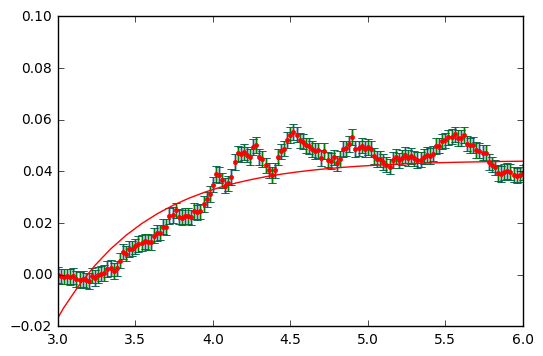

('K1 =', 9.3854359116054056, '+/-', inf)
('k2 =', 9.3410755228385032, '+/-', inf)
('tau_1 =', 0.59552991720053938, '+/-', inf)
('tau_2 =', 0.12144312392402309, '+/-', inf)


(-0.02, 0.1)

In [341]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.1)

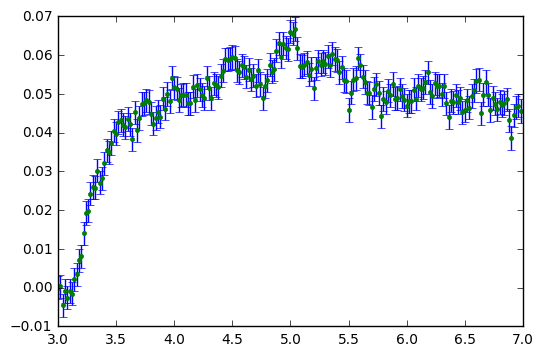

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [102]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

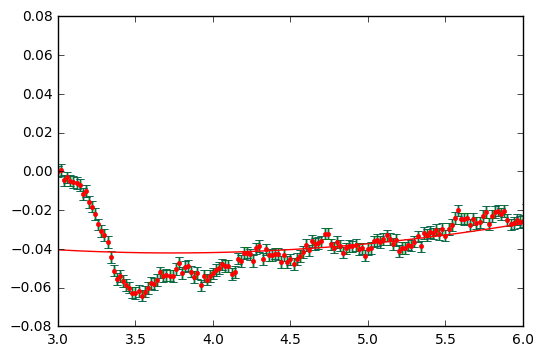

('K1 =', 1516.6121527507519, '+/-', 78362.149921030548)
('k2 =', 458.21331411278476, '+/-', 86708.557914544377)
('tau_1 =', 769.76115906712778, '+/-', 78362.149921030548)
('tau_2 =', 229.93127455801627, '+/-', 86708.557914544377)


(3, 6)

In [106]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

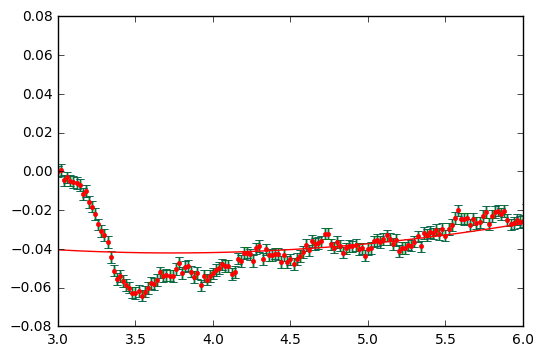

('K1 =', 452.03706177994115, '+/-', 92835.34960732609)
('k2 =', 1502.16979695237, '+/-', 79178.541398568559)
('tau_1 =', 228.56524207362429, '+/-', 92835.34960732609)
('tau_2 =', 768.32414922449891, '+/-', 79178.541398568559)


(3, 6)

In [107]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return -(K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2)))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

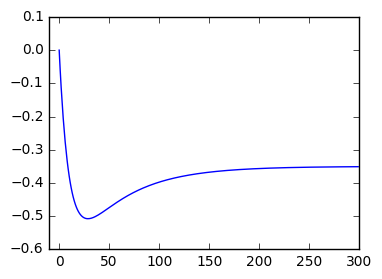

In [178]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.35
tau1 = 10.
tau2 = 50.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = -(K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2)))
plt.plot(t, y)

plt.xlim(-10., 300.)
#plt.ylim(0., 1.0)

plt.show()

In [156]:
bounds=(0, [3., 1., 0.5])

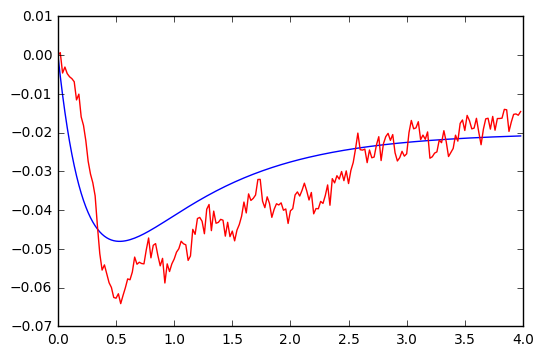

In [249]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.09
K2 = 0.07
tau1 = .25
tau2 = .9
y= -(K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

y= -(K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))

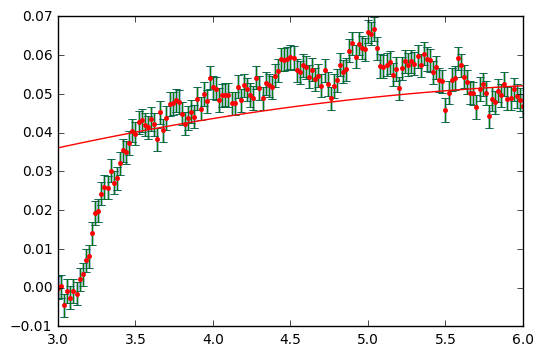

('K1 =', 638.63259789891117, '+/-', 261842.30061019733)
('k2 =', 2103.1777270819666, '+/-', 472289.36496532662)
('tau_1 =', 446.78275962333657, '+/-', 261842.30061019733)
('tau_2 =', 1487.3838771368175, '+/-', 472289.36496532662)


(3, 6)

In [253]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

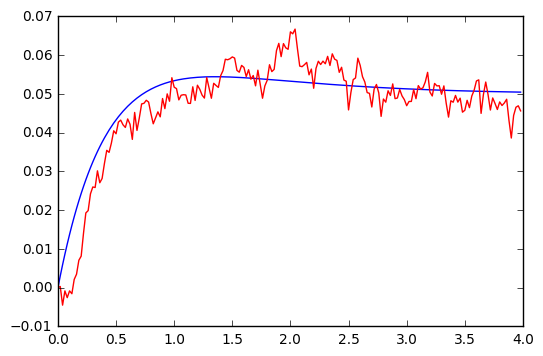

In [263]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.09
K2 = 0.04
tau1 = .45
tau2 = .9
y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

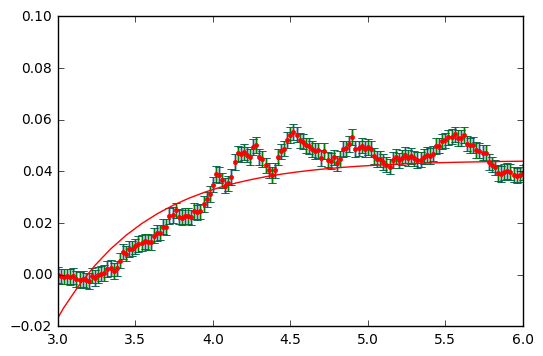

('K1 =', 9.3854359116054056, '+/-', inf)
('k2 =', 9.3410755228385032, '+/-', inf)
('tau_1 =', 0.59552991720053938, '+/-', inf)
('tau_2 =', 0.12144312392402309, '+/-', inf)


(-0.02, 0.1)

In [276]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.1)

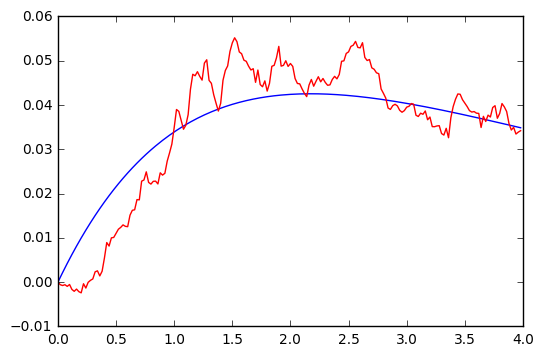

In [309]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.16
K2 = 0.155
tau1 = 1.5
tau2 = 3
y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))

In [ ]:
Simple exponential, filter sliding along waveform 


In [269]:
import numpy as np
from scipy.optimize import curve_fit

In [271]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

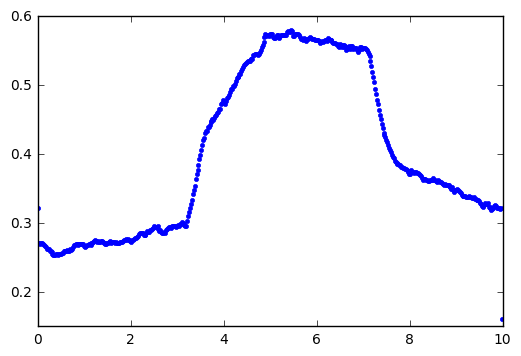

In [277]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

plt.plot(times, yaw_left_df['i1_l'], '.')
plt.show()

x = times
y = yaw_left_df['i1_l']

In [278]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

In [279]:
popt, pcov = curve_fit(exponential_f, x, y)

In [280]:
popt

array([ 0.66019056,  0.00374344,  2.87910997,  2.12030152])

<Container object of 3 artists>

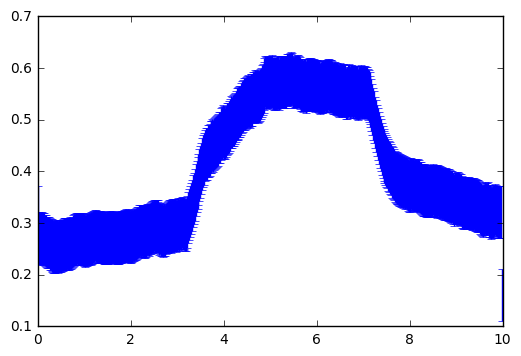

In [289]:
e = np.repeat(0.05, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [291]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

In [292]:
popt

array([ 0.66018769,  0.00374323,  2.87909607,  2.12027801])

In [297]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 0.6601876892738382, '+/-', 0.058626413549035437)
('k2 =', 0.0037432254375404728, '+/-', 0.0040285727430118051)
('tau_1 =', 2.8790960667116523, '+/-', 0.058626413549035437)
('tau_2 =', 2.1202780094989921, '+/-', 0.0040285727430118051)


(-1.0, 10)

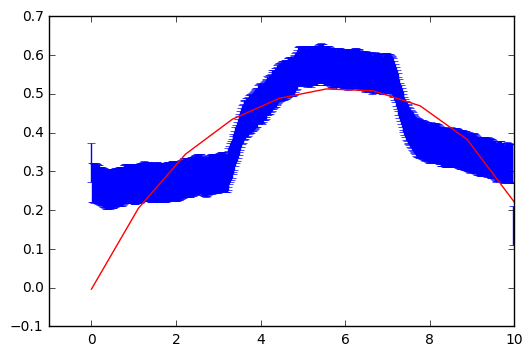

In [306]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(-1., 10)
plt.xlim(-1., 10)

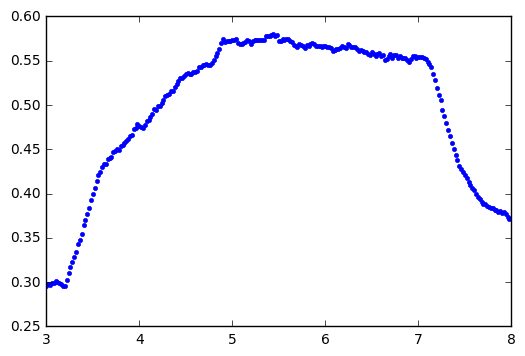

In [392]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i1_l'][150:400]

plt.plot(x, y, '.')
plt.show()

In [394]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))

In [395]:
popt, pcov = curve_fit(exponential_f, x, y)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

<Container object of 3 artists>

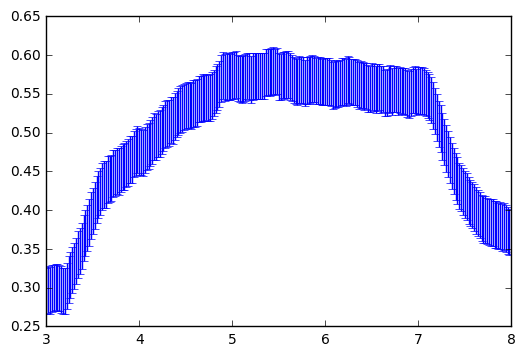

In [319]:
e = np.repeat(0.03, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [320]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

In [321]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 9585.8856001840522, '+/-', 583857.78420422261)
('k2 =', 0.0033349100223061612, '+/-', 0.00082995615915445325)
('tau_1 =', 75079.851261628457, '+/-', 583857.78420422261)
('tau_2 =', 1.4936732188711859, '+/-', 0.00082995615915445325)


(0.1, 0.7)

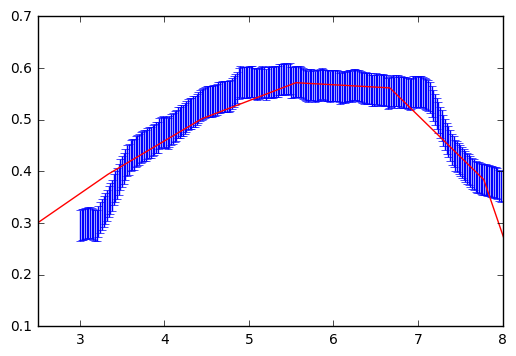

In [326]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.1, 0.7)

Yaw left B2 Left

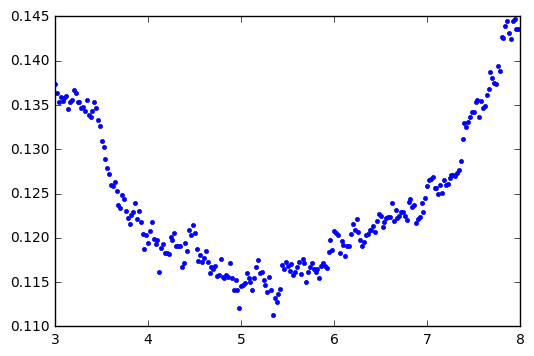

In [328]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['b2_l'][150:400]

plt.plot(x, y, '.')
plt.show()

In [329]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

<Container object of 3 artists>

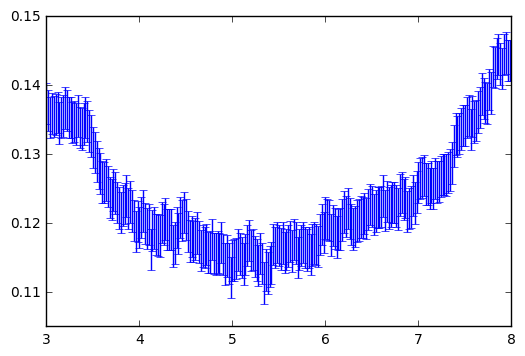

In [332]:
e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [333]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

/home/imager/.local/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [334]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 0.12098660353132569, '+/-', inf)
('k2 =', -1.6805189548953564e-09, '+/-', inf)
('tau_1 =', 0.10938957269600436, '+/-', inf)
('tau_2 =', 0.47970244253232086, '+/-', inf)


(0.05, 0.2)

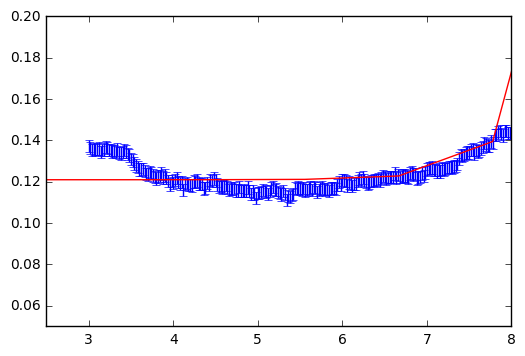

In [339]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.05, 0.2)

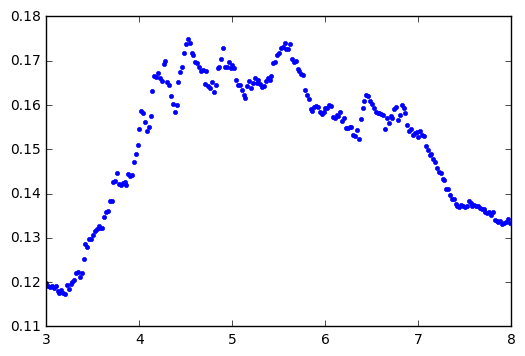

('K1 =', 0.93964197849309694, '+/-', 0.078648487044560025)
('k2 =', 0.61414487867098977, '+/-', 0.089001195964114946)
('tau_1 =', 1.6612561602054221, '+/-', 0.078648487044560025)
('tau_2 =', 29.924721756085969, '+/-', 0.089001195964114946)


(0.05, 0.2)

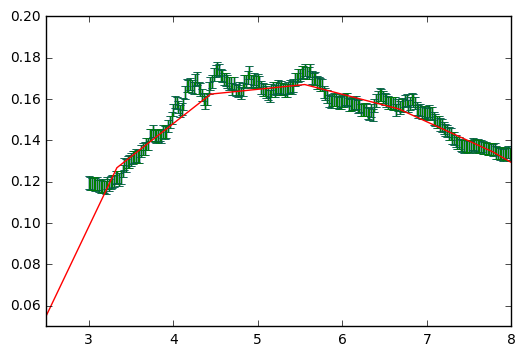

In [340]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['b2_r'][150:400]

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.05, 0.2)

In [ ]:
# shift and subtract these for starting point 

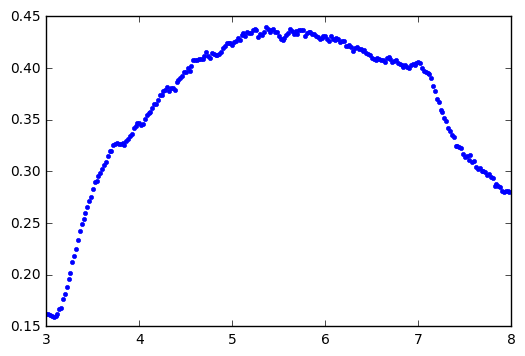

('K1 =', 7253.8812146991186, '+/-', 633472.76914814487)
('k2 =', 0.0011206193324891426, '+/-', 0.00043424270309461426)
('tau_1 =', 80806.726340683657, '+/-', 633472.76914814487)
('tau_2 =', 1.3156453925269034, '+/-', 0.00043424270309461426)


(0.1, 0.5)

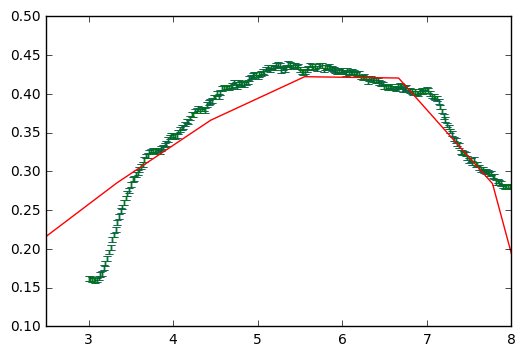

In [343]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i2_l'][150:400]

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.1, 0.5)

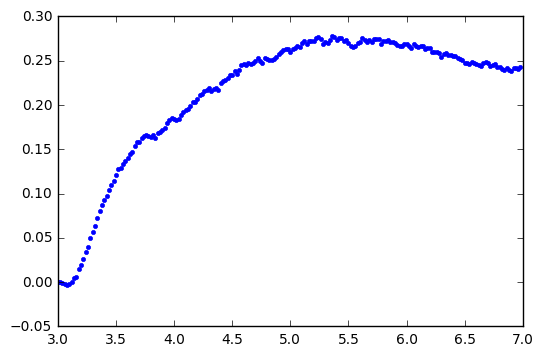

('K1 =', 24.084263766088341, '+/-', inf)
('k2 =', 23.817253849465285, '+/-', inf)
('tau_1 =', 0.68868648949133149, '+/-', inf)
('tau_2 =', 0.12339765490617498, '+/-', inf)


(0.0, 0.4)

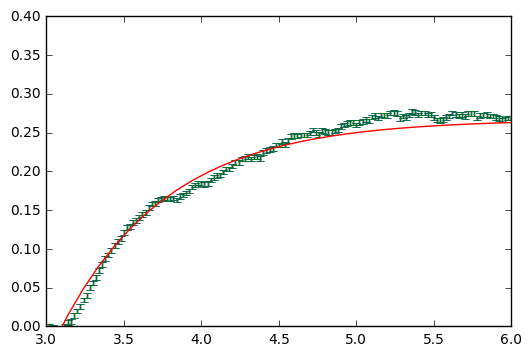

In [403]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i2_l'][150:350]-(yaw_left_df['i2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

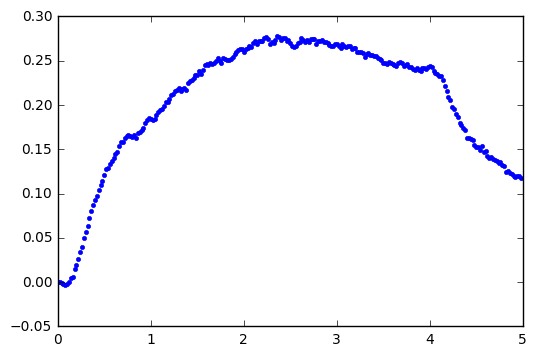

('K1 =', 0.3968040991693696, '+/-', 0.0077379239779209932)
('k2 =', 0.014306438882995324, '+/-', 0.0019903686446530581)
('tau_1 =', 1.298382008554295, '+/-', 0.0077379239779209932)
('tau_2 =', 1.663086278600175, '+/-', 0.0019903686446530581)


(0.0, 0.4)

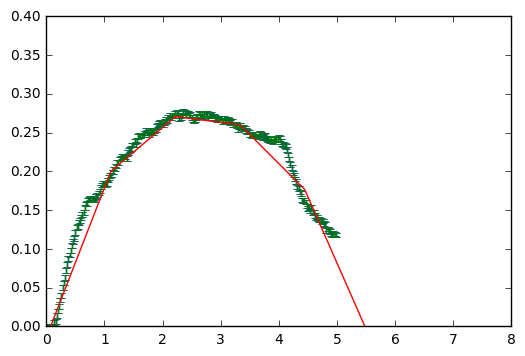

In [358]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['i2_l'][150:400]-(yaw_left_df['i2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.4)

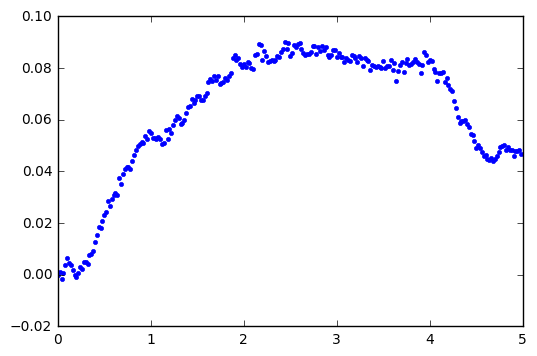

('K1 =', 0.16705666958047963, '+/-', 0.0041925201040326453)
('k2 =', 0.010251602640809931, '+/-', 0.0011190142582539226)
('tau_1 =', 1.9417326621711359, '+/-', 0.0041925201040326453)
('tau_2 =', 2.0523877870353995, '+/-', 0.0011190142582539226)


(0.0, 0.4)

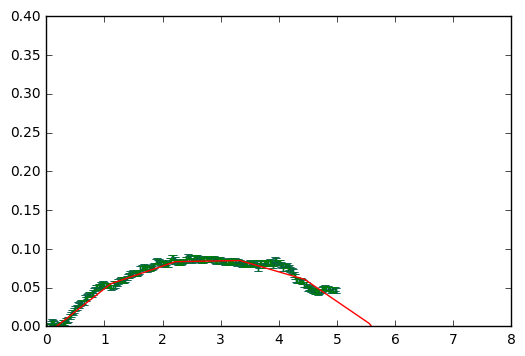

In [360]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii1_l'][150:400]-(yaw_left_df['iii1_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.4)

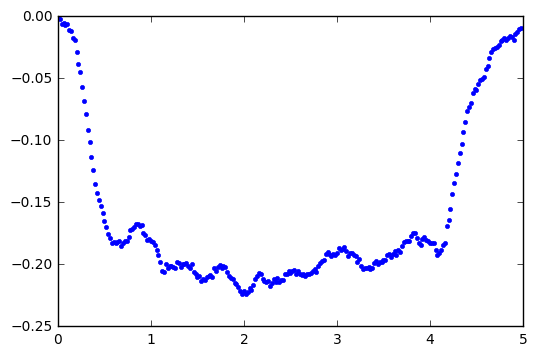

('K1 =', -0.2213107021722879, '+/-', 0.003071006289881213)
('k2 =', -0.00023409064490006594, '+/-', 8.4689969760243057e-05)
('tau_1 =', 0.50764845737251485, '+/-', 0.003071006289881213)
('tau_2 =', 0.71215627320912767, '+/-', 8.4689969760243057e-05)


(0, 8)

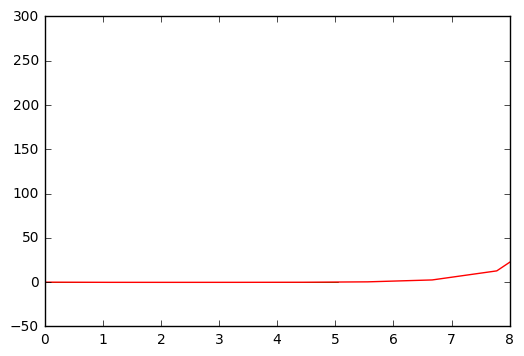

In [362]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_l'][150:400]-(yaw_left_df['iii3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
#plt.ylim(0.00, 0.4)

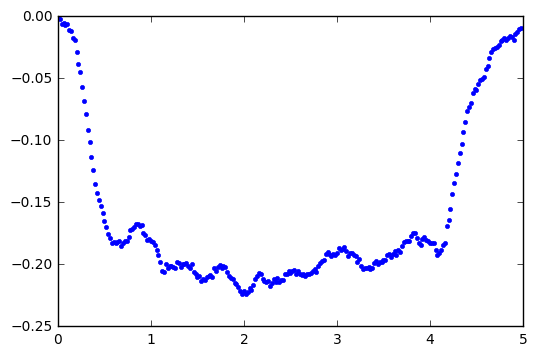

('K1 =', 0.22131029534549734, '+/-', 0.003071251099807232)
('k2 =', 0.00023407757126658787, '+/-', 8.4718673265754844e-05)
('tau_1 =', 0.50764585382392957, '+/-', 0.003071251099807232)
('tau_2 =', 0.71215049544720854, '+/-', 8.4718673265754844e-05)


(-0.2, 0.1)

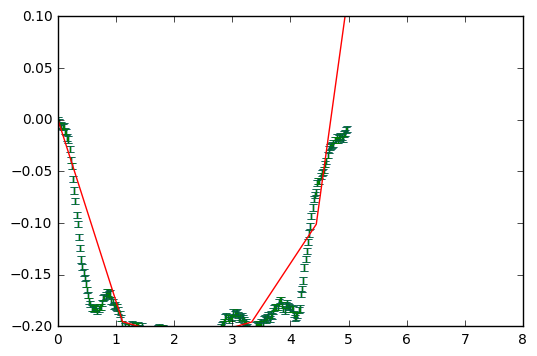

In [365]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_l'][150:400]-(yaw_left_df['iii3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return -(K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2)))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(-.20, 0.1)

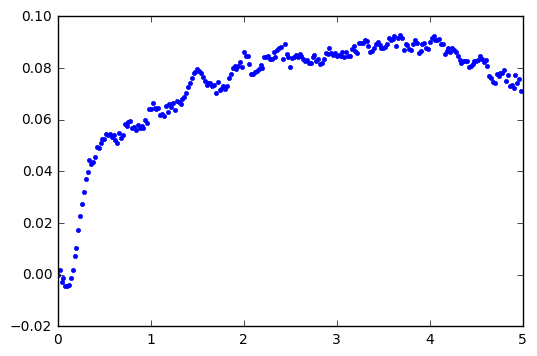

('K1 =', 0.08795467223782967, '+/-', 0.000654829143557177)
('k2 =', 6.9285454842991229e-09, '+/-', 2.1837430949504059e-08)
('tau_1 =', 0.76418633797306168, '+/-', 0.000654829143557177)
('tau_2 =', 0.33744907289320392, '+/-', 2.1837430949504059e-08)


(0.0, 0.15)

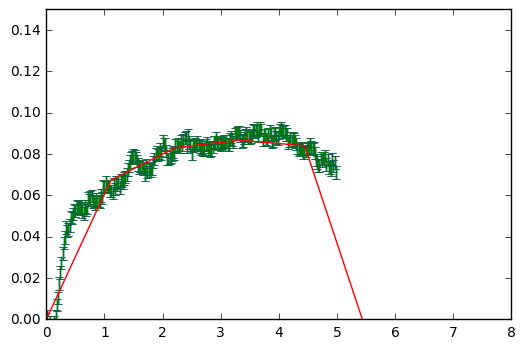

In [368]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_r'][150:400]-(yaw_left_df['iii3_r'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.15)

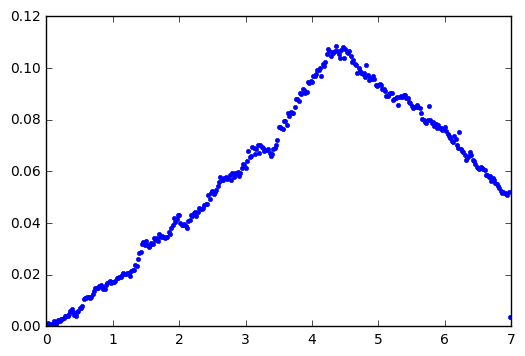

('K1 =', 1395.1886630793538, '+/-', 138993.55449434291)
('k2 =', 0.00080432842189686183, '+/-', 0.00026758914438334934)
('tau_1 =', 55852.44930086135, '+/-', 138993.55449434291)
('tau_2 =', 1.3531617209701514, '+/-', 0.00026758914438334934)


(0.0, 0.15)

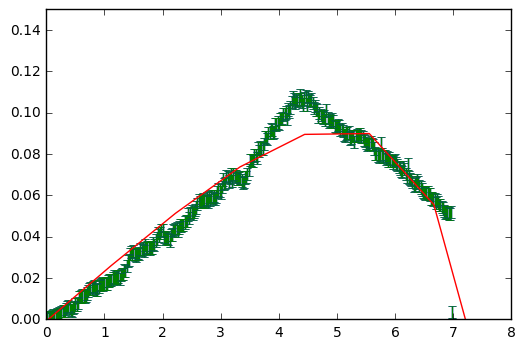

In [372]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:550]-times[150]
y = yaw_left_df['hg3_l'][150:550]-(yaw_left_df['hg3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.15)

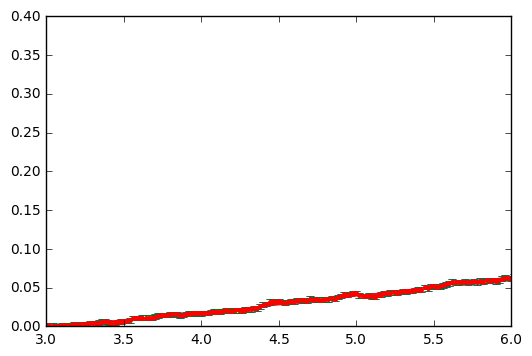

('K1 =', 306.18045198855253, '+/-', 54575.780626246713)
('k2 =', 0.13633921039628741, '+/-', 0.03255258835546624)
('tau_1 =', 9844.9138633134353, '+/-', 54575.780626246713)
('tau_2 =', 2.6194403573930969, '+/-', 0.03255258835546624)


(0.0, 0.4)

In [312]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


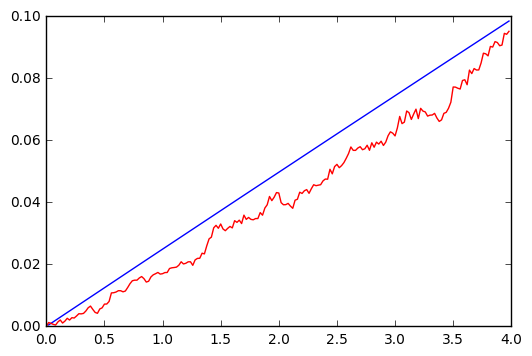

In [459]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]
y= K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2))
y_data =yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])
K1 = 5
K2 = 0
tau1 = 100
tau2 = 0

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
plt.ylim(0, 0.1)

plt.show()

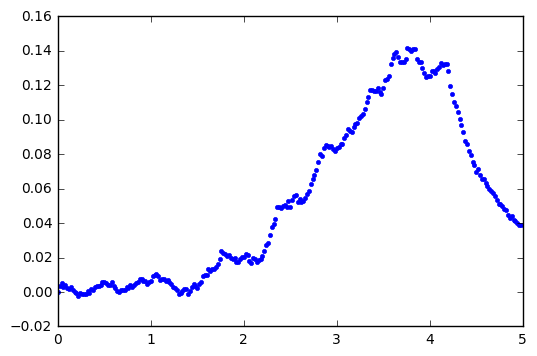

('K1 =', 3166.2600522100161, '+/-', 558118.56836240634)
('k2 =', 0.035363805064074175, '+/-', 0.0045973805096515422)
('tau_1 =', 49156.558112209605, '+/-', 558118.56836240634)
('tau_2 =', 2.5897751642411264, '+/-', 0.0045973805096515422)


(0.0, 0.15)

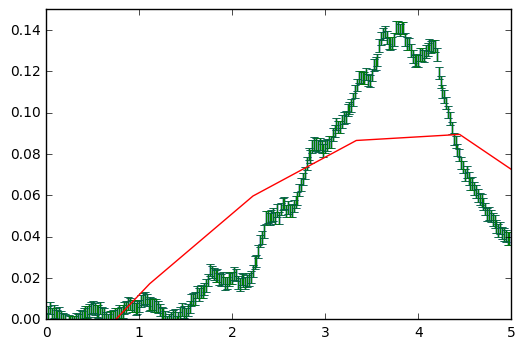

In [455]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['b2_l'][150:400]-(pitch_up_df['b2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

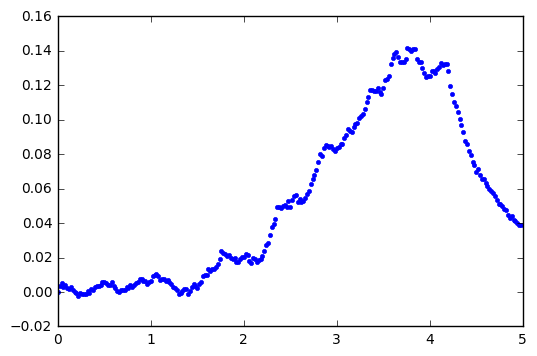

('K1 =', 3166.2600522100161, '+/-', 558118.56836240634)
('k2 =', 0.035363805064074175, '+/-', 0.0045973805096515422)
('tau_1 =', 49156.558112209605, '+/-', 558118.56836240634)
('tau_2 =', 2.5897751642411264, '+/-', 0.0045973805096515422)


(0.0, 0.15)

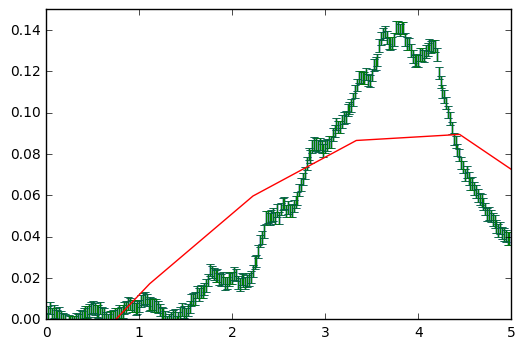

In [377]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['b2_l'][150:400]-(pitch_up_df['b2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

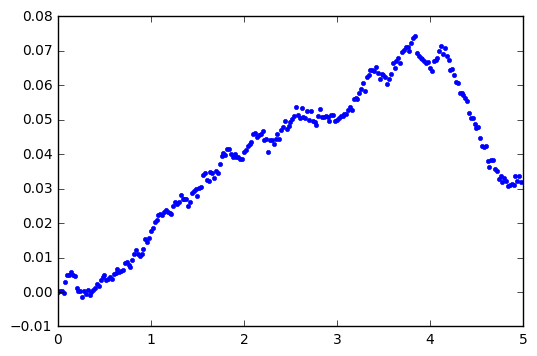

('K1 =', 1949.4679818673596, '+/-', 122366.7363489741)
('k2 =', 0.0079407838819628741, '+/-', 0.0010614560669526981)
('tau_1 =', 57729.272458073276, '+/-', 122366.7363489741)
('tau_2 =', 1.762959812076188, '+/-', 0.0010614560669526981)


(0.0, 0.15)

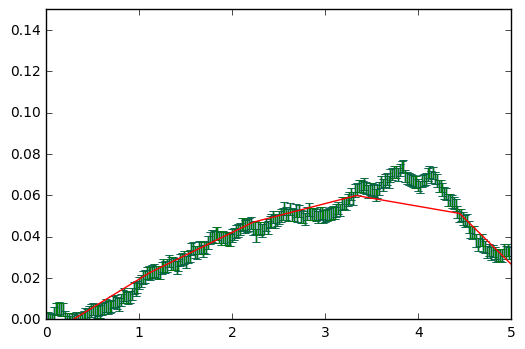

In [378]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['hg2_l'][150:400]-(pitch_up_df['hg2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

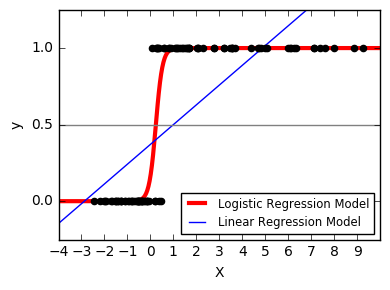

In [4]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

In [11]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:


import math

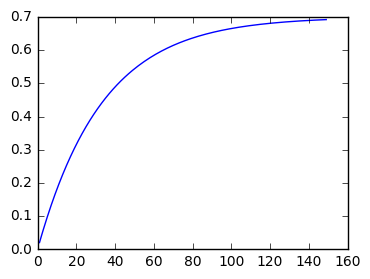

In [41]:
plt.figure(1, figsize=(4, 3))
x = np.arange(1,150)
M = 0.7
a =.03
y = M*(1-(math.e**(-a*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.show()

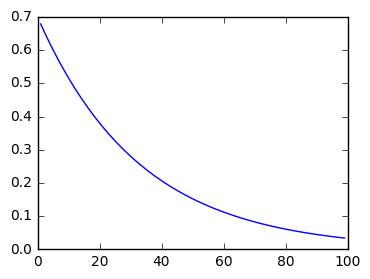

In [36]:
plt.figure(1, figsize=(4, 3))
x = np.arange(1,100)
b = 0.03
a =.7
y=a*(1-b)**x
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.show()

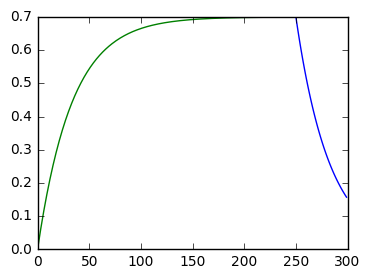

In [57]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
a =.7
y1=a*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(0,250)
M = 0.7
a2 =.03
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

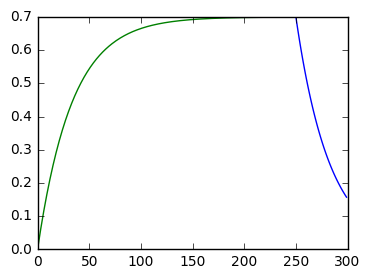

In [58]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
M =.7
y1=M*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(0,250)
M = 0.7
a2 =.03
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

In [60]:
import pandas as pd

/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [70]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')

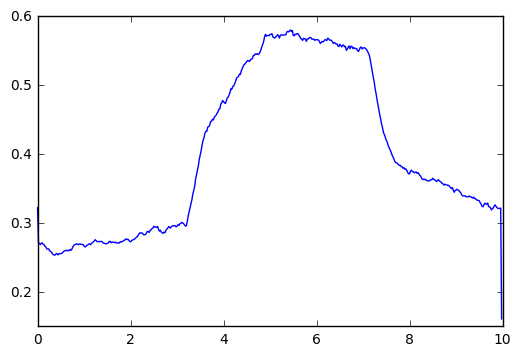

In [93]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')


plt.show()

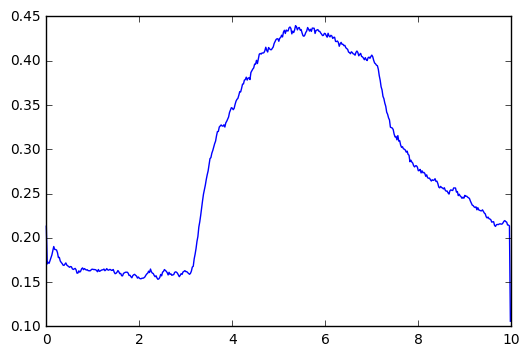

In [95]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,yaw_left_df['i2_l'],clip_on = False,color = 'b')


plt.show()

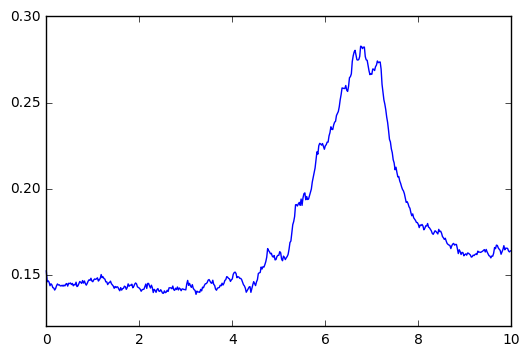

In [97]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,pitch_up_df['b2_l'],clip_on = False,color = 'b')


plt.show()

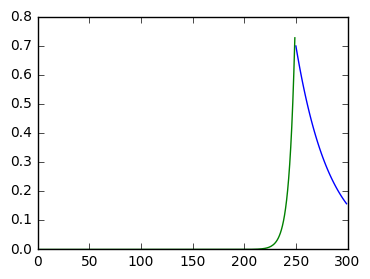

In [145]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
M =.7
y1=M*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(1,250)
M = .000000000000000000014
a2=1.2
y = M*(a2)**(x)
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

In [2]:
x = time
den = x.max() - x.min()
x -= x.min()
y_points = rate
def func(x, a1, a2, a3):
    return  a1*sin(1*pi*x/den)+\
            a2*sin(2*pi*x/den)+\
            a3*sin(3*pi*x/den)
popt, pcov = curve_fit(func, x, y_points)
y = func(x, *popt)
plot(time,rate)
plot(x,y, color='r', linewidth=2.)
show()

NameError: name 'time' is not defined

In [1]:
data=pyfits.open('http://heasarc.gsfc.nasa.gov/docs/swift/results/transients/weak/GX304-1.orbit.lc.fits')
time  = data[1].data.field(0)/86400. + data[1].header['MJDREFF'] + data[1].header['MJDREFI']
rate  = data[1].data.field(1)
error = data[1].data.field(2)
data.close()

cond = ((time > 56200) & (time < 56220))
time=time[cond]
rate=rate[cond]
error=error[cond]

def expGauss(x, pos, wid, tConst, expMod = 0.5, amp = 1):
    expMod *= 1.0
    gNorm = amp * N.exp(-0.5*((x-pos)/(wid))**2)
    g = expBroaden(gNorm, tConst, expMod)
    return g, gNorm

def expBroaden(y, t, expMod):
    fy = F.fft(y)
    a = N.exp(-1*expMod*time/t)
    fa = F.fft(a)
    fy1 = fy*fa
    yb = (F.ifft(fy1).real)/N.sum(a)
    return yb

if __name__ == '__main__':

# Fit the first set
#p[0] -- amplitude, p[1] -- position, p[2] -- width
    fitfuncG = lambda p, x: p[0]*N.exp(-0.5*(x-p[1])**2/p[2]**2) # Target function
    errfuncG = lambda p, x, y: fitfuncG(p, x) - y # Distance to the target function
    p0 = [0.20, 56210, 2.0] # Initial guess for the parameters
    p1, success = optimize.leastsq(errfuncG, p0[:], args=(time, rate))
    p1G = fitfuncG(p1, time)
   # P.plot(rate,  'ro', alpha = 0.4, label = "Gaussian")
   # P.plot(p1G, label = 'G-Fit')

def expGauss(x, pos, wid, tConst, expMod = 0.5, amp = 1):
  #p[0] -- amplitude, p[1] -- position, p[2] -- width, p[3]--tConst, p[4] -- expMod  
    fitfuncExpG = lambda p, x: expGauss(x, p[1], p[2], p[3], p[4], p[0])[0]
    errfuncExpG = lambda p, x, y: fitfuncExpG(p, x) - y # Distance to the target function  
    p0a = [0.20, 56210, 2.0] # Initial guess for the parameters
    p1a, success = optimize.leastsq(errfuncExpG, p0a[:], args=(time, rate))
    p1aG = fitfuncExpG(p1a, time)
    print type(rate), type(time), len(rate), len(time)  
    P.plot(rate, 'go', alpha = 0.4, label = "ExpGaussian")  
    P.plot(p1aG, label = 'ExpG-Fit')

    P.legend()  
    P.show()

ImportError: No module named pyfits